In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ER131 Final Project - Group 10
Fall 2023


# A Modelling Process for Energy Consumption Prediction in UC Berkeley Buildings

Fall 2023
1. Freeman, Forrest
(Sorted and merged Energy consumption dataset with temperature dataset, Did the EDA section, Conducted the lasso model, Conducted decision tree)
2. Sarfo, Kwabena Owusu
(Merged Energy consumption dataset with temperature dataset, Analyzed the EDA, Conducted lasso and ridge model)
3. Setiawan, Rachman
(Applied the Long Short Term Memory (LSTM) Neural Network Model, Analyzed the result, Organized and checked the raw files)

Note: Our team recommended to use GColab to check the points and subpoints easily

## Abstract (5 points)
In today's world, where sustainability and efficient resource utilisation are paramount, the energy consumption of buildings presents a significant challenge and an opportunity for innovation. This considerable consumption necessitates strategies for energy efficiency and timely resource allocation for retrofitting buildings. The project at hand aims to address this challenge by accurately predicting building energy usage, a complex task influenced by various factors such as weather conditions, building properties, and occupancy patterns.

This project uses electrical power metering data from different buildings at UC Berkeley such as – Sutardja, Gilman, and Sproul – to predict their energy consumption for the year 2023. The model utilises historical measurements, including current, active power demand, reactive power supply, and weather data elements of maximum and minimum daily temperatures. The data is split into training and test data and different Regression models are evaluated for their prediction of energy consumption for the different buildings. The Long-short-term memory (LSTM) time series model, the project aims to forecast future energy consumption accurately.

The goal is to guide resource allocation by identifying which buildings will likely require more energy and, consequently, infrastructure upgrades. This prioritisation is essential as it is impractical to allocate funds for capacity expansion to all buildings simultaneously. The predictive model also serves as a tool for fault detection by comparing actual consumption against predicted values.



## Project Background

Energy management is a crucial component of the global energy transition and environmental sustainability, especially when it comes to building energy usage. In the contemporary world, where sustainability and efficient resource utilisation are paramount, organisations must make efforts towards this direction.  A noteworthy problem is brought to light by Carlos Duarte's research from the University of California, Berkeley's Centre for The Built Environment (CBE): In the United States, buildings comprise about 28% of the country's total energy use. Buildings consume a large amount of energy, and the continuous growth of these buildings will require energy efficiency strategies and timely resource allocation for retrofitting these buildings. The challenge, however, lies in accurately predicting building energy usage. This is essential for implementing effective energy conservation strategies, making informed decisions to reduce energy consumption, and drawing timelines for when buildings must be retrofitted. However, energy usage is complex, influenced by various factors such as weather conditions, the physical properties of structures, and occupancy patterns.
In this project, we aimed to gain insights from the vast electrical metering data of the University of California Buildings and make predictions on its future energy consumption.
This data encompasses electricity parameters collected over several years for buildings on the campus. Complementing this is the detailed weather data, which includes temperature, humidity, and sunlight exposure, crucial factors affecting energy consumption. Integrating these two data sources is expected to unveil patterns and correlations that have been imperceptible until now. The primary challenge here is the complexity and sheer volume of the data. Each building within the university has its unique energy usage profile, influenced by its design, purpose, and occupancy patterns. The model aims to show these intricate patterns and establish a reliable forecast of energy consumption based on historical trends and past weather data.

The gathered data will be processed to ensure its quality and suitability for analysis. This involves cleaning, normalising, and structuring the data in a way conducive to machine learning algorithms. Linear Regression and Regularization methods will be used for initial predictive modelling due to their simplicity and effectiveness in understanding linear relationships. Additionally, Neural Networks will be employed to capture more complex, non-linear patterns in the data. The models will be trained on historical data and tested on a separate set to evaluate their predictive accuracy and generalizability.

An important and impactful thing that could potentially arise from this analysis and prediction is UCB Management knowing which buildings need energy efficiency strategies implemented. Subsequently, an efficient prediction of the model will give a reasonable estimation of the future energy consumption of these buildings.  This will show the trend of growing demand and when these buildings must be retrofitted. Subsequently, UCB management can prioritise specific structures and allocate timely funds for upgrades based on the direction of future energy consumption levels.

Another significant aspect of this project is its potential to catalyse change across the educational sector. If successful, other universities and large institutions could replicate the methodologies and findings, leading to a widespread positive impact on energy conservation and sustainability.




## Project Objective (5 points)
The purpose of this project is to train and evaluate different models and predict the energy consumption of 3 different buildings, Sutardja, Gilman, and Sproul, on the UC Berkeley campus for the year 2023 using historical measurements such as current, active power demand, reactive power supply etc, for each building and weather data as features maximum and minimum daily temperature. For predicting future energy consumption, we used the time series model known as Long-short-term memory (LSTM) since we did not have future feature values.

The resource allocation of this project is to be able to state which building showcases a higher energy consumption in the future and hence needs infrastructure upgrades. We recognize this as important since not all buildings can be allocated funds for capacity expansion and, hence, will need some prioritisation and planning. This helps make it easier to identify which buildings will require upgrades in a specific timeline. Another resource allocation is to be able to use the prediction as a guide against actual consumption to help with fault detection.


## Input Data Description (5 points)
1. The data is obtained from two sources, the first data is from UC Berkeley Utility Department which has a control to access the data. Furthermore, the temperature data is from a public source (https://www.visualcrossing.com/) where We obtained in 3 phases (there is a data limitation for downloading the datasets)

2.
- Structure : There are 2 data (energy consumption and temperature); these files have a consistent format using  around 40 features for energy consumption and 33 features for Weather data. The types are CSV file.
- Granularity : In terms of electrical data, the Data Acquisition Logger (DAQ) records the value every 15 minutes while the temperature data has a daily data; thus, We decided to calculate the mean of the electrical data by daily and merge with the temperature data
- Temporality : The general data starts from July 2017 and it ends in July 2022. Due to the limitation of downloading the data (maximum 1000 rows), We downloaded them in 3 phases.
- Faithfulness : The data is accurately recorded by Power Meter Analysis in the feeder section, We still rely that the data has a good accuration. In some cases, data has some minor voids (NaN value) which We could neglect and major voids (unavailable data in several years); thus, choosing the file is our priority in using for prediction

3. We would use several features in this project, Overall, the features that We used are 'Date','Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature'. The Target Variable is only one (Energy Consumption, kWh)  

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import os
import seaborn as sns
sns.set_context("talk")
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


pd.set_option('display.max_columns', None)

In [ ]:
# Read the Excel files
gil_df = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Gilman Hall Electric.csv')
sdj_df = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Sutardja Dai Hall MSA Electric.csv')
spr_df = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Sproul Hall Electric.csv')
weather_df_1 = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Weather 2017-07-27 to 2019-03-01.csv')
weather_df_2 = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Weather 2019-03-02 to 2021-11-01.csv')
weather_df_3 = pd.read_csv('/content/drive/MyDrive/ER131-Group 10/Weather 2021-11-02 to 2022-07-27.csv')

# Set the index to row numbers
gil_df = gil_df.reset_index(drop=True)
sdj_df = sdj_df.reset_index(drop=True)
spr_df = spr_df.reset_index(drop=True)

In [ ]:
#Showing the data (in this case We show Gilman and Weather phase 1 (only two files) to simplify the vizualisation)
print (gil_df.head())
print (weather_df_1.head())

  time (US/Pacific)  error  lowrange  highrange  Vln a (Volts)  Vln b (Volts)  \
0   7/27/2017 14:00      0       0.0        0.0            NaN            NaN   
1   7/27/2017 14:15      0       0.0        0.0            NaN            NaN   
2   7/27/2017 14:30      0       0.0        0.0            NaN            NaN   
3   7/27/2017 14:45      0       0.0        0.0            NaN            NaN   
4   7/27/2017 15:00      0       0.0        0.0            NaN            NaN   

   Vln c (Volts)  Vln ave (Volts)  Vll ab (Volts)  Vll bc (Volts)  \
0            NaN            274.0           475.1           475.0   
1            NaN            274.0           475.1           474.9   
2            NaN            273.8           474.8           474.5   
3            NaN            273.4           474.0           473.9   
4            NaN            273.4           474.1           473.8   

   Vll ca (Volts)  Vll ave (Volts)  I a (Amps)  I b (Amps)  I c (Amps)  \
0           473.6       

Google Collab is used in this project, thus we use a google drive file path for this project. The electrical data consists of time of recording, Voltage, Amps, Energy Consumption, error indicators and some peak-demand points for each electrical conditions. The weather data includes daily minimum-maximum temperature, wind speed, until the the solar radiation value.

## Data Cleaning (10 points)

In [ ]:
spr_df

time (US/Pacific)  error  lowrange  highrange  kW Total (kW)  \
0          8/1/2017 9:00      0       0.0        0.0        115.678   
1          8/1/2017 9:15      0       0.0        0.0        117.962   
2          8/1/2017 9:30      0       0.0        0.0        123.303   
3          8/1/2017 9:45      0       0.0        0.0        135.403   
4         8/1/2017 10:00      0       0.0        0.0        126.868   
...                  ...    ...       ...        ...            ...   
178169     8/1/2022 8:00      0       0.0        0.0         75.840   
178170     8/1/2022 8:15      0       0.0        0.0         79.468   
178171     8/1/2022 8:30      0       0.0        0.0         81.134   
178172     8/1/2022 8:45      0       0.0        0.0         89.262   
178173     8/1/2022 9:00      0       0.0        0.0         88.925   

        kW Demand (kW)  kW Peak Demand (kW)  kWh Total (kWh)  kWh Del (kWh)  \
0               111.12               221.52         652853.0       652853.0   
1               118.08               221.52         652883.0       652883.0   
2               119.76               221.52         652914.0       652914.0   
3               125.76               221.52         652946.0       652946.0   
4               126.00               221.52         652978.0       652978.0   
...                ...                  ...              ...            ...   
178169           71.28               221.52         185863.0       185863.0   
178170           76.56               221.52         185882.0       185882.0   
178171           78.48               221.52         185903.0       185903.0   
178172           78.48               221.52         185924.0       185924.0   
178173           83.52               221.52         185945.0       185945.0   

        KWh Rec (kWh)  KVAR Total (kVAR)  KVAR Demand (kVAR)  \
0                 0.0             22.230               21.60   
1                 0.0             21.637               22.32   
2                 0.0             23.087               20.64   
3                 0.0             25.475               23.28   
4                 0.0             22.234               23.76   
...               ...                ...                 ...   
178169            0.0              7.689                8.16   
178170            0.0              8.820                8.16   
178171            0.0              8.058                8.88   
178172            0.0             10.522                8.88   
178173            0.0             10.069                7.92   

        KVAR Peak Demand (kVAR)  KVARh Total (kVARh)  KVARh Del (kVARh)  \
0                         36.72             814717.0           814739.0   
1                         36.72             814722.0           814744.0   
2                         36.72             814728.0           814750.0   
3                         36.72             814734.0           814756.0   
4                         36.72             814739.0           814761.0   
...                         ...                  ...                ...   
178169                    36.72             283112.0           283272.0   
178170                    36.72             283114.0           283274.0   
178171                    36.72             283116.0           283276.0   
178172                    36.72             283118.0           283278.0   
178173                    36.72             283120.0           283280.0   

        KVARh Rec (kVARh)  KVA Demand (kVA)  KVA Peak Demand (kVA)  \
0                    22.0            113.28                 223.44   
1                    22.0            120.24                 223.44   
2                    22.0            121.68                 223.44   
3                    22.0            127.92                 223.44   
4                    22.0            128.40                 223.44   
...                   ...               ...                    ...   
178169              160.0             71.76  

Our date data is as an object, to ensure We could visualize the graph, changing the column using pd.to_date time to ensure that the date is using datetime64[ns] format. We also rename some colums (both electrical and weather data) to ensure that the data has the same features name for using using them in the next step (Data Cleaning, EDA, and Prediction). After the data is set, We resample the data by daily by averaging the raw values.




In [ ]:
gil_df['time (US/Pacific)'] = pd.to_datetime(gil_df['time (US/Pacific)'])
# Set the datetime column as the index
gil_df.set_index('time (US/Pacific)', inplace=True)
# Resample the data to daily intervals and calculate the mean for each day
daily_df_g = gil_df.resample('D').mean()
# Reset the index to have 'time (US/Pacific)' as a column again
daily_df_g.reset_index(inplace=True)
daily_df_g.rename(columns={'time (US/Pacific)': 'Date', 'kWh del (kWh)': 'kWh mean (kWh)'}, inplace= True)
daily_df_g['Consumption (kWh)'] = daily_df_g['kW total (kW)']*24

#Setting time for Sutardja
sdj_df['time (US/Pacific)'] = pd.to_datetime(sdj_df['time (US/Pacific)'])
sdj_df.set_index('time (US/Pacific)', inplace=True)
daily_df_sd = sdj_df.resample('D').mean()
daily_df_sd.reset_index(inplace=True)
daily_df_sd.rename(columns={'time (US/Pacific)': 'Date', 'kWh del (kWh)': 'kWh mean (kWh)'}, inplace= True)
daily_df_sd['Consumption (kWh)'] = daily_df_sd['kW total (kW)']*24

#Setting time for Sproul
spr_df['time (US/Pacific)'] = pd.to_datetime(spr_df['time (US/Pacific)'])
spr_df.set_index('time (US/Pacific)', inplace=True)
daily_df_s = spr_df.resample('D').mean()
daily_df_s.reset_index(inplace=True)
daily_df_s.rename(columns={'time (US/Pacific)': 'Date','kW Total (kW)':'kW total (kW)', 'I AVG Primary (Amps)':'I ave (Amps)','kW Demand (kW)':'kW demand (kW)', 'kWh Del (kWh)': 'kWh mean (kWh)', 'KVAR Total (kVAR)':'kVAR total (kVAR)' }, inplace= True)
daily_df_s['Consumption (kWh)'] = daily_df_s['kW total (kW)']*24

In [ ]:
daily_df_g

Date     error  lowrange  highrange  Vln a (Volts)  Vln b (Volts)  \
0    2017-07-27  0.000000       0.0        0.0            NaN            NaN   
1    2017-07-28  1.666667       0.0        0.0            NaN            NaN   
2    2017-07-29  0.000000       0.0        0.0            NaN            NaN   
3    2017-07-30  1.649485       0.0        0.0            NaN            NaN   
4    2017-07-31  1.649485       0.0        0.0            NaN            NaN   
...         ...       ...       ...        ...            ...            ...   
1822 2022-07-23  0.000000       0.0        0.0            NaN            NaN   
1823 2022-07-24  0.000000       0.0        0.0            NaN            NaN   
1824 2022-07-25  0.000000       0.0        0.0            NaN            NaN   
1825 2022-07-26  0.000000       0.0        0.0            NaN            NaN   
1826 2022-07-27  0.000000       0.0        0.0            NaN            NaN   

      Vln c (Volts)  Vln ave (Volts)  Vll ab (Volts)  Vll bc (Volts)  \
0               NaN       274.972500      477.065000      476.445000   
1               NaN       276.126316      478.985263      478.470526   
2               NaN       276.966667      480.611458      479.850000   
3               NaN       277.021875      480.716667      479.925000   
4               NaN       275.998958      478.791667      478.229167   
...             ...              ...             ...             ...   
1822            NaN       286.752083      497.632292      496.986458   
1823            NaN       286.964583      498.014583      497.253125   
1824            NaN       287.217708      498.117708      497.756250   
1825            NaN       286.618750      497.033333      496.725000   
1826            NaN       286.747368      497.233333      496.945614   

      Vll ca (Volts)  Vll ave (Volts)  I a (Amps)  I b (Amps)  I c (Amps)  \
0         475.252500       476.252500   79.625000   83.627500   78.495000   
1         477.310526       478.255789   75.936842   79.802105   74.902105   
2         478.663542       479.710417   75.301042   79.315625   73.998958   
3         478.769792       479.808333   75.223958   79.189583   73.812500   
4         477.107292       478.040625   75.112500   78.925000   74.040625   
...              ...              ...         ...         ...         ...   
1822      495.376042       496.663542   87.036458   90.912500   87.993750   
1823      495.802083       497.018750   87.104167   90.938542   87.906250   
1824      496.518750       497.465625   86.645833   90.116667   88.042708   
1825      495.539583       496.433333   86.970833   90.115625   88.371875   
1826      495.745614       496.640351   86.219298   89.696491   87.763158   

      I ave (Amps)  I demand (Amps)  I peak demand (Amps)  I4 (Amps)  \
0        80.592500        80.350000                 163.2   0.392500   
1        76.884211        77.450526                 163.2   0.325263   
2        76.207292        75.604167                 163.2   0.359375   
3        76.066667        75.576042                 163.2   0.341667   
4        76.029167        76.410417                 163.2   0.365625   
...            ...              ...                   ...        ...   
1822     88.645833        88.115625                 163.2   0.370833   
1823     88.648958        88.130208                 163.2   0.340625   
1824     88.270833        88.560417                 163.2   0.317708   
1825     88.483333        88.330208                 163.2   0.351042   
1826     87.901754        87.984211                 163.2   0.321053   

      Frequency (Hz)  PF sign total  PF sign a  PF sign b  PF sign c  \
0          59.998750     -65.817500        NaN        NaN        NaN   
1          59.991895     -64.542211        NaN        NaN        NaN   
2          59.986875     -63.353542        NaN        NaN        NaN   
3          59.988542     -63.344479        NaN        NaN        NaN   
4          59.991458     -63.757187

In [ ]:
#Set the features for weather data and change some name columns for temp phase 1
selected_columns_w1 = ["datetime","tempmax","tempmin"]
weather_df_1_reduced = weather_df_1[selected_columns_w1]
weather_df_1_reduced.rename(columns={"datetime": "Date", "tempmax": "Daily Max Temperature", "tempmin": "Daily Min Temperature"}, inplace=True)

#Phase 2 (due to the limit of data that could be downloaded)
selected_columns_w2 = ["datetime","tempmax","tempmin"]
weather_df_2_reduced = weather_df_2[selected_columns_w2]
weather_df_2_reduced.rename(columns={"datetime": "Date", "tempmax": "Daily Max Temperature", "tempmin": "Daily Min Temperature"}, inplace=True)

#Phase 3
selected_columns_w3 = ["datetime","tempmax","tempmin"]
weather_df_3_reduced = weather_df_3[selected_columns_w3]
weather_df_3_reduced.rename(columns={"datetime": "Date", "tempmax": "Daily Max Temperature", "tempmin": "Daily Min Temperature"}, inplace=True)

In [ ]:
#Concat the weather file into one dataframe
frames = [weather_df_1_reduced, weather_df_2_reduced, weather_df_3_reduced]
weather_total = pd.concat(frames)

#Rename Some Columns and Set the date time
weather_total.rename(columns={"datetime": "Date","tempmax": "Daily Max Temperature", "tempmin": "Daily Min Temperature"}, inplace=True)
weather_total['Date'] = pd.to_datetime(weather_total['Date'])
new_df_d = weather_total.set_index('Date')
new_df_d

Daily Max Temperature  Daily Min Temperature
Date                                                    
2017-07-27                   27.5                   13.9
2017-07-28                   23.7                   14.4
2017-07-29                   23.6                   13.9
2017-07-30                   25.1                   13.7
2017-07-31                   25.1                   14.4
...                           ...                    ...
2022-07-23                   73.7                   55.1
2022-07-24                   73.3                   56.1
2022-07-25                   72.7                   56.5
2022-07-26                   74.2                   59.6
2022-07-27                   74.2                   58.7

[1827 rows x 2 columns]

## Data Summary and Exploratory Data Analysis (10 points)

In this section, We choose two features and rename some columns for all weather data. Then the data is compiled in one dataframe then followed by merging the weather and electrical data, We used "outer" to ensure that the data could be combined all of them, even having some NaN data in some situations

In [ ]:
#Concat Data for Temperature and Energy Data
daily_df_g = new_df_d.merge(daily_df_g, on='Date', how = 'outer')
daily_df_g = daily_df_g.reset_index(drop=True)

daily_df_sd = new_df_d.merge(daily_df_sd, on='Date', how = 'outer')
daily_df_sd = daily_df_sd.reset_index(drop=True)

daily_df_s = new_df_d.merge(daily_df_s, on='Date', how = 'outer')
daily_df_s = daily_df_s.reset_index(drop=True)

In [ ]:
daily_df_g

Date  Daily Max Temperature  Daily Min Temperature     error  \
0    2017-07-27                   27.5                   13.9  0.000000   
1    2017-07-28                   23.7                   14.4  1.666667   
2    2017-07-29                   23.6                   13.9  0.000000   
3    2017-07-30                   25.1                   13.7  1.649485   
4    2017-07-31                   25.1                   14.4  1.649485   
...         ...                    ...                    ...       ...   
1822 2022-07-23                   73.7                   55.1  0.000000   
1823 2022-07-24                   73.3                   56.1  0.000000   
1824 2022-07-25                   72.7                   56.5  0.000000   
1825 2022-07-26                   74.2                   59.6  0.000000   
1826 2022-07-27                   74.2                   58.7  0.000000   

      lowrange  highrange  Vln a (Volts)  Vln b (Volts)  Vln c (Volts)  \
0          0.0        0.0            NaN            NaN            NaN   
1          0.0        0.0            NaN            NaN            NaN   
2          0.0        0.0            NaN            NaN            NaN   
3          0.0        0.0            NaN            NaN            NaN   
4          0.0        0.0            NaN            NaN            NaN   
...        ...        ...            ...            ...            ...   
1822       0.0        0.0            NaN            NaN            NaN   
1823       0.0        0.0            NaN            NaN            NaN   
1824       0.0        0.0            NaN            NaN            NaN   
1825       0.0        0.0            NaN            NaN            NaN   
1826       0.0        0.0            NaN            NaN            NaN   

      Vln ave (Volts)  Vll ab (Volts)  Vll bc (Volts)  Vll ca (Volts)  \
0          274.972500      477.065000      476.445000      475.252500   
1          276.126316      478.985263      478.470526      477.310526   
2          276.966667      480.611458      479.850000      478.663542   
3          277.021875      480.716667      479.925000      478.769792   
4          275.998958      478.791667      478.229167      477.107292   
...               ...             ...             ...             ...   
1822       286.752083      497.632292      496.986458      495.376042   
1823       286.964583      498.014583      497.253125      495.802083   
1824       287.217708      498.117708      497.756250      496.518750   
1825       286.618750      497.033333      496.725000      495.539583   
1826       286.747368      497.233333      496.945614      495.745614   

      Vll ave (Volts)  I a (Amps)  I b (Amps)  I c (Amps)  I ave (Amps)  \
0          476.252500   79.625000   83.627500   78.495000     80.592500   
1          478.255789   75.936842   79.802105   74.902105     76.884211   
2          479.710417   75.301042   79.315625   73.998958     76.207292   
3          479.808333   75.223958   79.189583   73.812500     76.066667   
4          478.040625   75.112500   78.925000   74.040625     76.029167   
...               ...         ...         ...         ...           ...   
1822       496.663542   87.036458   90.912500   87.993750     88.645833   
1823       497.018750   87.104167   90.938542   87.906250     88.648958   
1824       497.465625   86.645833   90.116667   88.042708     88.270833   
1825       496.433333   86.970833   90.115625   88.371875     88.483333   
1826       496.640351   86.219298   89.696491   87.763158     87.901754   

      I demand (Amps)  I peak demand (Amps)  I4 (Amps)  Frequency (Hz)  \
0           80.350000                 163.2   0.392500       59.998750   
1           77.450526                 163.2   0.325263       59.991895   
2           75.604167                 163.2   0.359375       59.986875   
3           75.576042                 163.2   0.341667       59.988542   
4           76.410417                 163.2   0.365625       59.991458   

In [ ]:
selected_columns_g = ['Date','Consumption (kWh)', 'kW total (kW)', 'kW demand (kW)', 'I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']
daily_df_g = daily_df_g[selected_columns_g]
daily_df_g = daily_df_g.dropna()
daily_df_g

Date  Consumption (kWh)  kW total (kW)  kW demand (kW)  \
0    2017-07-27        1041.000000      43.375000       43.450000   
1    2017-07-28         976.168421      40.673684       40.947368   
2    2017-07-29         951.250000      39.635417       39.218750   
3    2017-07-30         951.750000      39.656250       39.135417   
4    2017-07-31         953.250000      39.718750       40.145833   
...         ...                ...            ...             ...   
1822 2022-07-23         964.500000      40.187500       39.708333   
1823 2022-07-24         951.000000      39.625000       39.583333   
1824 2022-07-25         944.000000      39.333333       39.729167   
1825 2022-07-26         962.500000      40.104167       39.989583   
1826 2022-07-27         939.368421      39.140351       39.491228   

      I ave (Amps)  kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
0        80.592500    1.507785e+06          49.225000                   27.5   
1        76.884211    1.508483e+06          47.905263                   23.7   
2        76.207292    1.509461e+06          48.229167                   23.6   
3        76.066667    1.510406e+06          48.177083                   25.1   
4        76.029167    1.511370e+06          47.729167                   25.1   
...            ...             ...                ...                    ...   
1822     88.645833    3.023045e+06          63.833333                   73.7   
1823     88.648958    3.024009e+06          64.250000                   73.3   
1824     88.270833    3.024970e+06          64.093750                   72.7   
1825     88.483333    3.025939e+06          63.718750                   74.2   
1826     87.901754    3.026709e+06          63.719298                   74.2   

      Daily Min Temperature  
0                      13.9  
1                      14.4  
2                      13.9  
3                      13.7  
4                      14.4  
...                     ...  
1822                   55.1  
1823                   56.1  
1824                   56.5  
1825                   59.6  
1826                   58.7  

[1827 rows x 9 columns]

In [ ]:
selected_columns_sd = ['Date','Consumption (kWh)', 'kW total (kW)', 'kW demand (kW)', 'I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']
daily_df_sd = daily_df_sd[selected_columns_sd]
daily_df_sd = daily_df_sd.dropna()
daily_df_sd



Date  Consumption (kWh)  kW total (kW)  kW demand (kW)  \
5    2017-08-01       14549.142857     606.214286      606.196429   
6    2017-08-02       14067.500000     586.145833      587.145833   
7    2017-08-03       14400.000000     600.000000      599.531250   
8    2017-08-04       14681.750000     611.739583      612.239583   
9    2017-08-05       14211.000000     592.125000      590.677083   
...         ...                ...            ...             ...   
1822 2022-07-23       14441.750000     601.739583      602.052083   
1823 2022-07-24       14389.750000     599.572917      600.104167   
1824 2022-07-25       14794.500000     616.437500      616.270833   
1825 2022-07-26       14770.250000     615.427083      615.739583   
1826 2022-07-27       14769.000000     615.375000      615.375000   

      I ave (Amps)  kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
5       796.298214    1.266276e+07         251.196429                   28.1   
6       767.166667    1.267403e+07         256.562500                   31.7   
7       782.700000    1.268810e+07         255.947917                   27.2   
8       800.606250    1.270275e+07         252.114583                   24.3   
9       773.579167    1.271721e+07         262.854167                   24.4   
...            ...             ...                ...                    ...   
1822    785.537500    3.885939e+07         307.406250                   73.7   
1823    782.997917    3.887382e+07         307.864583                   73.3   
1824    801.296875    3.888836e+07         310.604167                   72.7   
1825    800.053125    3.890320e+07         307.218750                   74.2   
1826    800.410417    3.891794e+07         308.020833                   74.2   

      Daily Min Temperature  
5                      13.6  
6                      16.0  
7                      18.8  
8                      18.5  
9                      16.8  
...                     ...  
1822                   55.1  
1823                   56.1  
1824                   56.5  
1825                   59.6  
1826                   58.7  

[1822 rows x 9 columns]

In [ ]:
selected_columns_s = ['Date','Consumption (kWh)', 'kW total (kW)', 'kW demand (kW)', 'I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']
daily_df_s = daily_df_s[selected_columns_sd]
daily_df_s = daily_df_s.dropna()

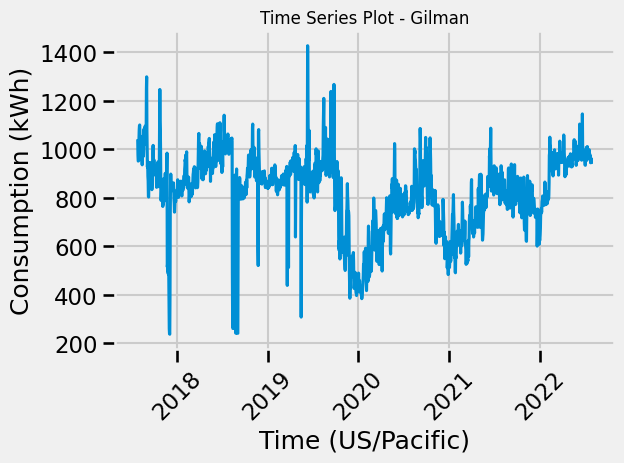

In [ ]:
#Showing Vizualisation for Gilman


fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))
style.use("ggplot")
sns.lineplot(x= daily_df_g['Date'], y= daily_df_g['Consumption (kWh)'])
sns.set(rc={'figure.figsize': (20,10)})
plt.xlabel('Time (US/Pacific)')
plt.ylabel('Consumption (kWh)')
plt.title('Time Series Plot - Gilman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above shows Gilman building's energy consumption from August 2018 to August 2022. ted to the energy consumption levels during covid lockdown. The graph highlights the fluctauting levels of energy consumption by the year and also months within a specific year

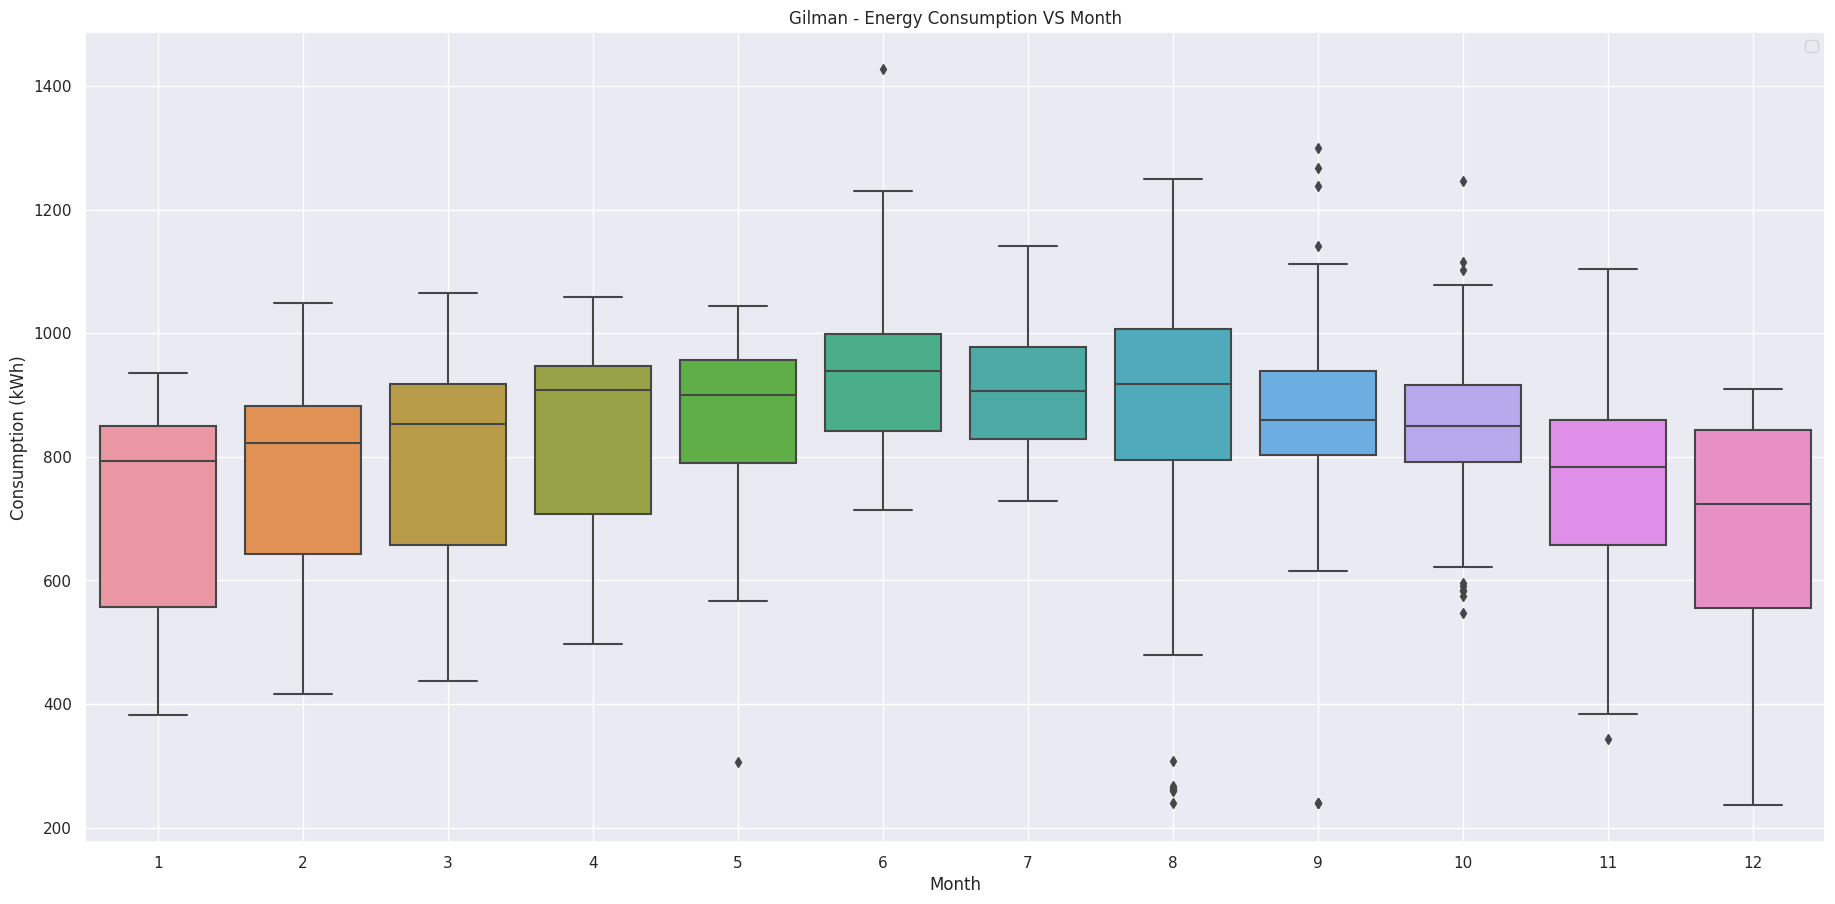

In [ ]:
daily_df_g["Month"] = pd.to_datetime(daily_df_g['Date']).dt.month
sns.boxplot(x=daily_df_g["Month"], y=daily_df_g['Consumption (kWh)'])
plt.title("Gilman - Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

The graph above shows a box plot of the monthly energy consumption for the Gilman building. This gives a good idea of the energy consumption distribution in each of the 12 months of the 2020

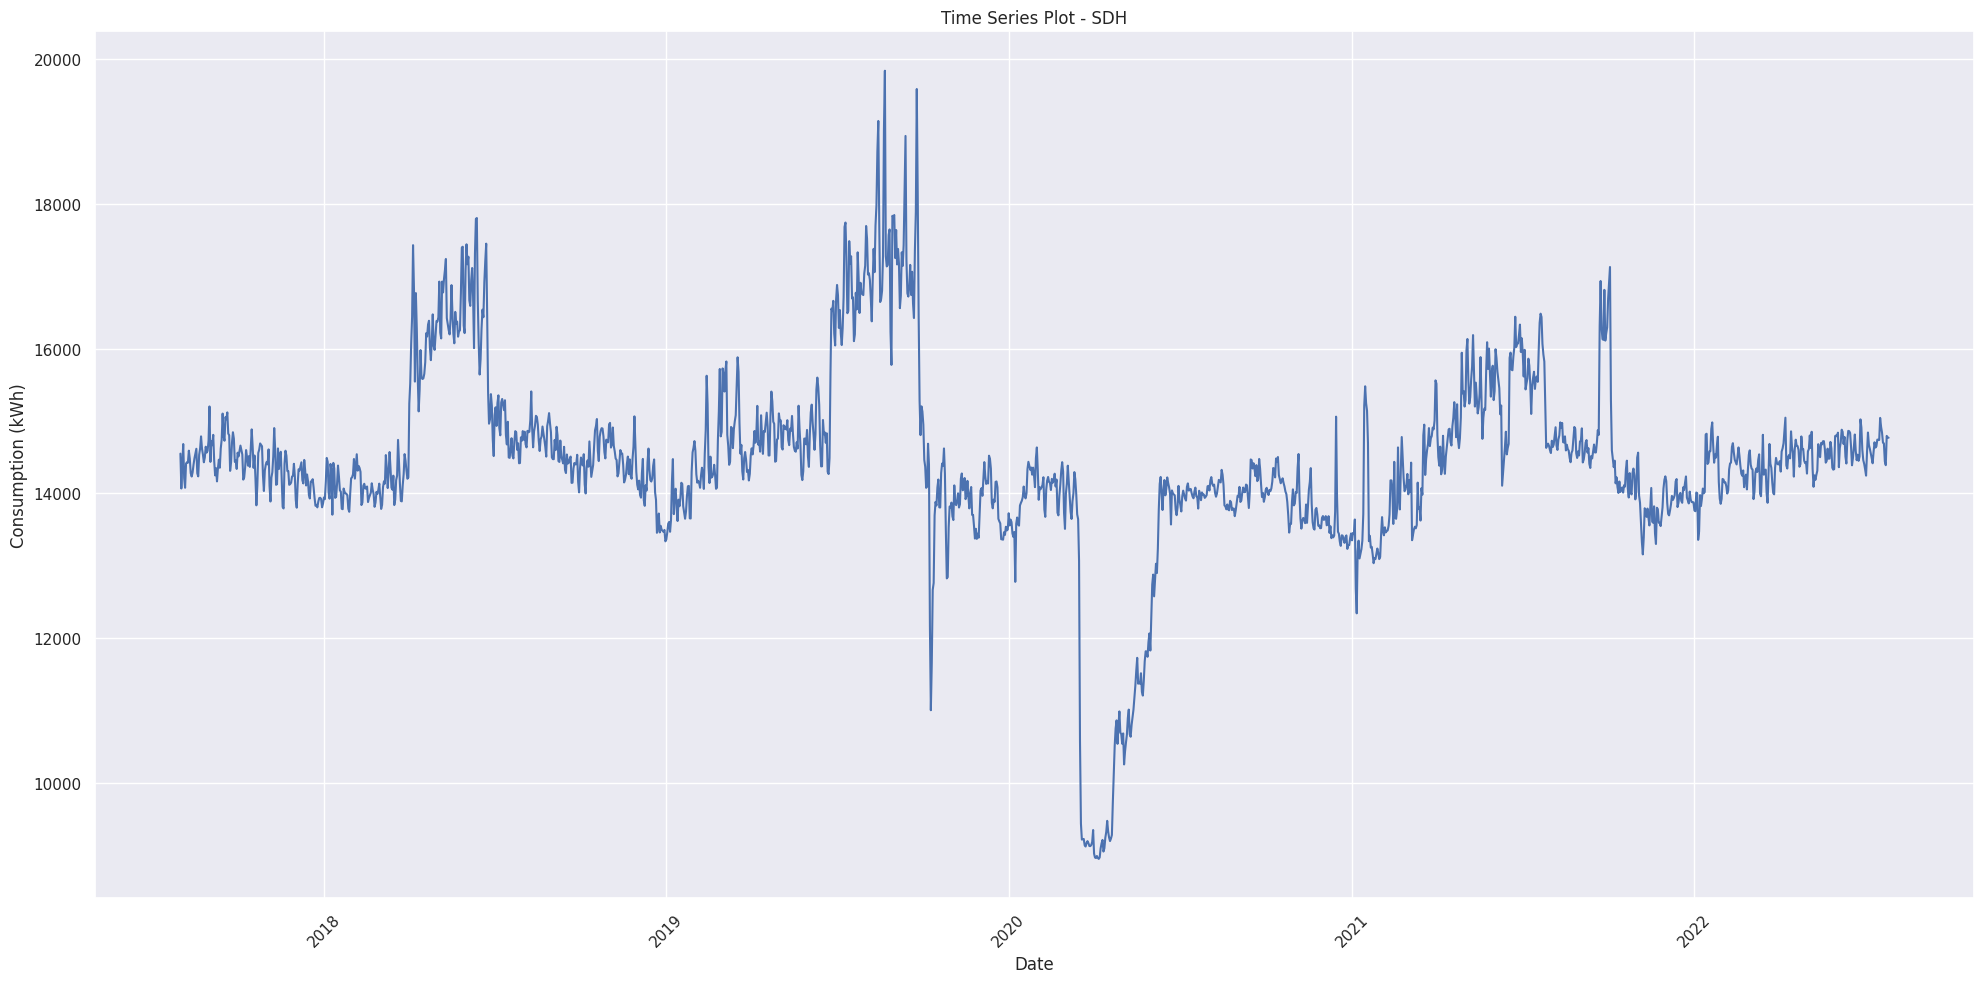

In [ ]:
#Showing Vizualisation for SDH


fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))
style.use("ggplot")
sns.lineplot(x= daily_df_sd['Date'], y= daily_df_sd['Consumption (kWh)'])
sns.set(rc={'figure.figsize': (20,10)})
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Time Series Plot - SDH')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above shows Sutardja Dai Hall's energy consumption from 2018 to 2022. The quick dip in consumptions can be attributed to the energy consumption levels during covid lockdown. The graph highlights the fluctauting levels of energy consumption by the year and also months within a specific year

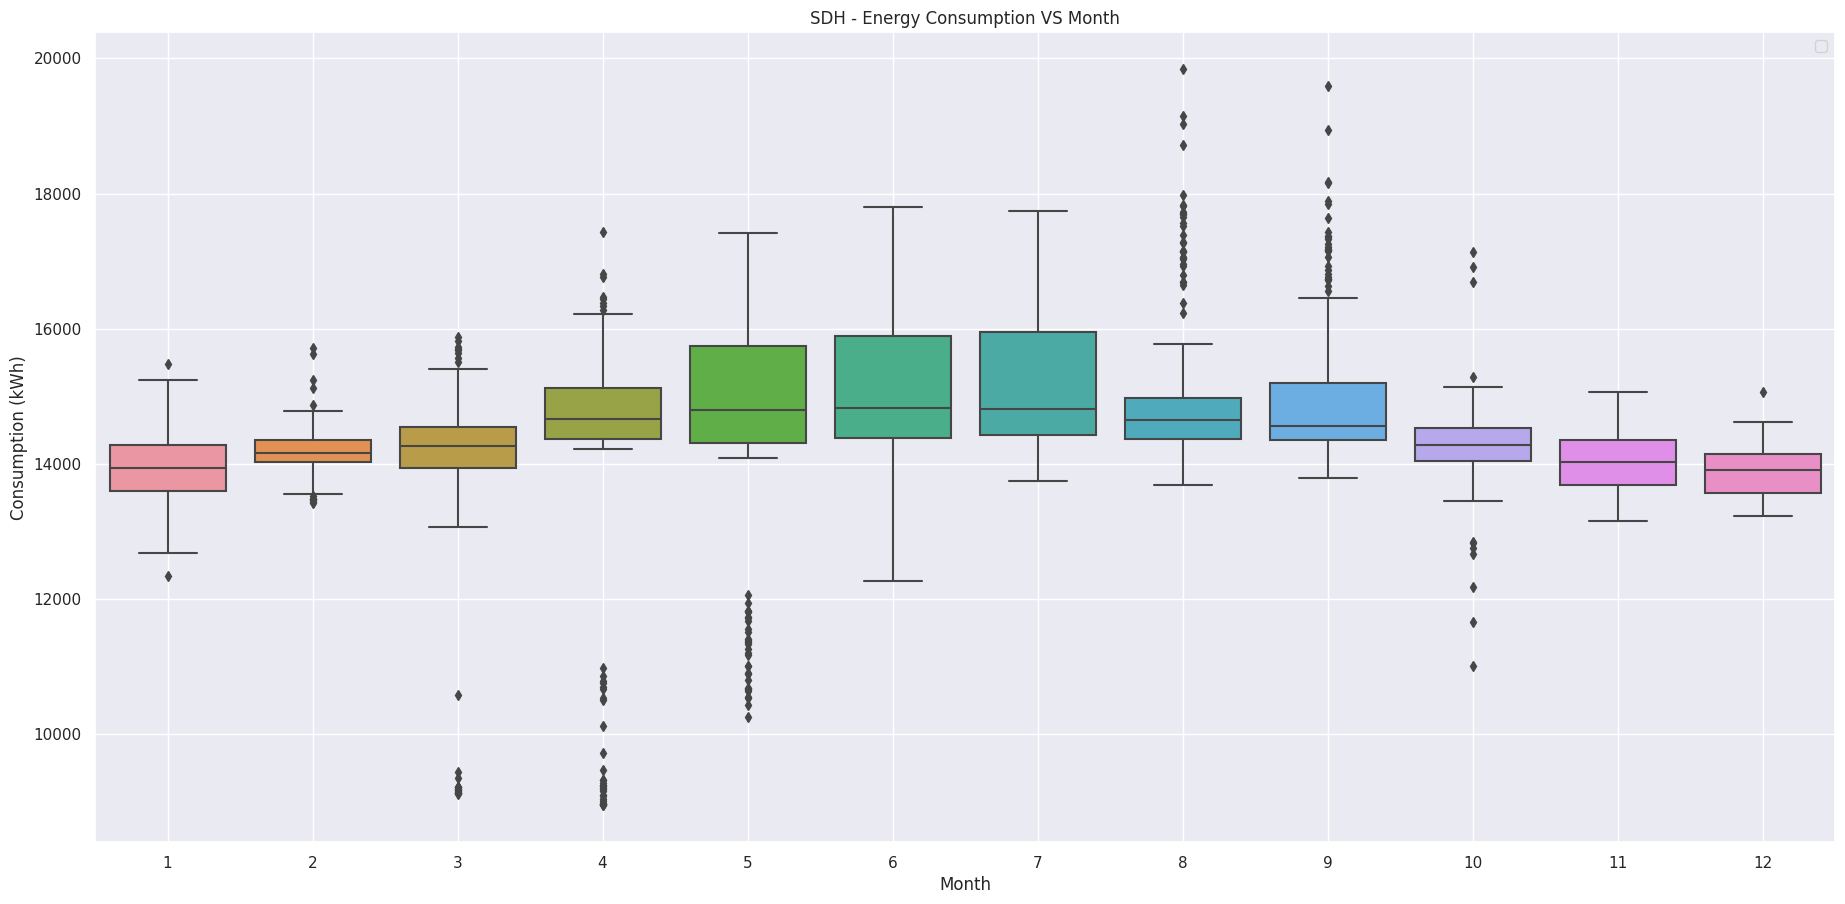

In [ ]:
daily_df_sd["Month"] = pd.to_datetime(daily_df_sd['Date']).dt.month
sns.boxplot(x=daily_df_sd["Month"], y=daily_df_sd['Consumption (kWh)'])
plt.title("SDH - Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

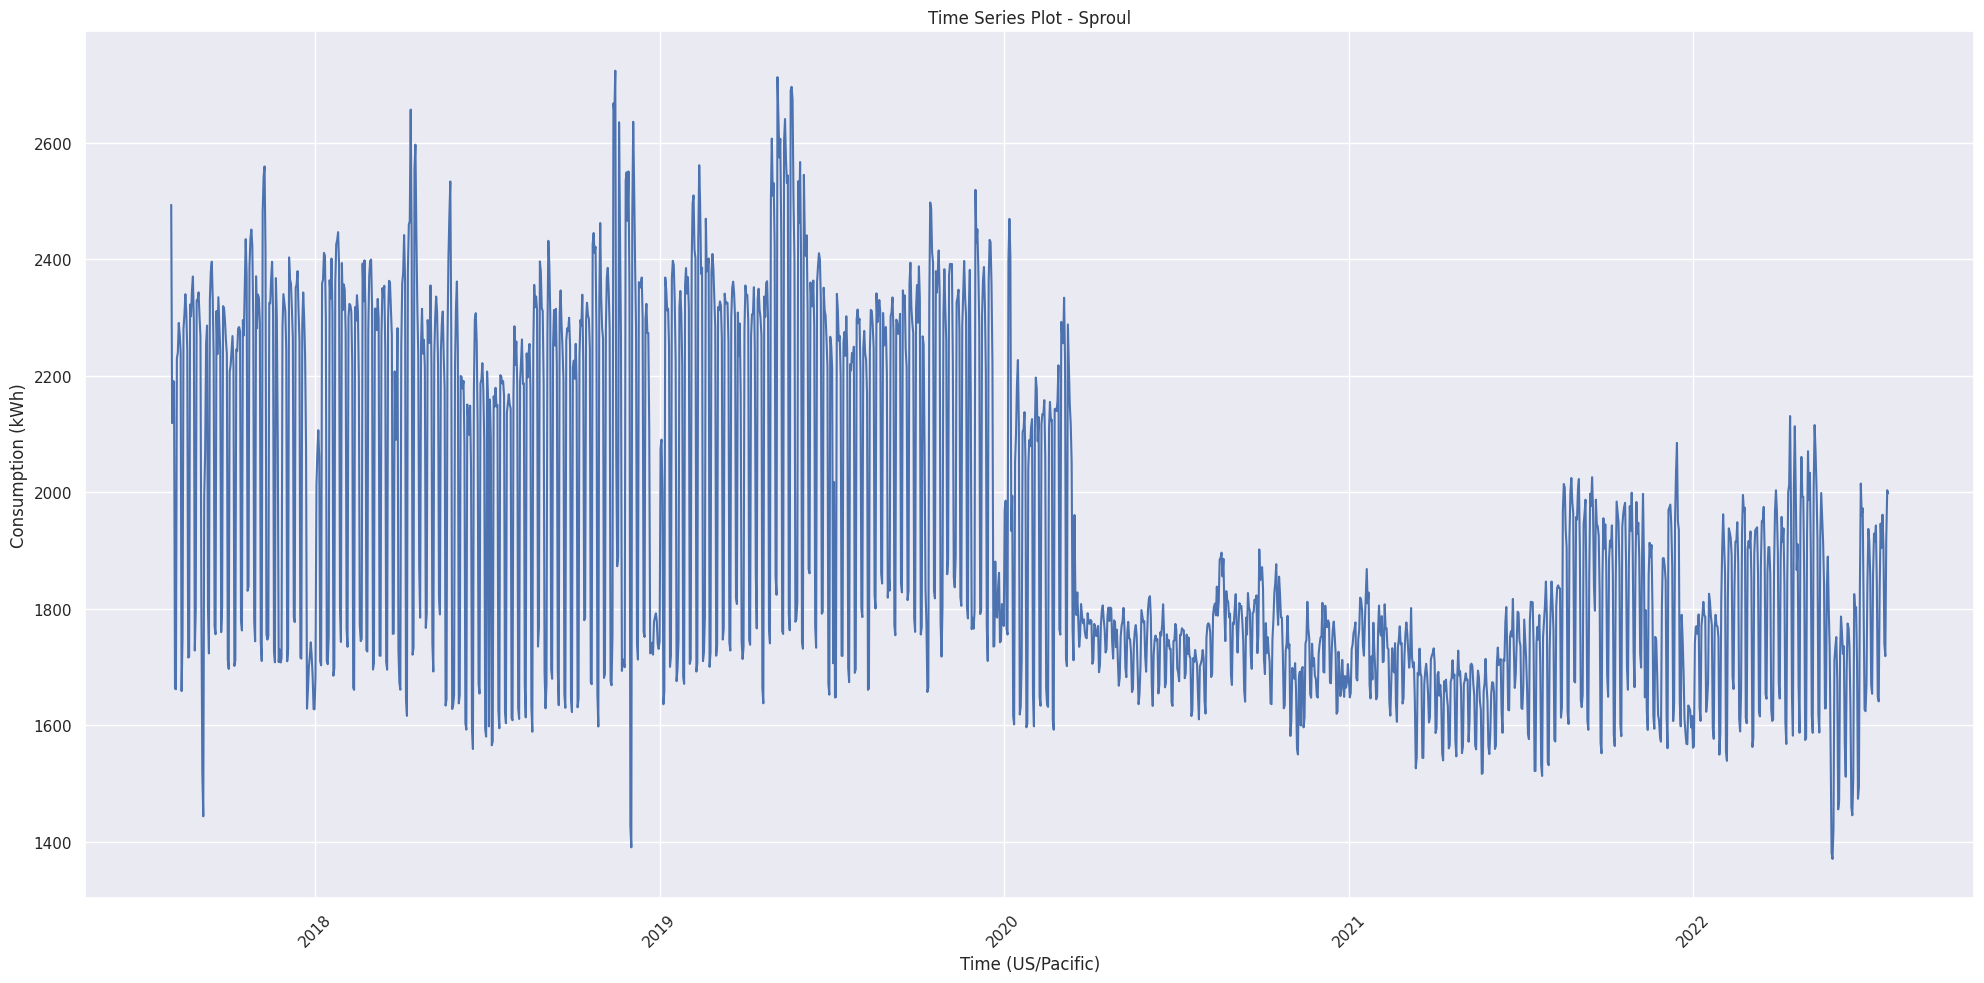

In [ ]:
#Showing Vizualisation for Sproul
daily_df_s['time (US/Pacific)'] = pd.to_datetime(daily_df_s['Date'])

fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))
style.use("ggplot")
sns.lineplot(x= daily_df_s['Date'], y= daily_df_s['Consumption (kWh)'])
sns.set(rc={'figure.figsize': (20,10)})
plt.xlabel('Time (US/Pacific)')
plt.ylabel('Consumption (kWh)')
plt.title('Time Series Plot - Sproul')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above shows Sproul Hall's energy consumption from 2018 to 2022. It can be seen that after 2020 the building records a lower energy consumption.

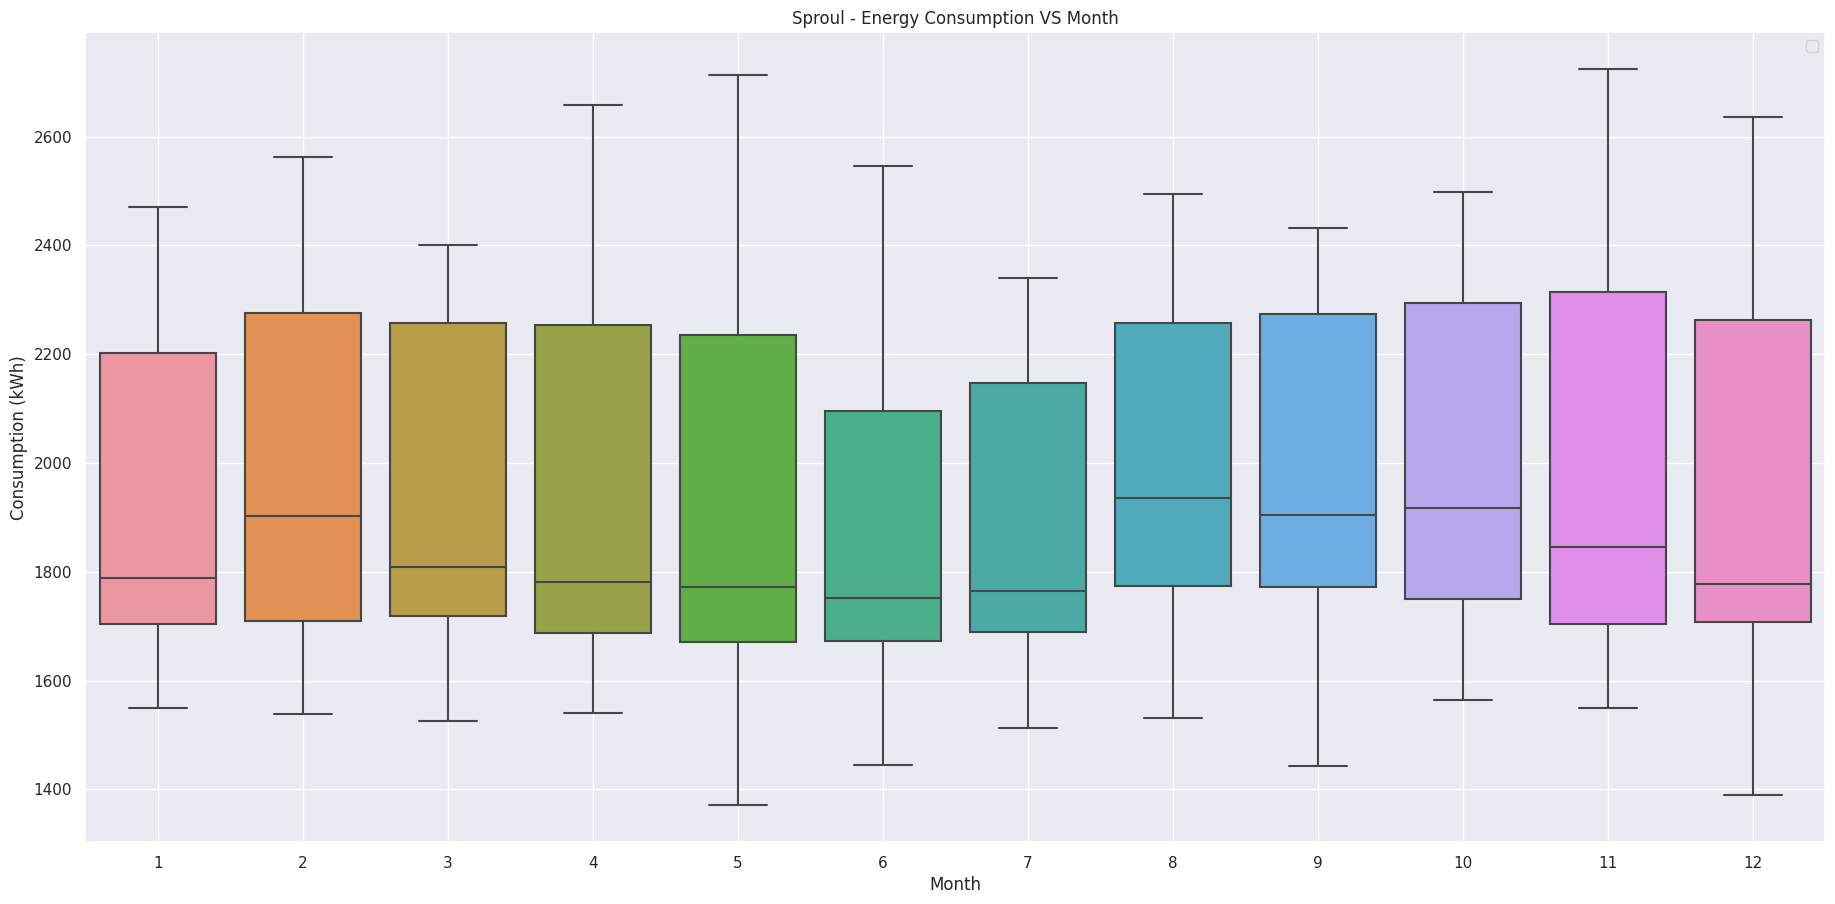

In [ ]:
daily_df_s["Month"] = pd.to_datetime(daily_df_s['Date']).dt.month
sns.boxplot(x=daily_df_s["Month"], y=daily_df_s['Consumption (kWh)'])
plt.title("Sproul - Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?).
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable.

## Linear, Ridge and Lasso Model


### Linear, Ridge, and Lasso Model - Sproul

In [ ]:
daily_df_s.describe()

Consumption (kWh)  kW total (kW)  kW demand (kW)  I ave (Amps)  \
count        1822.000000    1822.000000     1822.000000   1822.000000   
mean         1939.007832      80.791993       80.474655    223.522904   
std           291.445311      12.143555       12.070419     34.656363   
min          1370.361750      57.098406       56.877500    157.084375   
25%          1708.122711      71.171780       70.872182    196.295296   
50%          1808.149000      75.339542       75.120063    207.643916   
75%          2248.611375      93.692141       93.426250    260.871354   
max          2724.202887     113.508454      112.201237    319.984536   

       kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
count     1822.000000        1822.000000            1822.000000   
mean    512276.498793          10.726097              54.048957   
std     300961.874719           3.851025              24.649086   
min        990.927835           0.889573              10.200000   
25%     235820.140729           8.127263              24.100000   
50%     527716.786458           9.453582              63.300000   
75%     780416.901042          13.651824              73.300000   
max     998738.752577          21.253134             104.000000   

       Daily Min Temperature        Month  
count            1822.000000  1822.000000  
mean               39.046981     6.522503  
std                20.344111     3.453192  
min                 0.400000     1.000000  
25%                14.000000     4.000000  
50%                47.350000     7.000000  
75%                55.800000    10.000000  
max                73.500000    12.000000

In [ ]:
scaled_df = daily_df_s.iloc[:,1:8] # We'll standardize the features

scaler = StandardScaler() # Initialize the StandardScaler
scaler.fit(scaled_df) # Fit the standard scaler for each feature
print(scaler.mean_) # Print the mean value of each feature

master_stnd = scaler.transform(scaled_df) # Standardize each features
master_stnd

[1.93900783e+03 8.07919930e+01 8.04746547e+01 2.23522904e+02
 5.12276499e+05 1.07260971e+01 5.40489572e+01]


array([[ 1.9042121 ,  1.9042121 ,  1.99827078, ...,  0.47005759,
         1.57139455, -1.05302407],
       [ 0.61755478,  0.61755478,  0.65724621, ...,  0.47585677,
         1.25343056, -0.90693394],
       [ 0.86661967,  0.86661967,  0.93894471, ...,  0.48297504,
         1.18802291, -1.08954661],
       ...,
       [-0.06141116, -0.06141116, -0.05114355, ..., -1.12630962,
         0.10597943,  0.75687038],
       [ 0.22168791,  0.22168791,  0.21859801, ..., -1.11977027,
        -0.24346336,  0.81774127],
       [ 0.20357147,  0.20357147,  0.2080321 , ..., -1.113134  ,
        -0.34028504,  0.81774127]])

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_s = pd.DataFrame(daily_df_s)

# Use .loc for column selection
X = daily_df_s.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_s.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_s.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_s.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

#X = daily_df_s.loc[:, 'kW total (kW)':'Daily Min Temperature'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 4.671587330626553e-16
train RMSE: 1960.7499937047583
R^2 test: 1.0
R^2 train: 1.0


array([[ 1.00000000e+00,  4.56434303e-16, -3.24987100e-16,
         5.17218787e-17,  1.97467849e-16,  2.11276801e-17,
        -1.88083986e-16]])

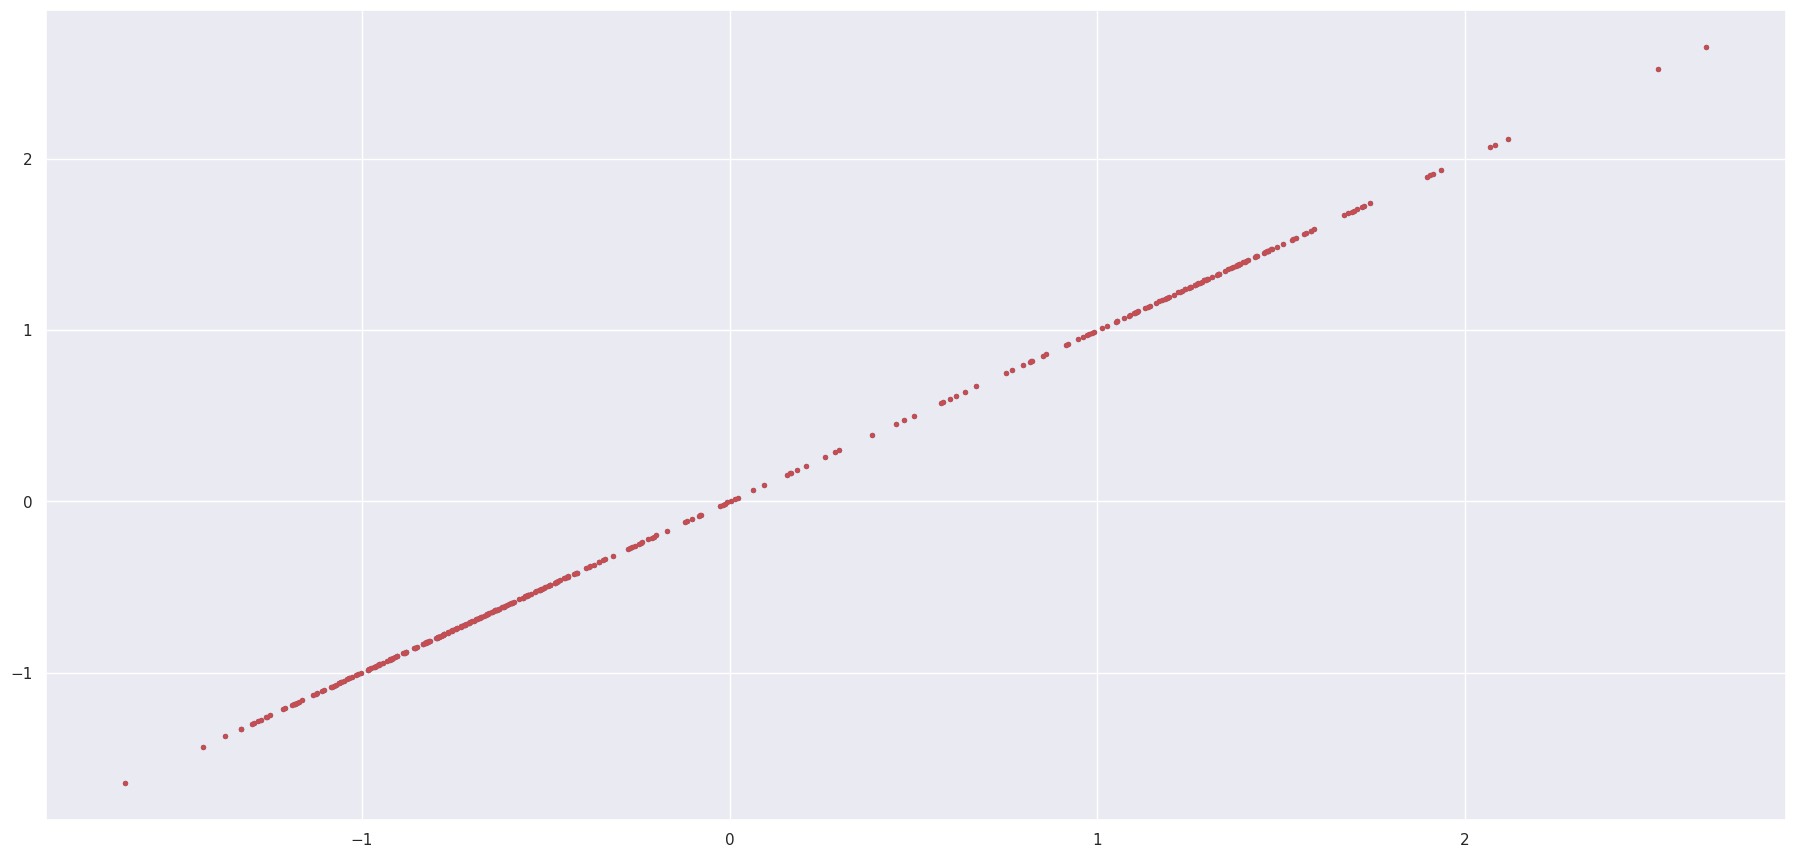

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=8)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=8, color = "r")


In [ ]:
#LR Model used to display non standardized scatter plot

MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)

MLR_coefs = MLR_fit.coef_
MLR_coefs

array([[ 2.40000000e+01,  1.45756702e-14,  6.40807962e-16,
         6.13781902e-18, -4.33639519e-15,  1.23635633e-16,
        -8.18615622e-16]])

Text(0.5, 1.0, 'Scatter Plot of True vs Predicted Values Sproul')

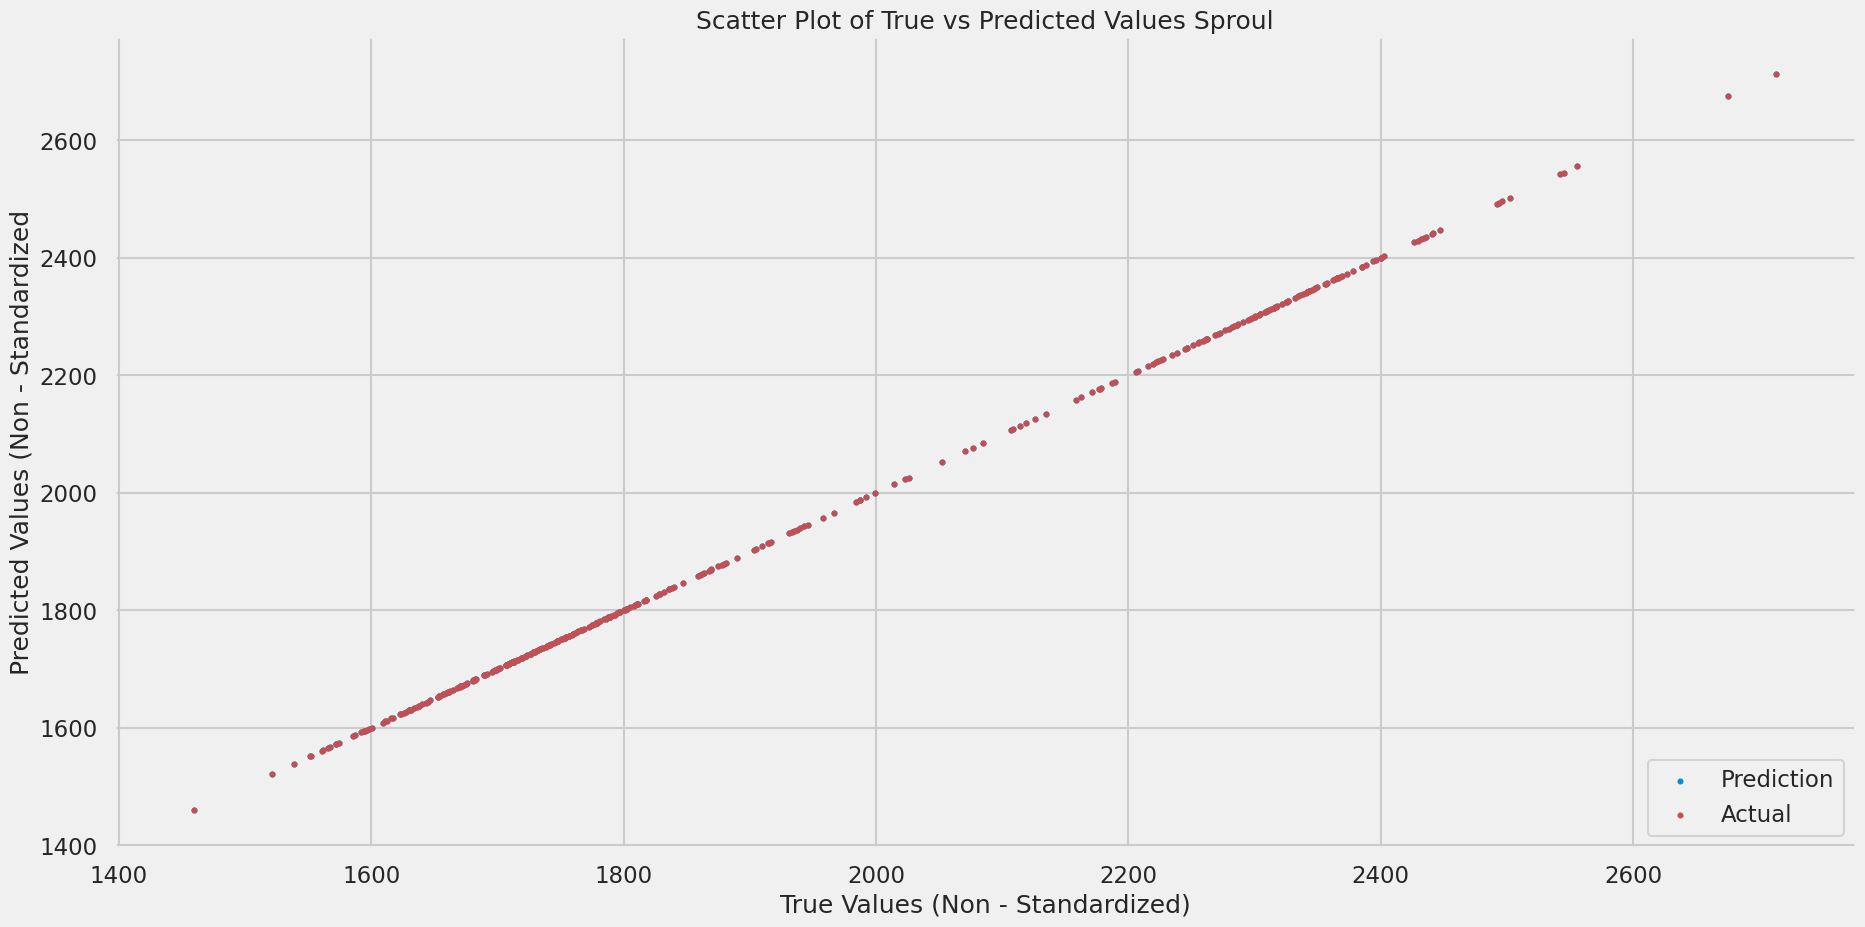

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=8)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=8, color="r")
plt.legend(['Prediction', 'Actual'], loc=4)
plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized')
plt.title('Scatter Plot of True vs Predicted Values Sproul')

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reshape the target variables
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1457, 7) (1457, 1) (365, 7) (365, 1)
(1457, 7) (1457,) (365, 7) (365,)


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)

[ 2.40000000e+01  1.45756702e-14  6.40807962e-16  6.13781902e-18
 -4.33639519e-15  1.23635633e-16 -8.18615622e-16]


In [ ]:
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[ 2.37498709e+01  1.73190725e-01  2.84026634e-02  5.72762207e-09
 -1.01715731e-02 -3.02799233e-04  1.08607461e-03]


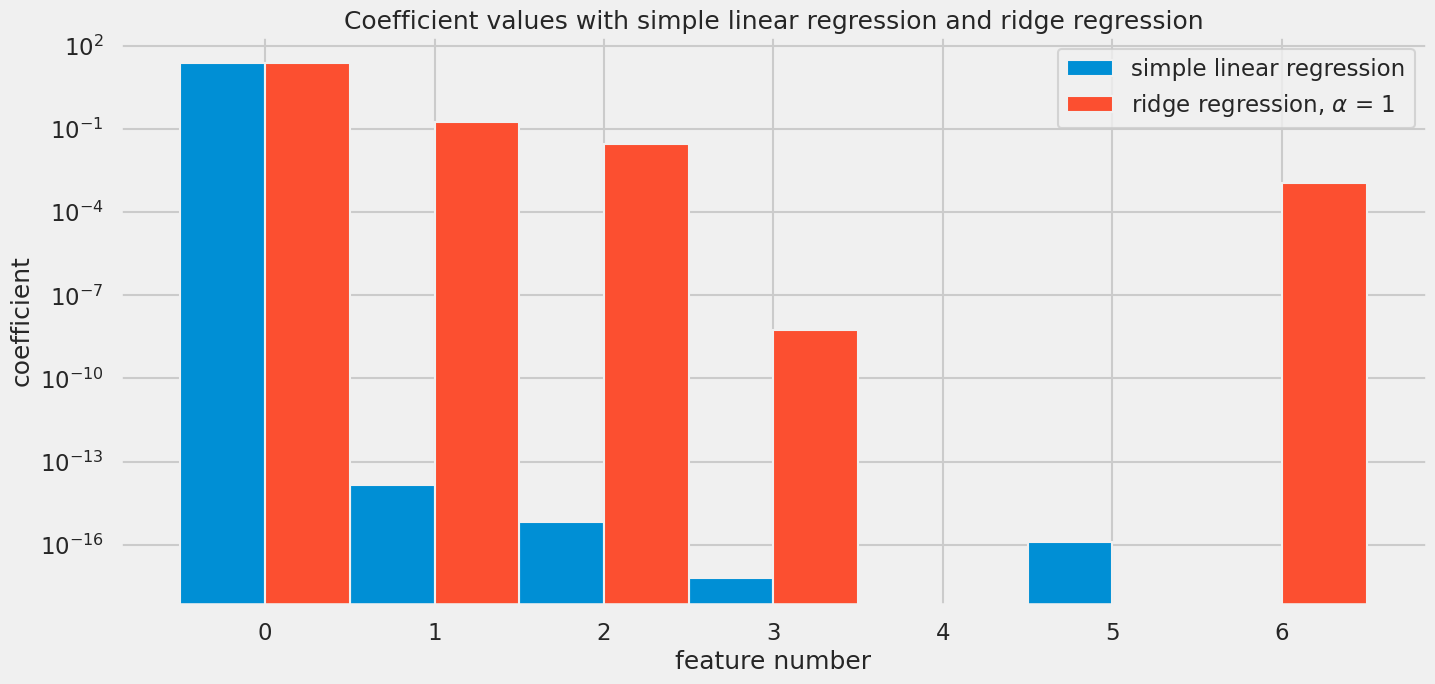

In [ ]:
#Plotting coefficient values
ind = np.arange(len(lm_coefficients))
width = 0.5

plt.figure(figsize=(15, 7))

plt.bar(ind - (width / 2), width=width, height=lm_coefficients, label="simple linear regression")
plt.bar(ind + (width / 2), width=width, height=ridge_coefficients, label=r"ridge regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression and ridge regression")
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.show()

[4.273100388642671e-05, 0.00017038458614591716, 0.0003821576668779823, 0.0006772551781655787, 0.001054889975411219, 0.0023549824110856753, 0.004154116727524199, 0.016111873283453478]


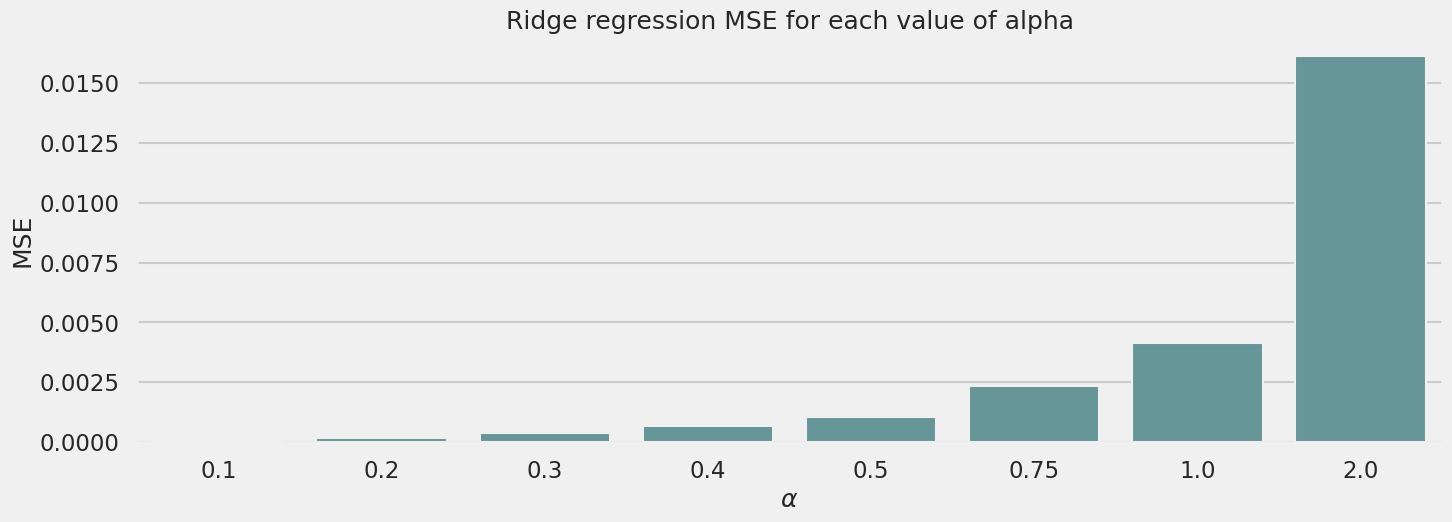

In [ ]:
#Plotting alphas

alphas = [ .1,.2,.3,.4,.5,.75, 1, 2]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

plt.figure(figsize=(15, 5))
sns.barplot(x=alphas, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
#plt.xscale('%log')  # Set x-axis to log scale
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()


In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 4.273100388642671e-05 ; alpha: 0.1


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 2.20041166e+01  0.00000000e+00  7.09911049e-01  2.97850590e-07
 -5.15827724e-02  0.00000000e+00  3.37245958e-02]


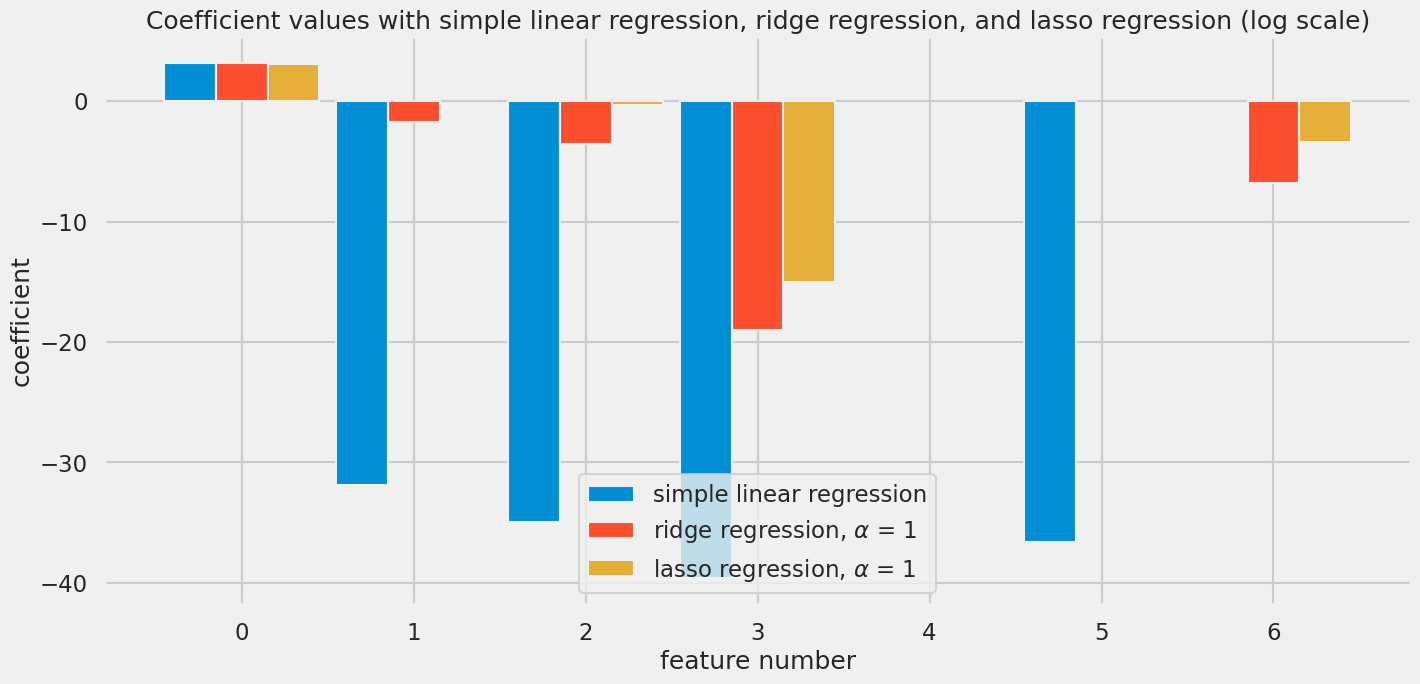

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.3

plt.figure(figsize = (15,7))

plt.bar(ind-width, width = width, height = np.log(lm_coefficients), label = "simple linear regression")
plt.bar(ind, width = width, height = np.log(ridge_coefficients), label = r"ridge regression, $\alpha$ = 1")
plt.bar(ind+width, width = width, height = np.log(lasso_coefficients), label = r"lasso regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
#Detail the features used snd the proportion of ignored features
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.2857142857142857
columns included: Index(['kW total (kW)', 'I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)',
       'Daily Min Temperature'],
      dtype='object')


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
#display alpha values
alphas = [.1,.2,.3,.4,.5,.75, 1, 2]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[8.612278328128872e-06,
 3.4449113312947636e-05,
 7.751050495394008e-05,
 0.000137796453251088,
 0.00021530695820445414,
 0.5276106163262244,
 0.9379744290244275,
 3.7518977160973512]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 3.3485234351654325e-24
ridge regression minimum MSE: 4.273100388642671e-05
lasso regression minimum MSE: 8.612278328128872e-06


In [ ]:
def model_cv_mse(SKL_model, X, y, alphas, k = 100, random_state = 8):
    """
    This function calculates the MSE resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of
    X and y for different values of alpha.
    Inputs:
        SKL_model (sklearn model): the type of sklearn model with which to fit the data - options include Ridge, or Lasso
        X: the set of features used to fit the model
        y: the set of response variable observations
        alphas: a list of penalty parameters
        k: number of folds in k-fold cross-validation
        random_state: a random seed to use in KFold
    Returns:
        mses: a list containing the mean squared cross-validation error corresponding to each value of alpha
    """
    mses = np.full((k,len(alphas)),np.nan)

    kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

    fold = 0
    for train_i, val_i in kf.split(X):
        X_f_train = X[train_i]
        X_f_val = X[val_i]
        y_f_train = y.iloc[train_i]
        y_f_val = y.iloc[val_i]

        for i in range(len(alphas)):
            model = SKL_model(alpha = alphas[i])

            model.fit(X_f_train, y_f_train)

            y_pred = model.predict(X_f_val)

            mses[fold,i] = mean_squared_error(y_pred,y_f_val)

        fold += 1

    average_mses = np.mean(mses, axis = 0)

    return average_mses

In [ ]:
#find optimal alpha and total MSE with cross validated Ridge
alphas_ridge = np.linspace(0.01,5, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Ridge: 4.2852955883010174e-07


In [ ]:
#find optimal alpha and total MSE with cross validated LASSO

alphas_lasso = np.linspace(0.01, .7, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 8.612278327316733e-08


#### Redoing the Linear, Ridge, and Lasso Models with refined feature set

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_s_r = pd.DataFrame(daily_df_s)

# Use .loc for column selection
X = daily_df_s_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_s_r.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_s_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_s_r.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 0.0340048470754097
train RMSE: 1960.7501616742245
R^2 test: 0.9988376062126936
R^2 train: 0.9988691795637232


array([[ 1.04499823,  0.00364009, -0.04913747, -0.01361053,  0.03094199]])

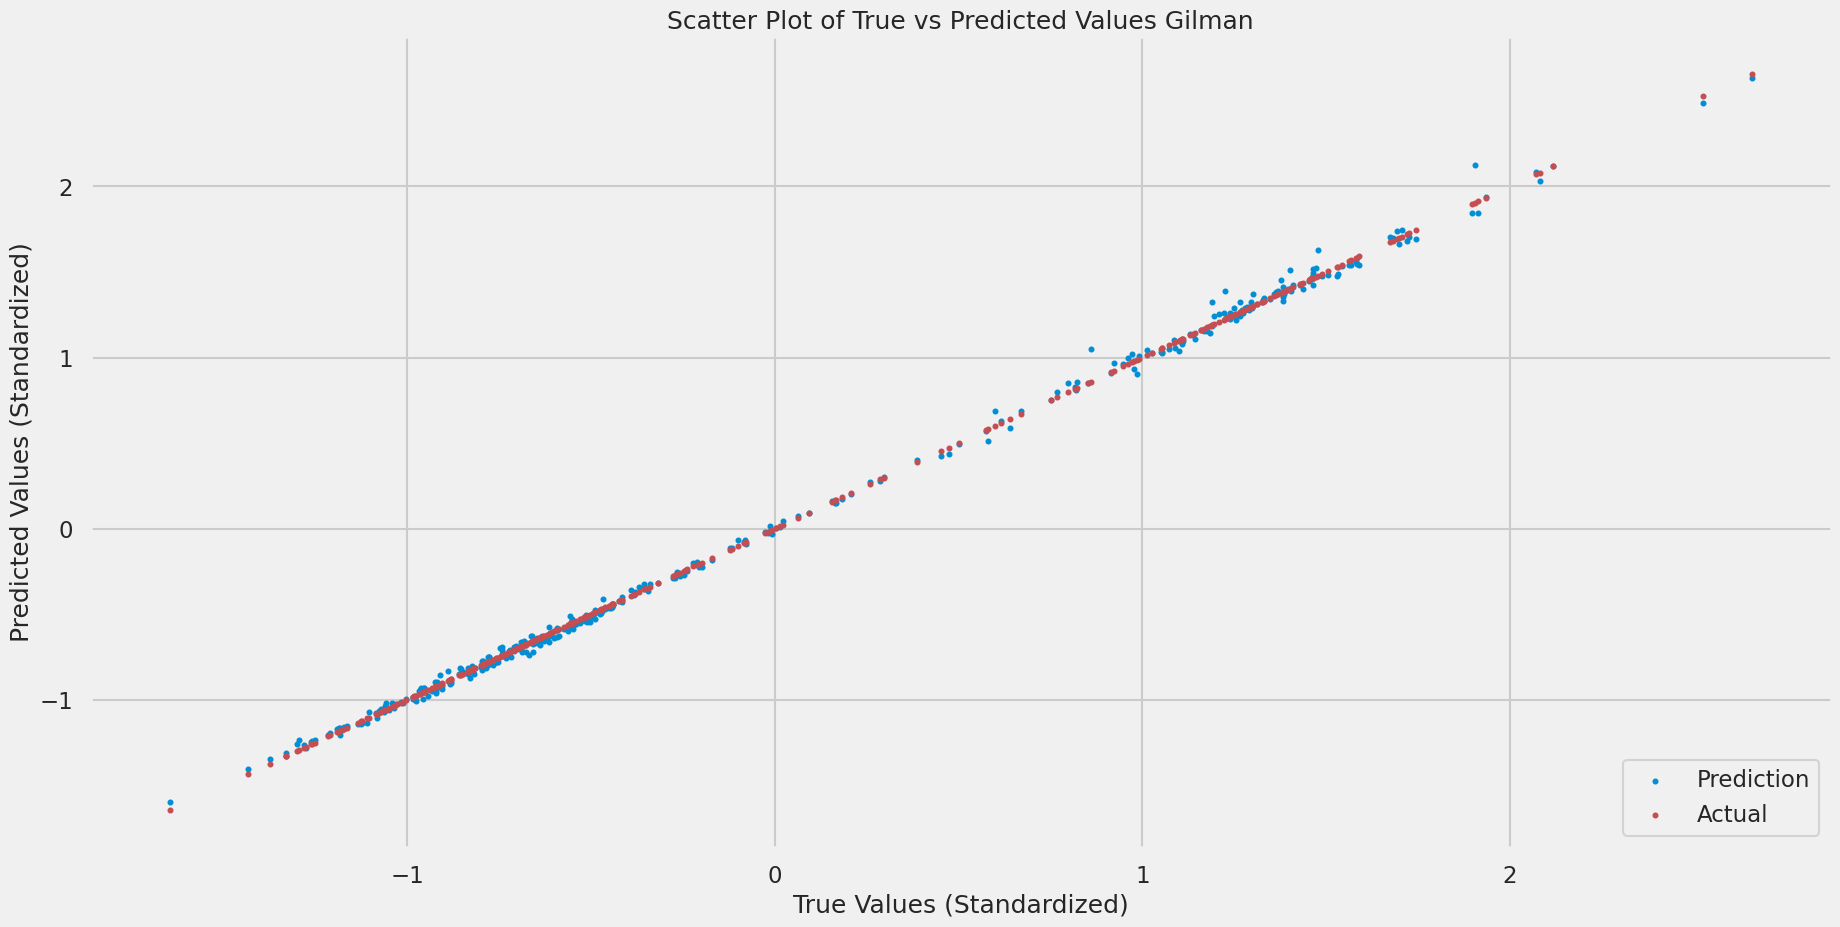

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=8)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=8, color = "r")

plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Gilman')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
#LR Model
MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)
MLR_coefs = MLR_fit.coef_
MLR_coefs

array([[ 8.78799169e+00,  3.52498453e-06, -3.71871975e+00,
        -1.60927850e-01,  4.43268232e-01]])

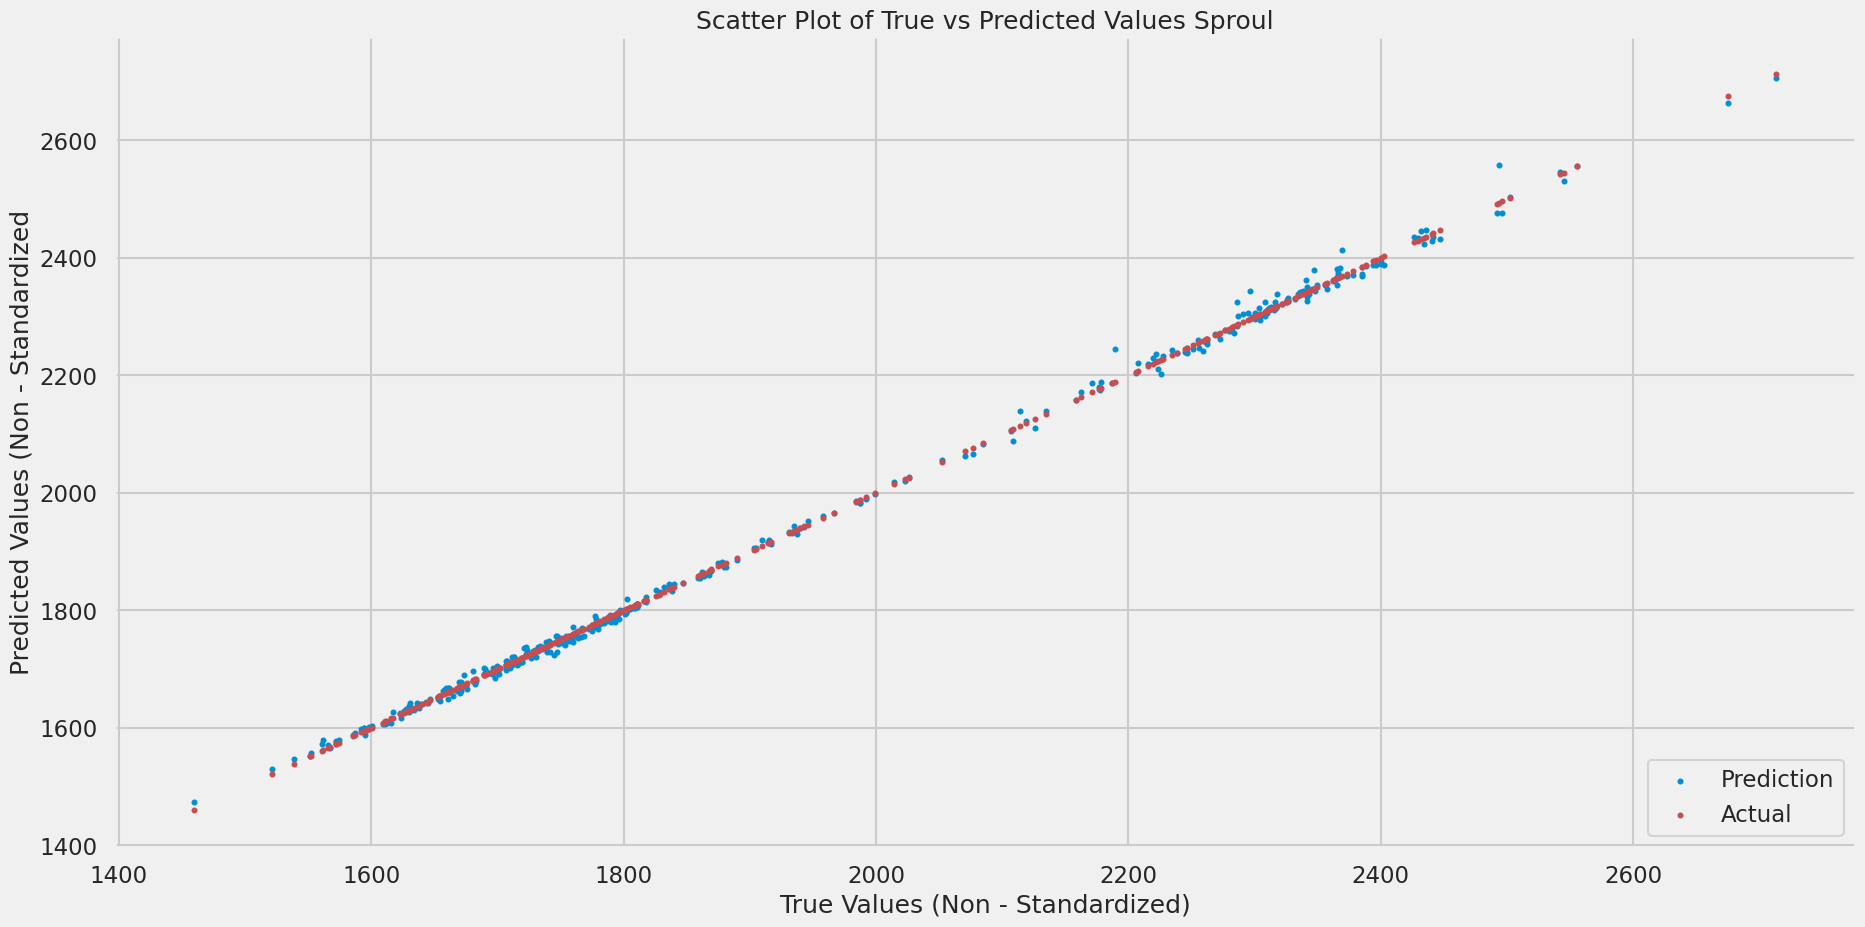

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=8)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=8, color="r")

plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized')
plt.title('Scatter Plot of True vs Predicted Values Sproul')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reshape the target variables
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1457, 5) (1457, 1) (365, 5) (365, 1)
(1457, 5) (1457,) (365, 5) (365,)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)


[ 8.78799169e+00  3.52498453e-06 -3.71871975e+00 -1.60927850e-01
  4.43268232e-01]


In [ ]:
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[ 8.78792881e+00  3.52501971e-06 -3.71796205e+00 -1.60892867e-01
  4.43269592e-01]


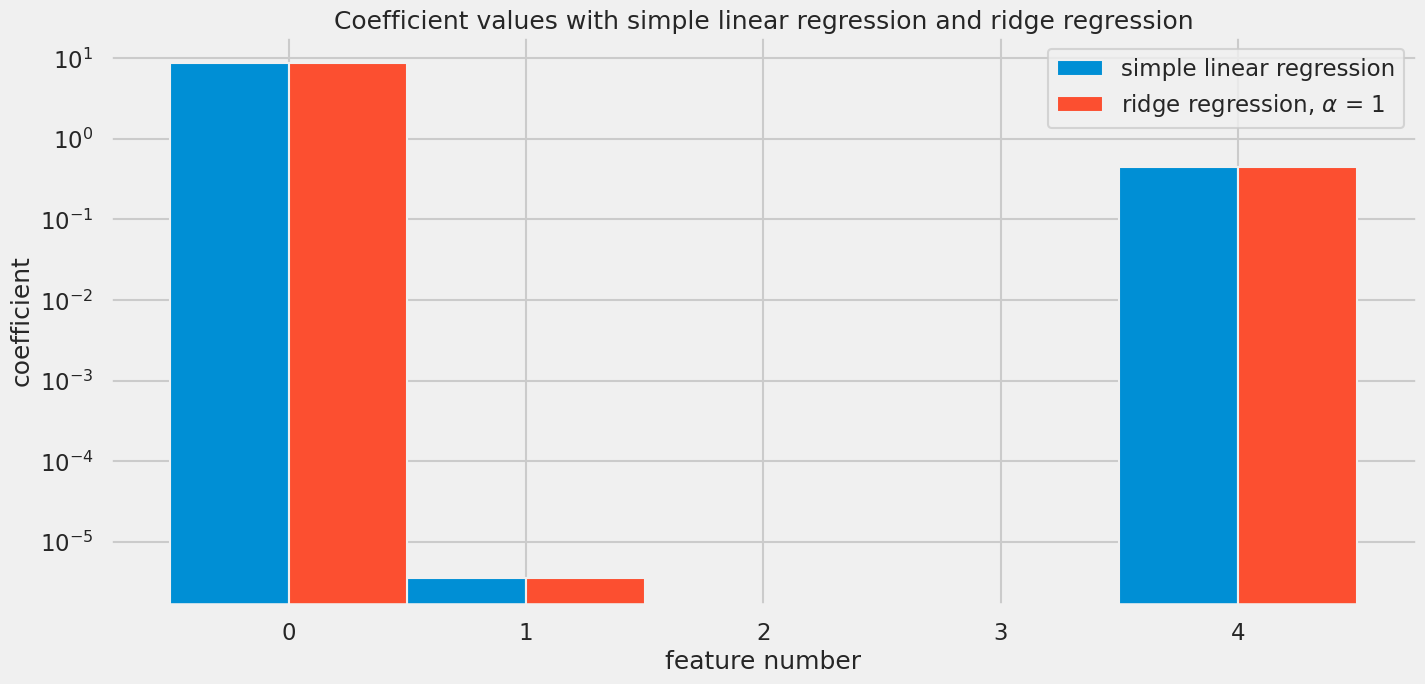

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.5

plt.figure(figsize=(15, 7))

plt.bar(ind - (width / 2), width=width, height=lm_coefficients, label="simple linear regression")
plt.bar(ind + (width / 2), width=width, height=ridge_coefficients, label=r"ridge regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression and ridge regression")
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.show()

[98.16516263900358, 98.16516734967394, 98.16517210328706, 98.16517689984016, 98.1651817393285, 98.165194025859, 98.16520658063713, 98.1652594808097]


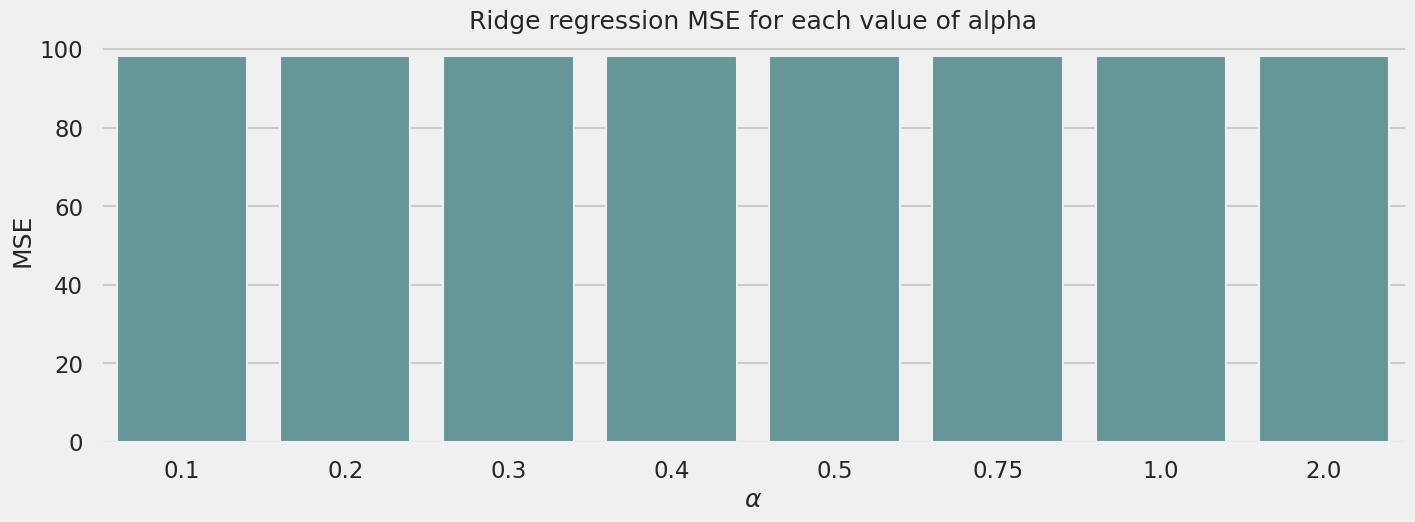

In [ ]:
#Find optimal alpha values
alphas = [ .1,.2,.3,.4,.5,.75, 1, 2]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

plt.figure(figsize=(15, 5))
sns.barplot(x=alphas, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
#plt.xscale('%log')  # Set x-axis to log scale
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()

In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 98.16516263900358 ; alpha: 0.1


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 8.76664395e+00  3.60790249e-06 -3.44582301e+00 -8.86492656e-02
  3.72567246e-01]


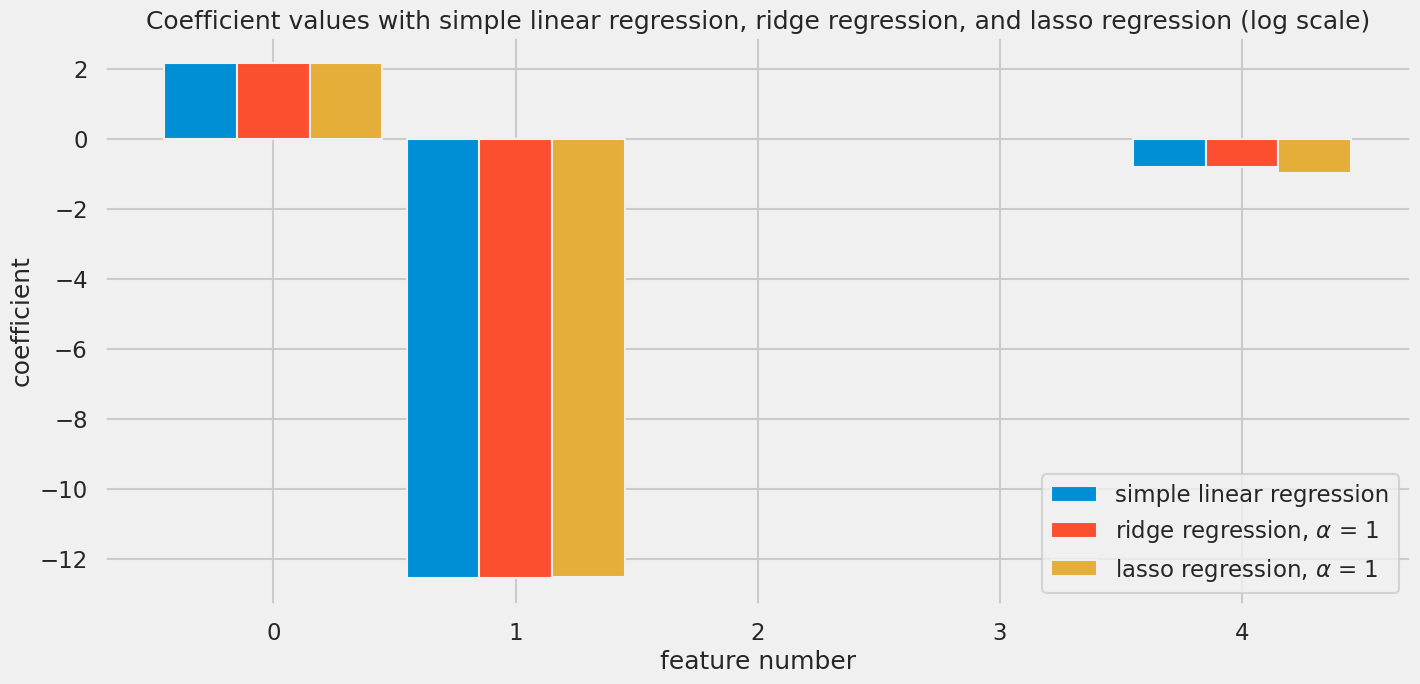

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.3

plt.figure(figsize = (15,7))

plt.bar(ind-width, width = width, height = np.log(lm_coefficients), label = "simple linear regression")
plt.bar(ind, width = width, height = np.log(ridge_coefficients), label = r"ridge regression, $\alpha$ = 1")
plt.bar(ind+width, width = width, height = np.log(lasso_coefficients), label = r"lasso regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.0
columns included: Index(['I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)',
       'Daily Max Temperature', 'Daily Min Temperature'],
      dtype='object')


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
alphas = [.1,.2,.3,.4,.5,.75, 1, 2]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[98.19792953949946,
 98.23956336253697,
 98.29002451125817,
 98.34936907339645,
 98.41751544809898,
 98.62663137518562,
 98.8910007686778,
 100.5016870835915]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 98.16515797128196
ridge regression minimum MSE: 98.16516263900358
lasso regression minimum MSE: 98.19792953949946


In [ ]:
alphas_ridge = np.linspace(0.01,100, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 24.250000000000004
Test MSE with cross-validated Ridge: 98.16753707536243


In [ ]:
test_mse = 98.16753707536216
rmse_r = np.sqrt(test_mse)

print("Test RMSE:", rmse_r)

Test RMSE: 9.907953223313186


In [ ]:
alphas_lasso = np.linspace(0.01, .4, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 98.16803690686261


In [ ]:
test_mse = 98.16803690686272
rmse_l = np.sqrt(test_mse)

print("Test RMSE:", rmse_l)

Test RMSE: 9.90797844703261


### Linear, Ridge, and Lasso Model - Sutardja

In [ ]:
daily_df_sd.describe()

Consumption (kWh)  kW total (kW)  kW demand (kW)  I ave (Amps)  \
count        1822.000000    1822.000000     1822.000000   1822.000000   
mean        14419.044564     600.793523      600.770372    776.821842   
std          1315.979796      54.832492       54.846897     62.225103   
min          8946.500000     372.770833      372.989583    481.372917   
25%         13971.204082     582.133503      582.052083    761.352865   
50%         14374.250000     598.927083      598.947917    779.603646   
75%         14804.625000     616.859375      616.828125    799.522396   
max         19842.250000     826.760417      828.489583   1008.187500   

       kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
count    1.822000e+03        1822.000000            1822.000000   
mean     2.587407e+07         276.095778              54.048957   
std      7.543733e+06          25.024100              24.649086   
min      1.266276e+07         176.312500              10.200000   
25%      1.939850e+07         257.423862              24.100000   
50%      2.617173e+07         282.505208              63.300000   
75%      3.224366e+07         295.470173              73.300000   
max      3.891794e+07         316.208333             104.000000   

       Daily Min Temperature        Month  
count            1822.000000  1822.000000  
mean               39.046981     6.522503  
std                20.344111     3.453192  
min                 0.400000     1.000000  
25%                14.000000     4.000000  
50%                47.350000     7.000000  
75%                55.800000    10.000000  
max                73.500000    12.000000

In [ ]:
scaled_df = daily_df_sd.iloc[:,1:8] # We'll standardize the features

scaler = StandardScaler() # Initialize the StandardScaler
scaler.fit(scaled_df) # Fit the standard scaler for each feature
print(scaler.mean_) # Print the mean value of each feature

master_stnd = scaler.transform(scaled_df) # Standardize each features
master_stnd

[1.44190446e+04 6.00793523e+02 6.00770372e+02 7.76821842e+02
 2.58740717e+07 2.76095778e+02 5.40489572e+01]


array([[ 0.09888754,  0.09888754,  0.09895813, ..., -1.75177696,
        -0.99528795, -1.05302407],
       [-0.26720857, -0.26720857, -0.24847858, ..., -1.75028234,
        -0.78079294, -0.90693394],
       [-0.01447575, -0.01447575, -0.02259859, ..., -1.74841659,
        -0.80535934, -1.08954661],
       ...,
       [ 0.28538319,  0.28538319,  0.28269086, ...,  1.72565186,
         1.37938475,  0.75687038],
       [ 0.2669508 ,  0.2669508 ,  0.27300215, ...,  1.72762017,
         1.24406136,  0.81774127],
       [ 0.26600067,  0.26600067,  0.26635303, ...,  1.72957505,
         1.2761226 ,  0.81774127]])

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_sd = pd.DataFrame(daily_df_sd)

# Use .loc for column selection
X = daily_df_sd.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_sd.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_sd.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_sd.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

#X = daily_df_s.loc[:, 'kW total (kW)':'Daily Min Temperature'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 8.611893232996587e-16
train RMSE: 14467.968229168788
R^2 test: 1.0
R^2 train: 1.0


array([[ 1.00000000e+00, -1.12009510e-15, -4.71562094e-16,
         4.23096386e-17,  1.06486041e-16, -9.72589022e-17,
         1.17121602e-17]])

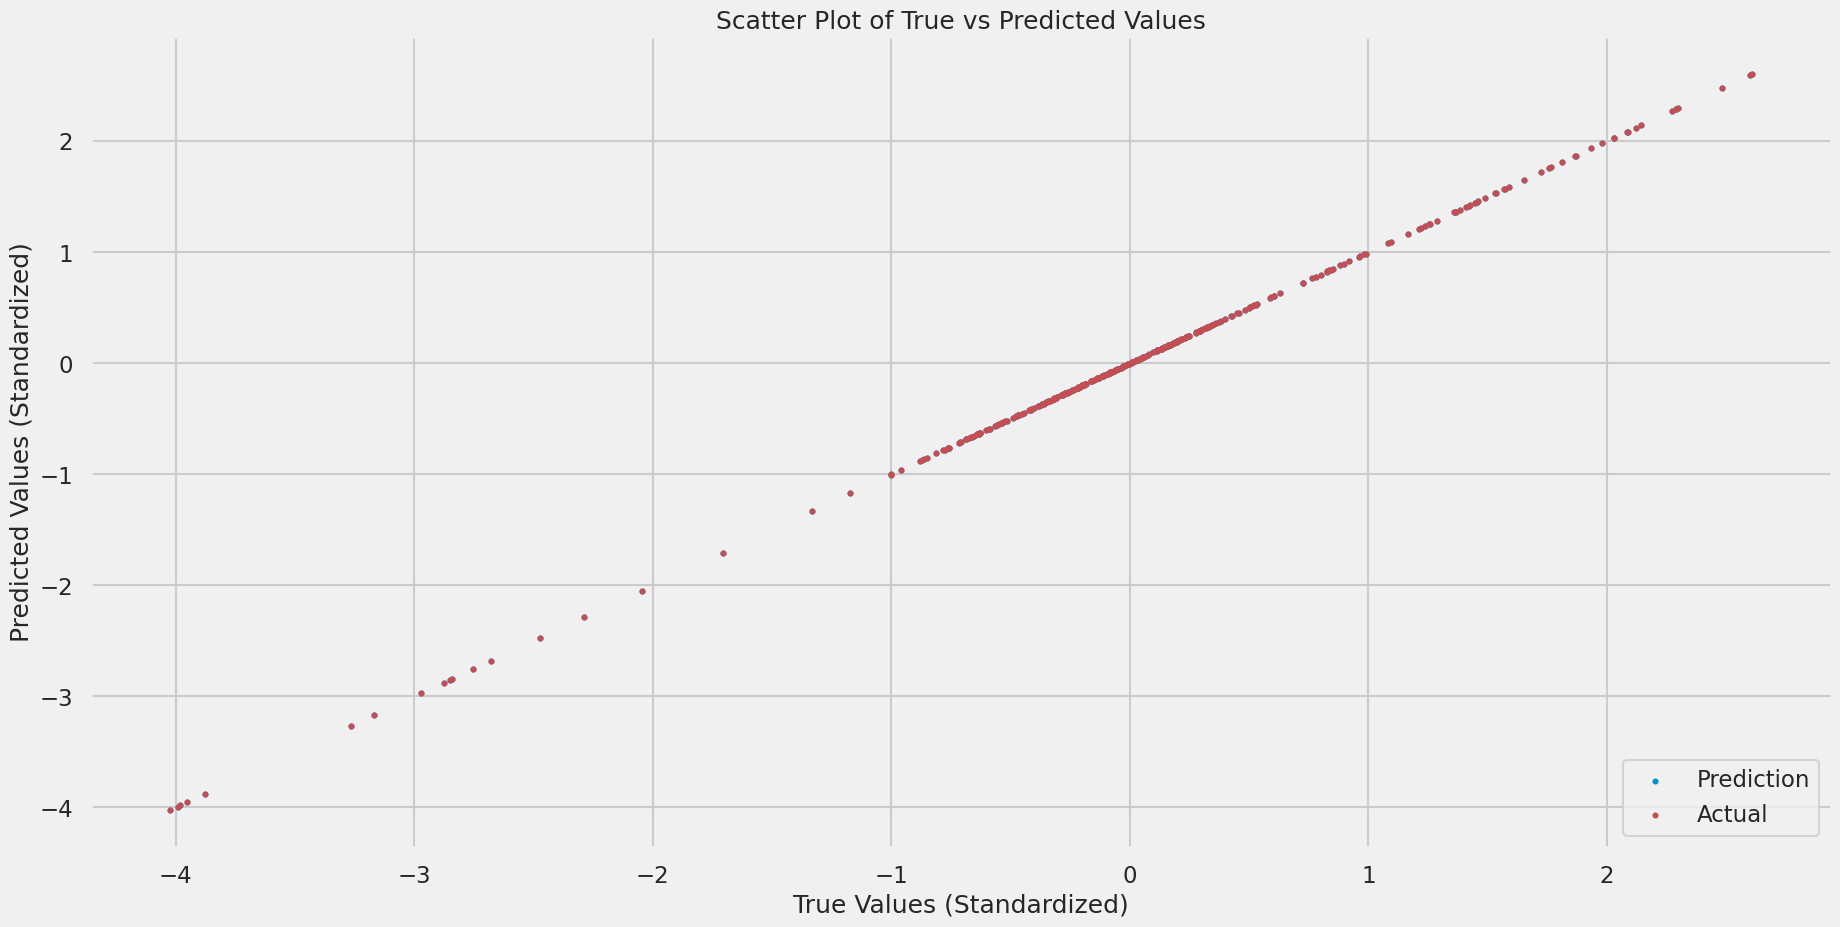

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=8)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=8, color = "r")

plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
#LR Model
from sklearn.linear_model import LinearRegression
MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)
MLR_coefs = MLR_fit.coef_
MLR_coefs

array([[ 2.40000000e+01, -2.79045971e-15, -1.39097665e-14,
         3.46992686e-19,  6.89360626e-15, -2.24885042e-14,
         1.91883648e-14]])

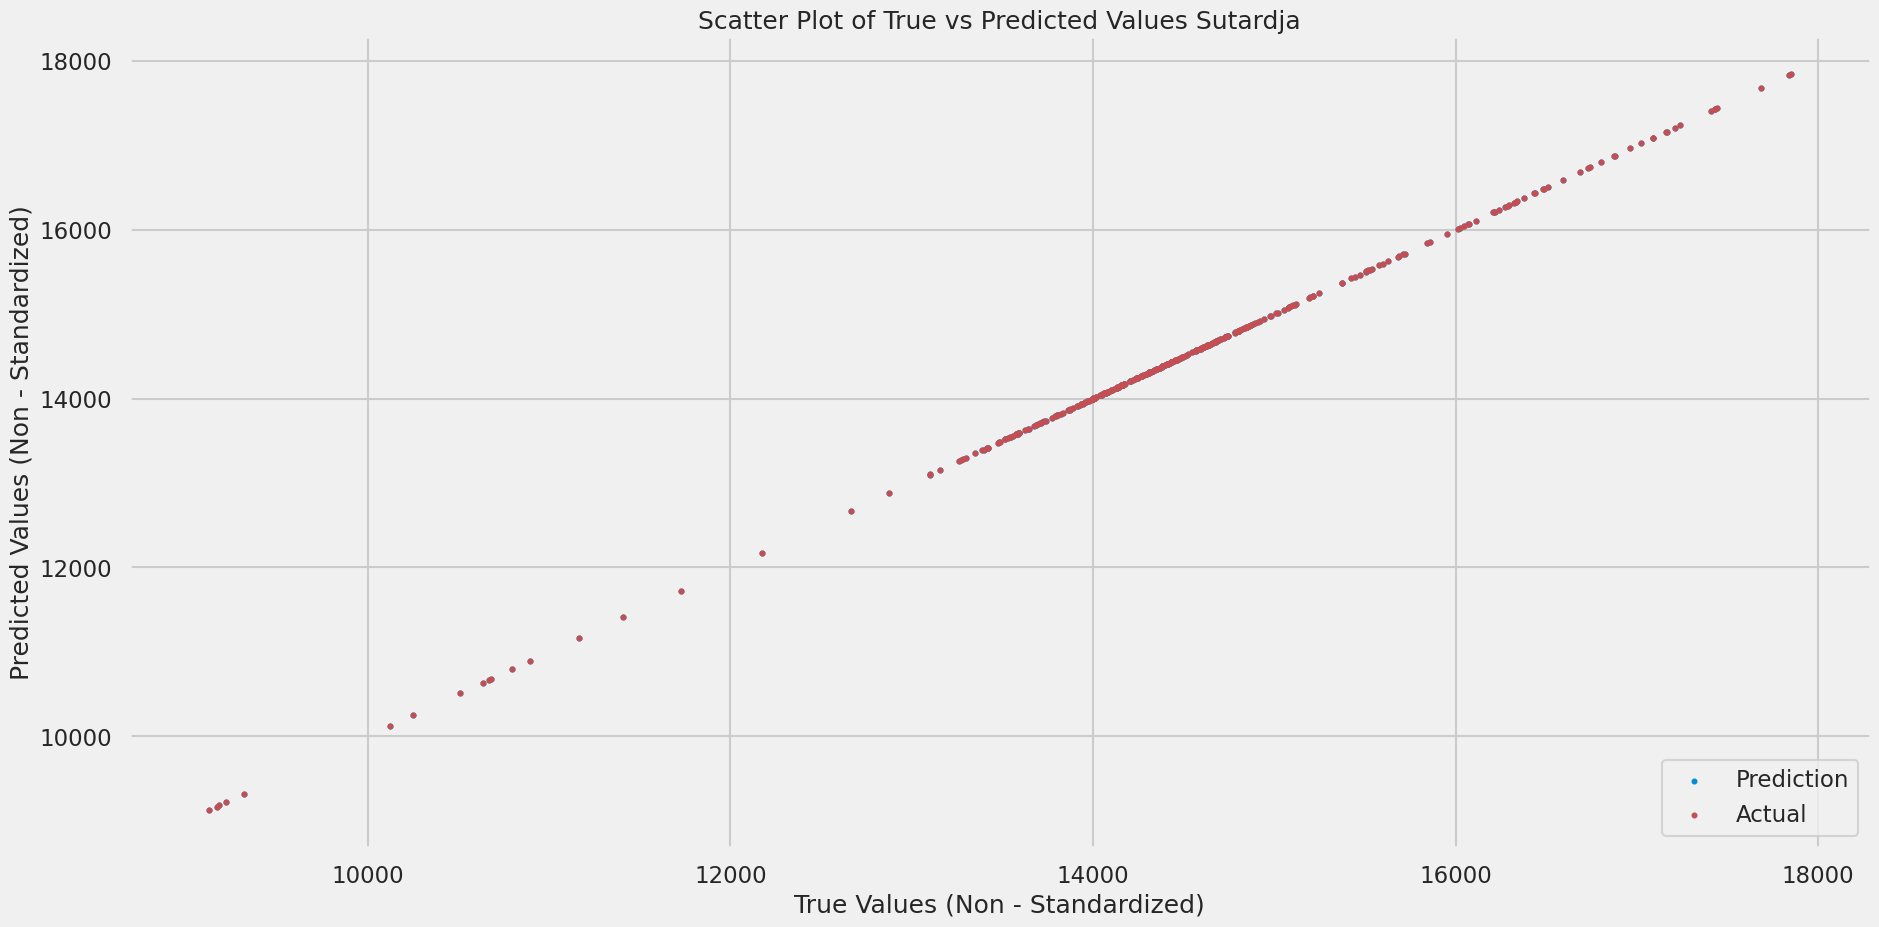

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=8)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=8, color="r")

plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Sutardja')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reshape the target variables
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1457, 7) (1457, 1) (365, 7) (365, 1)
(1457, 7) (1457,) (365, 7) (365,)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)

[ 2.40000000e+01 -2.79045971e-15 -1.39097665e-14  3.46992686e-19
  6.89360626e-15 -2.24885042e-14  1.91883648e-14]


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[ 2.39791579e+01  1.98658111e-02  8.91629119e-04 -3.60487139e-10
 -3.87556983e-04 -2.67959303e-05  1.72608758e-04]


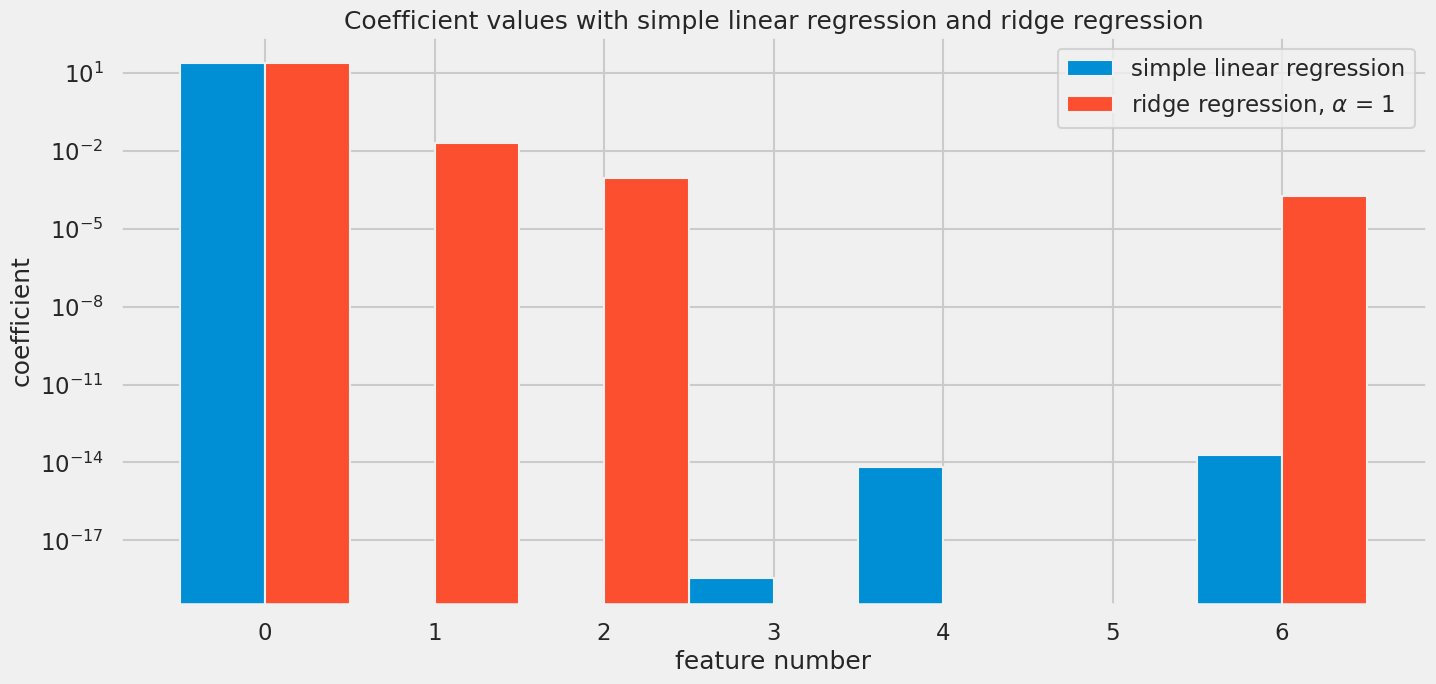

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.5

plt.figure(figsize=(15, 7))

plt.bar(ind - (width / 2), width=width, height=lm_coefficients, label="simple linear regression")
plt.bar(ind + (width / 2), width=width, height=ridge_coefficients, label=r"ridge regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression and ridge regression")
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.show()

[3.771271949243368e-06, 1.5080054501434407e-05, 3.3918802165525136e-05, 6.0279979105768436e-05, 9.415605359105733e-05, 0.0002116745800054974, 0.0003759969055559863, 0.0014989880417776039]


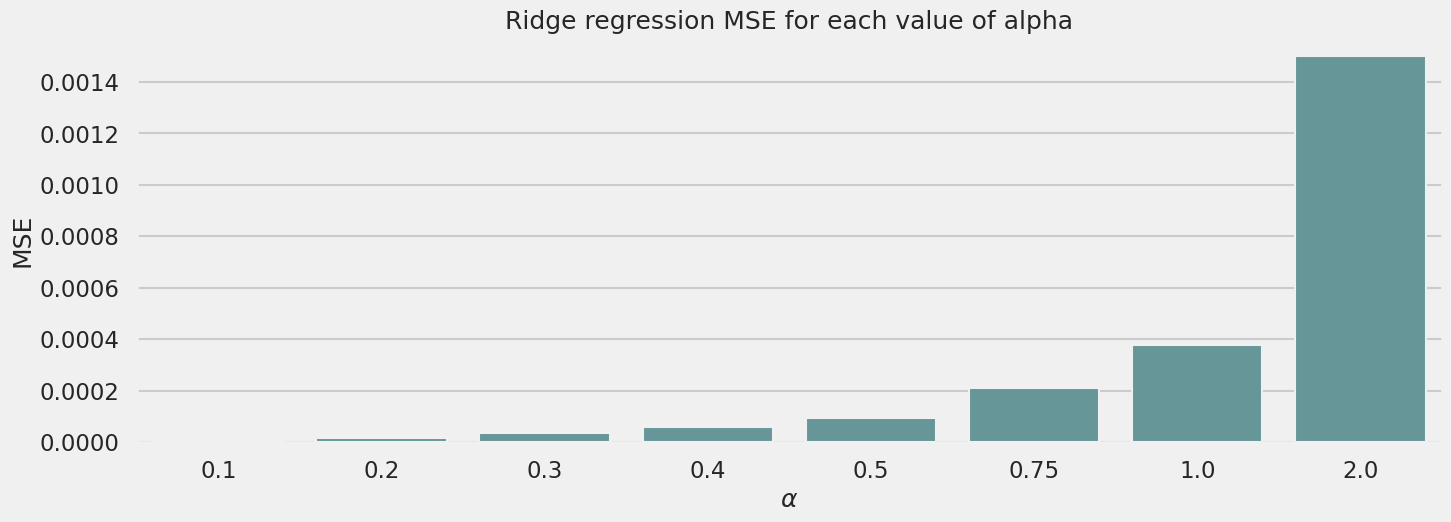

In [ ]:
alphas = [ .1,.2,.3,.4,.5,.75, 1, 2]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

plt.figure(figsize=(15, 5))
sns.barplot(x=alphas, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
#plt.xscale('%log')  # Set x-axis to log scale
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()

In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 3.771271949243368e-06 ; alpha: 0.1


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 2.39996304e+01  1.48375479e-07  5.80571796e-05 -2.76445852e-10
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


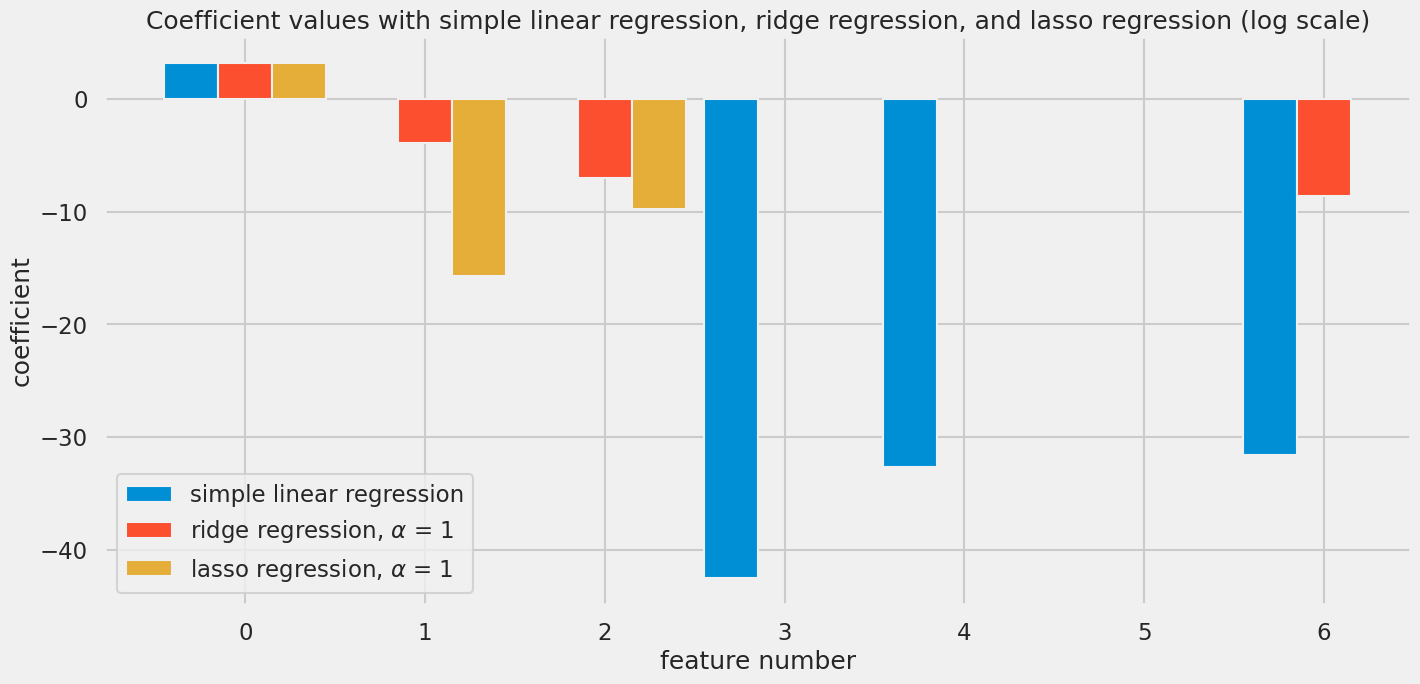

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.3

plt.figure(figsize = (15,7))

plt.bar(ind-width, width = width, height = np.log(lm_coefficients), label = "simple linear regression")
plt.bar(ind, width = width, height = np.log(ridge_coefficients), label = r"ridge regression, $\alpha$ = 1")
plt.bar(ind+width, width = width, height = np.log(lasso_coefficients), label = r"lasso regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.4285714285714286
columns included: Index(['kW total (kW)', 'kW demand (kW)', 'I ave (Amps)', 'kWh mean (kWh)'], dtype='object')


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
alphas = [.1,.2,.3,.4,.5,.75, 1, 2]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[2.74760400382233e-06,
 1.0990416014673612e-05,
 2.4728436032383808e-05,
 4.396166405510939e-05,
 6.869010008965496e-05,
 0.00015455272520171573,
 0.0002747604003543099,
 0.0010990416014622863]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 2.4593326047740975e-23
ridge regression minimum MSE: 3.771271949243368e-06
lasso regression minimum MSE: 2.74760400382233e-06


In [ ]:
def model_cv_mse(SKL_model, X, y, alphas, k = 5, random_state = 8):
    """
    This function calculates the MSE resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of
    X and y for different values of alpha.
    Inputs:
        SKL_model (sklearn model): the type of sklearn model with which to fit the data - options include Ridge, or Lasso
        X: the set of features used to fit the model
        y: the set of response variable observations
        alphas: a list of penalty parameters
        k: number of folds in k-fold cross-validation
        random_state: a random seed to use in KFold
    Returns:
        mses: a list containing the mean squared cross-validation error corresponding to each value of alpha
    """
    mses = np.full((k,len(alphas)),np.nan)

    kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

    fold = 0
    for train_i, val_i in kf.split(X):
        X_f_train = X[train_i]
        X_f_val = X[val_i]
        y_f_train = y.iloc[train_i]
        y_f_val = y.iloc[val_i]

        for i in range(len(alphas)):
            model = SKL_model(alpha = alphas[i])

            model.fit(X_f_train, y_f_train)

            y_pred = model.predict(X_f_val)

            mses[fold,i] = mean_squared_error(y_pred,y_f_val)

        fold += 1

    average_mses = np.mean(mses, axis = 0)

    return average_mses

In [ ]:
alphas_ridge = np.linspace(0.01,100, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Ridge: 3.772403539499438e-08


In [ ]:
alphas_lasso = np.linspace(0.01, .4, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 2.747603999409624e-08


####Redoing Linear, Ridge and Lasso Models with refined feature set

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_sd_r = pd.DataFrame(daily_df_sd)

# Use .loc for column selection
X = daily_df_sd_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_sd_r.loc[:, ['Consumption (kWh)']]

In [ ]:
scaled_df = daily_df_sd_r.iloc[:,1:8] # We'll standardize the WRF+DOMINO, Distance_to_coast_km, and Elevation_truncated_km features

scaler = StandardScaler() # Initialize the StandardScaler
scaler.fit(scaled_df) # Fit the standard scaler for each feature
print(scaler.mean_) # Print the mean value of each feature

master_stnd = scaler.transform(scaled_df) # Standardize each features
master_stnd

[1.44190446e+04 6.00793523e+02 6.00770372e+02 7.76821842e+02
 2.58740717e+07 2.76095778e+02 5.40489572e+01]


array([[ 0.09888754,  0.09888754,  0.09895813, ..., -1.75177696,
        -0.99528795, -1.05302407],
       [-0.26720857, -0.26720857, -0.24847858, ..., -1.75028234,
        -0.78079294, -0.90693394],
       [-0.01447575, -0.01447575, -0.02259859, ..., -1.74841659,
        -0.80535934, -1.08954661],
       ...,
       [ 0.28538319,  0.28538319,  0.28269086, ...,  1.72565186,
         1.37938475,  0.75687038],
       [ 0.2669508 ,  0.2669508 ,  0.27300215, ...,  1.72762017,
         1.24406136,  0.81774127],
       [ 0.26600067,  0.26600067,  0.26635303, ...,  1.72957505,
         1.2761226 ,  0.81774127]])

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_sd4 = pd.DataFrame(daily_df_sd_r)

# Use .loc for column selection
X = daily_df_sd_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_sd_r.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_sd_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_sd_r.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 0.07638191550812397
train RMSE: 14467.96872272654
R^2 test: 0.9941695240724246
R^2 train: 0.9945675089253389


array([[ 1.04199325, -0.05537015, -0.1876546 , -0.03106364,  0.09626403]])

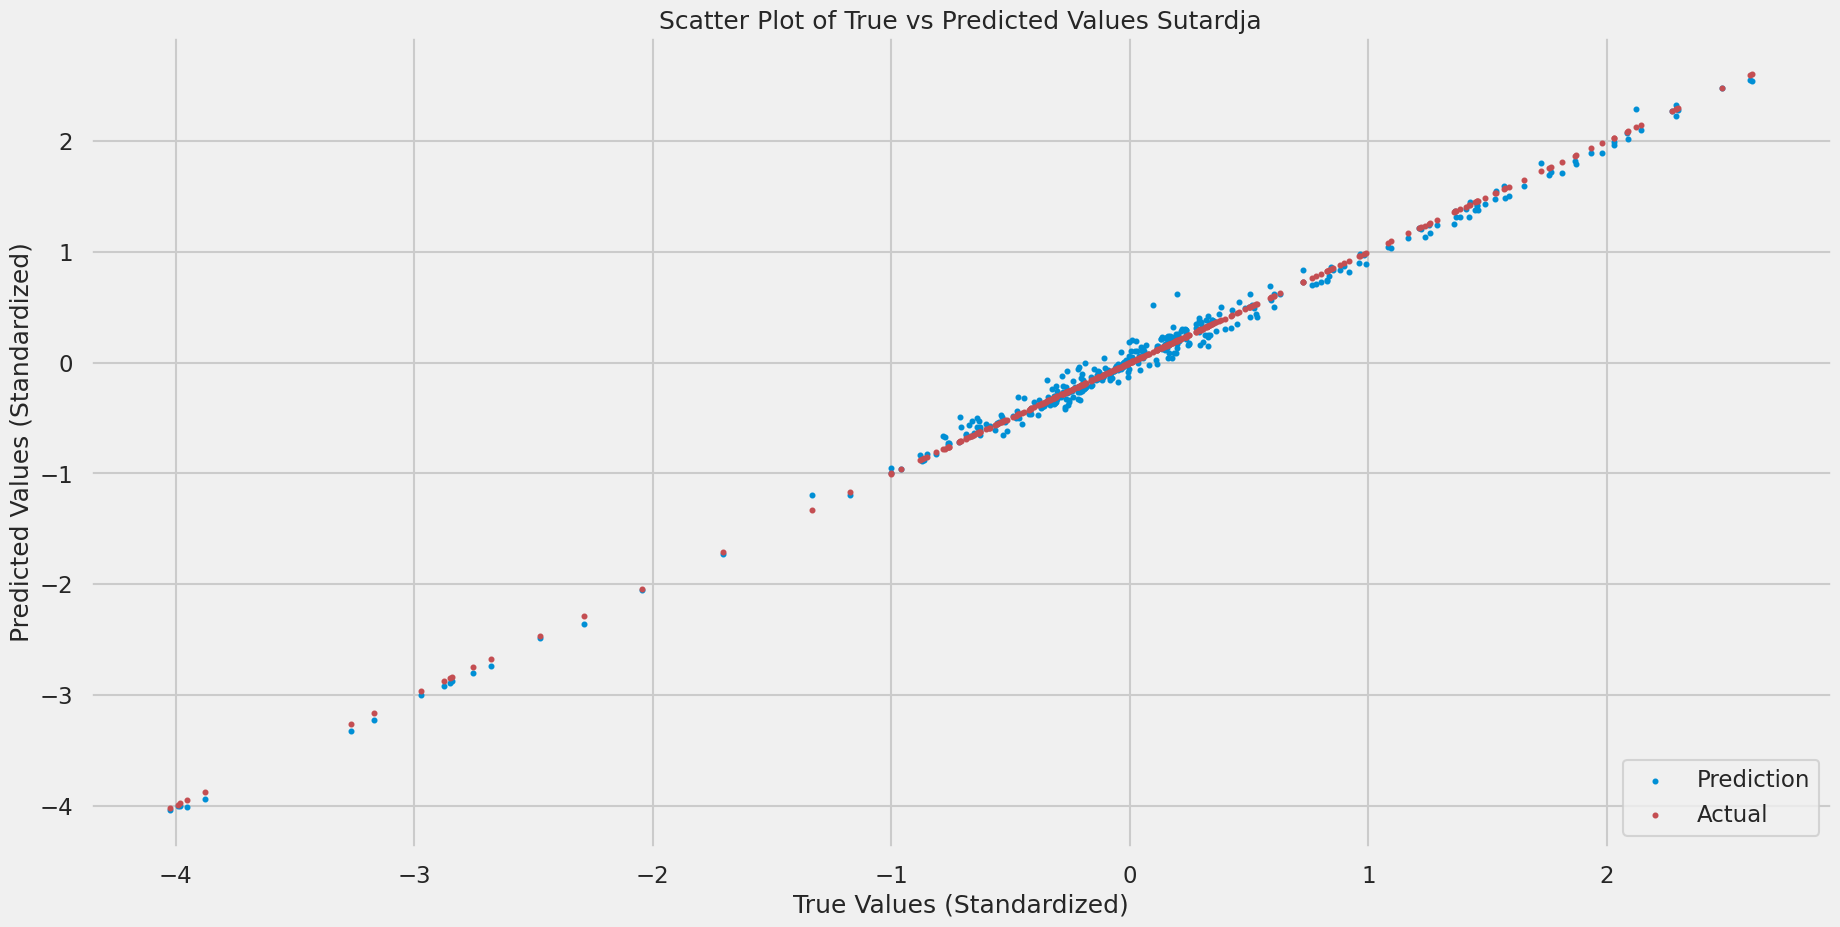

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=8)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=8, color = "r")

plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Sutardja')
plt.legend(['Prediction', 'Actual'], loc=4);


In [ ]:
#LR Model
MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)
MLR_coefs = MLR_fit.coef_
MLR_coefs

array([[ 2.20367987e+01, -9.65914386e-06, -9.86847311e+00,
        -1.65844380e+00,  6.22693810e+00]])

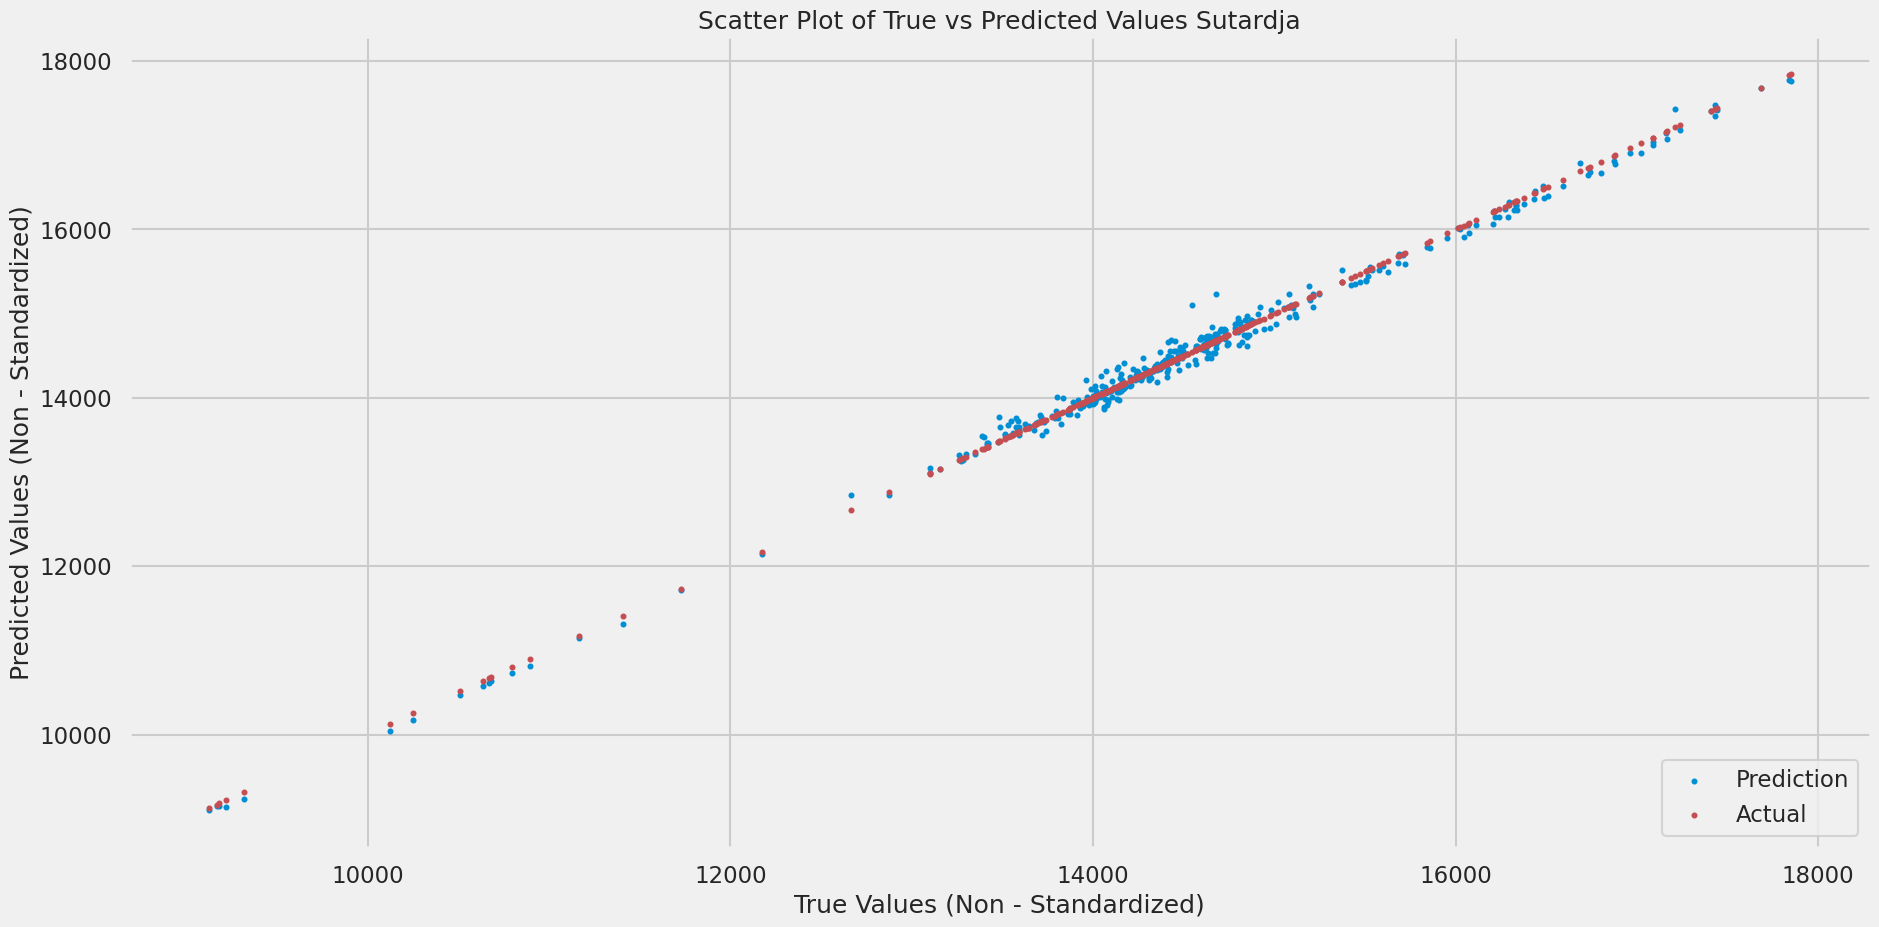

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=8)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=8, color="r")

plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Sutardja')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[[ 2.20367911e+01 -9.65914464e-06 -9.86845608e+00 -1.65825982e+00
   6.22671079e+00]]


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1457, 5) (1457, 1) (365, 5) (365, 1)


In [ ]:
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)

[[ 2.20367987e+01 -9.65914386e-06 -9.86847311e+00 -1.65844380e+00
   6.22693810e+00]]


[10098.141112992938, 10098.911326489793, 10107.197419755743, 10255.28242231234, 12931.536321533273]


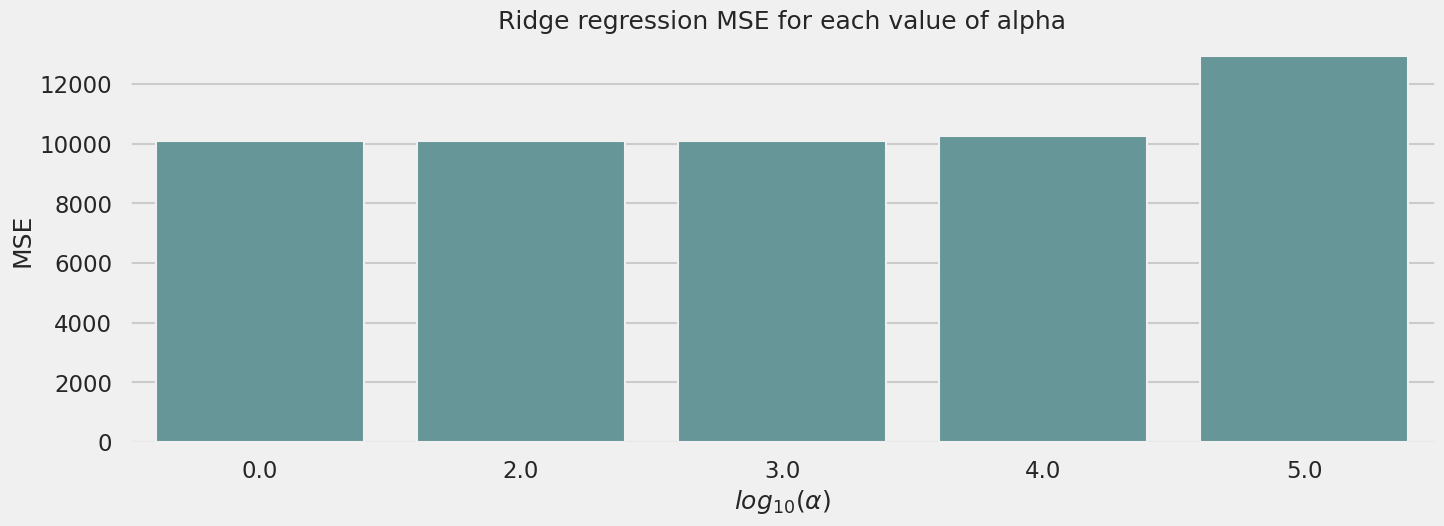

In [ ]:
alphas = [1, 1e2, 1e3, 1e4, 1e5]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

a_log = np.log10(alphas)
plt.figure(figsize=(15, 5))
sns.barplot(x=a_log, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()

In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 10098.141112992938 ; alpha: 1


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 2.20357849e+01 -9.65994213e-06 -9.86618056e+00 -1.59421878e+00
  6.14926063e+00]


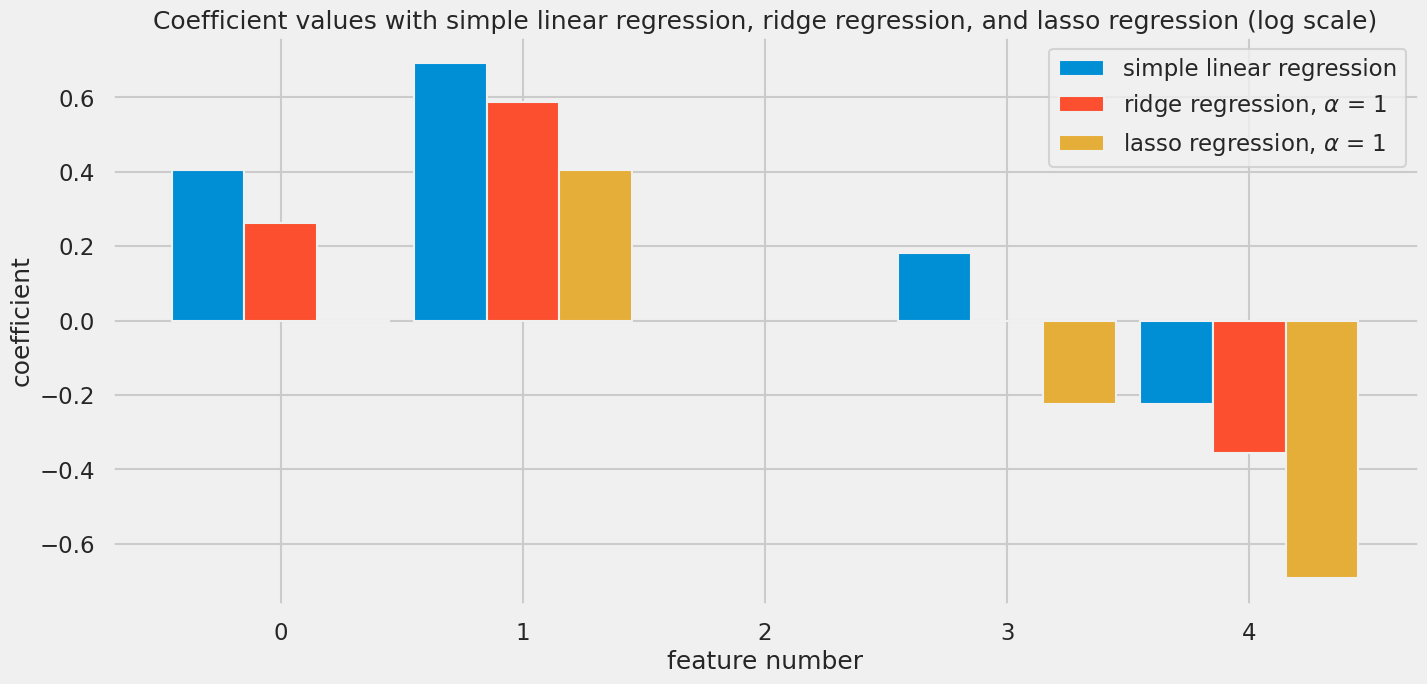

In [ ]:
# With lm_coefficients, ridge_coefficients, and lasso_coefficients defined
lm_coefficients = [1.5, 2.0, -0.5, 1.2, 0.8]
ridge_coefficients = [1.3, 1.8, -0.4, 1.0, 0.7]
lasso_coefficients = [1.0, 1.5, -0.3, 0.8, 0.5]

# Make sure all coefficient arrays have the same length
min_length = min(len(lm_coefficients), len(ridge_coefficients), len(lasso_coefficients))

ind = np.arange(min_length)
width = 0.3

plt.figure(figsize=(15, 7))

plt.bar(ind - width, width=width, height=np.log(lm_coefficients[:min_length]), label="simple linear regression")
plt.bar(ind, width=width, height=np.log(ridge_coefficients[:min_length]), label=r"ridge regression, $\alpha$ = 1")
plt.bar(ind + width, width=width, height=np.log(lasso_coefficients[:min_length]), label=r"lasso regression, $\alpha$ = 1")

plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.0
columns included: [['I ave (Amps)' 'kWh mean (kWh)' 'kVAR total (kVAR)'
  'Daily Max Temperature' 'Daily Min Temperature']]


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
alphas = [1, 1e2, 1e3, 1e4, 1e5]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[10099.968889155252,
 10361.326058375611,
 16303.053814008843,
 98224.69106816658,
 1698425.485912536]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 10098.133502135144
ridge regression minimum MSE: 10098.141112992938
lasso regression minimum MSE: 10099.968889155252


In [ ]:
alphas_ridge = np.linspace(0.01,100, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Ridge: 10098.13356459913


In [ ]:
test_mse = 10098.133564599151
rmse_r = np.sqrt(test_mse)

print("Test RMSE:", rmse_r)

Test RMSE: 100.48946991898778


In [ ]:
alphas_lasso = np.linspace(0.01, .4, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 10098.15011992813


In [ ]:
test_mse = 10098.150119928161
rmse_l = np.sqrt(test_mse)

print("Test RMSE:", rmse_l)

Test RMSE: 100.4895522924058


###Linear, Ridge and Lasso Model Gilman

In [ ]:
daily_df_g.describe()

Consumption (kWh)  kW total (kW)  kW demand (kW)  I ave (Amps)  \
count        1827.000000    1827.000000     1827.000000   1827.000000   
mean          821.161435      34.215060       34.204275     74.096820   
std           159.806326       6.658597        6.623523     10.890368   
min           236.000000       9.833333       10.000000     20.887500   
25%           742.625000      30.942708       30.906787     71.978646   
50%           848.750000      35.364583       35.312500     76.172917   
75%           933.625000      38.901042       38.854167     80.173438   
max          1427.500000      59.479167       58.729167    111.848958   

       kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
count    1.827000e+03        1827.000000            1827.000000   
mean     2.279614e+06          52.006180              53.969458   
std      4.244239e+05           7.370623              24.662188   
min      1.507785e+06          14.000000              10.200000   
25%      1.917574e+06          49.953125              24.100000   
50%      2.298132e+06          53.031250              63.200000   
75%      2.627238e+06          56.251316              73.300000   
max      3.026709e+06          74.187500             104.000000   

       Daily Min Temperature        Month  
count            1827.000000  1827.000000  
mean               38.978599     6.523810  
std                20.358160     3.448551  
min                 0.400000     1.000000  
25%                14.000000     4.000000  
50%                47.200000     7.000000  
75%                55.800000    10.000000  
max                73.500000    12.000000

In [ ]:
scaled_df = daily_df_g.iloc[:,1:8] # We'll standardize the WRF+DOMINO, Distance_to_coast_km, and Elevation_truncated_km features

scaler = StandardScaler() # Initialize the StandardScaler
scaler.fit(scaled_df) # Fit the standard scaler for each feature
print(scaler.mean_) # Print the mean value of each feature

master_stnd = scaler.transform(scaled_df) # Standardize each features
master_stnd

[8.21161435e+02 3.42150598e+01 3.42042754e+01 7.40968203e+01
 2.27961389e+06 5.20061802e+01 5.39694581e+01]


array([[ 1.37603285,  1.37603285,  1.39627435, ..., -1.81903151,
        -0.37743641, -1.07357487],
       [ 0.97023334,  0.97023334,  1.01833099, ..., -1.81738634,
        -0.55653906, -1.22769909],
       [ 0.81426177,  0.81426177,  0.75727784, ..., -1.81508064,
        -0.51258183, -1.23175499],
       ...,
       [ 0.76888193,  0.76888193,  0.83436013, ...,  1.75664008,
         1.64041474,  0.75969213],
       [ 0.88467876,  0.88467876,  0.87368784, ...,  1.75892478,
         1.58952316,  0.82053064],
       [ 0.73989155,  0.73989155,  0.79842703, ...,  1.76073885,
         1.58959756,  0.82053064]])

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_g = pd.DataFrame(daily_df_g)

# Use .loc for column selection
X = daily_df_g.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_g.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_g.loc[:, 'kW total (kW)':'Daily Min Temperature']
y = daily_df_g.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 7.323436446825302e-16
train RMSE: 837.0387067466714
R^2 test: 1.0
R^2 train: 1.0


array([[ 1.00000000e+00, -5.19544495e-16,  5.90084208e-17,
        -8.86648311e-17,  1.54629530e-16,  1.73785948e-17,
        -1.85032745e-17]])

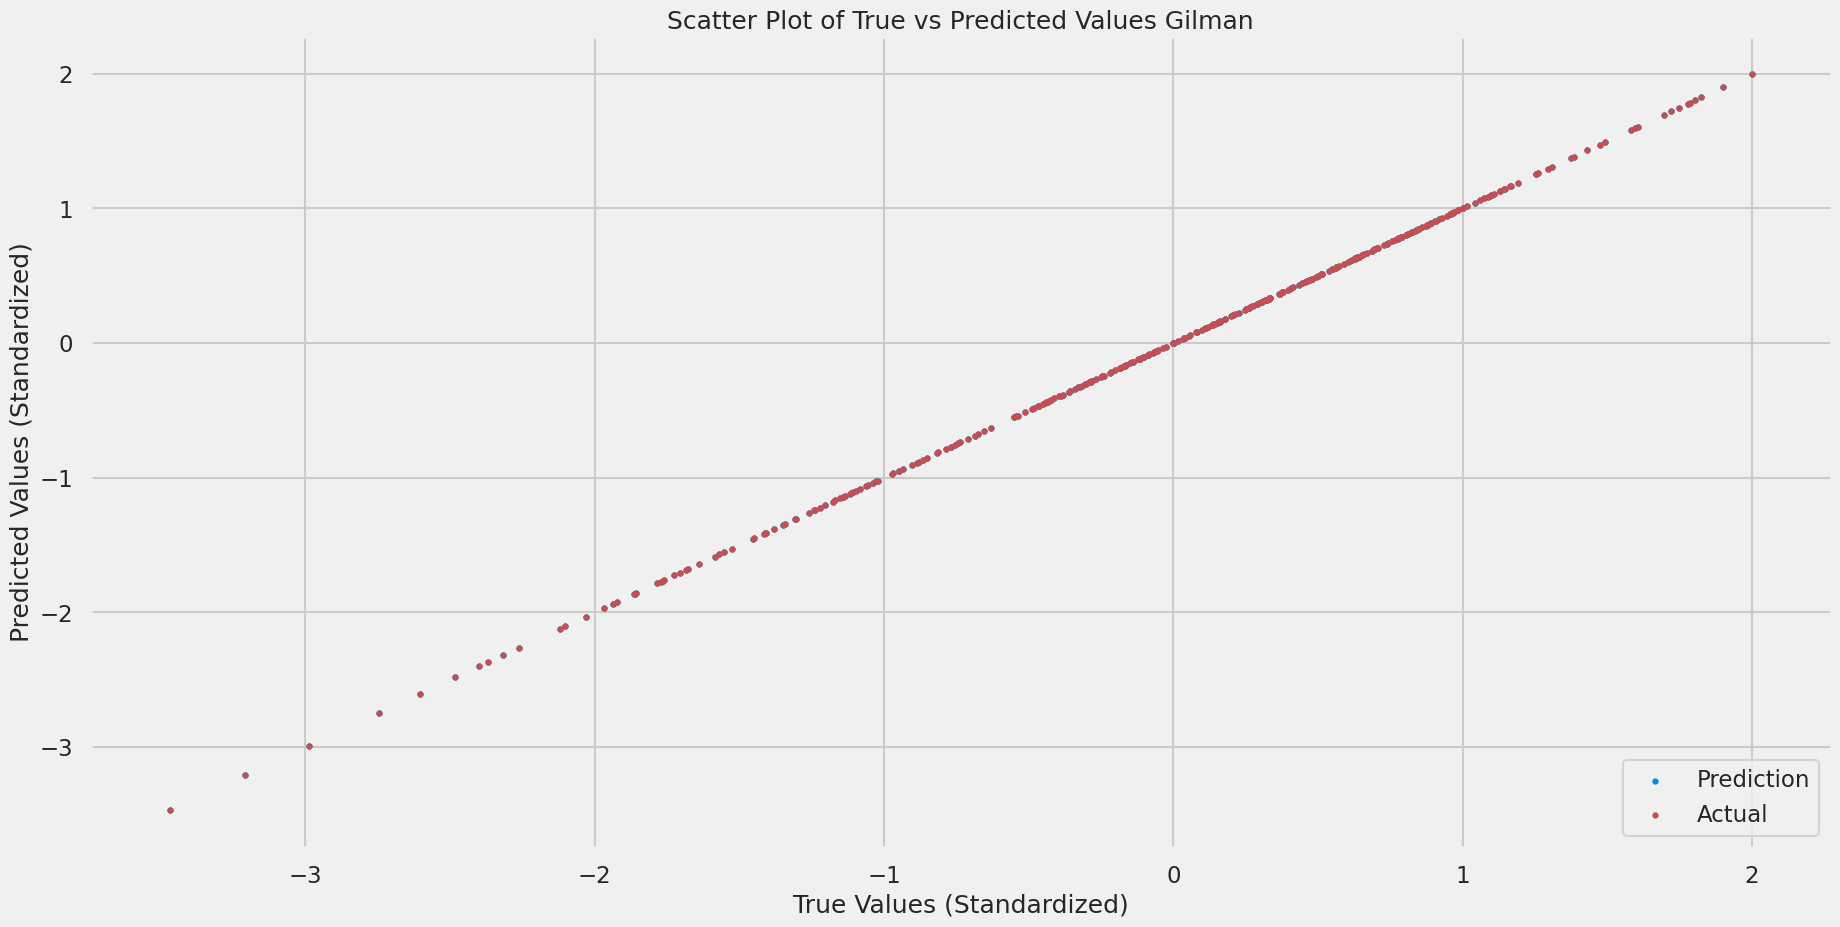

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=9)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=9, color = "r")

plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Gilman')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
#LR Model

MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)
print("test RMSE:", mean_squared_error(y_test, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test, y_pred_test))
print("R^2 train:", r2_score(y_train, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 3.443963051394458e-13
train RMSE: 3.510597955602377e-13
R^2 test: 1.0
R^2 train: 1.0


array([[ 2.40000000e+01,  4.03214141e-15,  4.31922611e-15,
         6.00615720e-19,  4.64601679e-15, -2.50973699e-15,
         3.24694090e-15]])

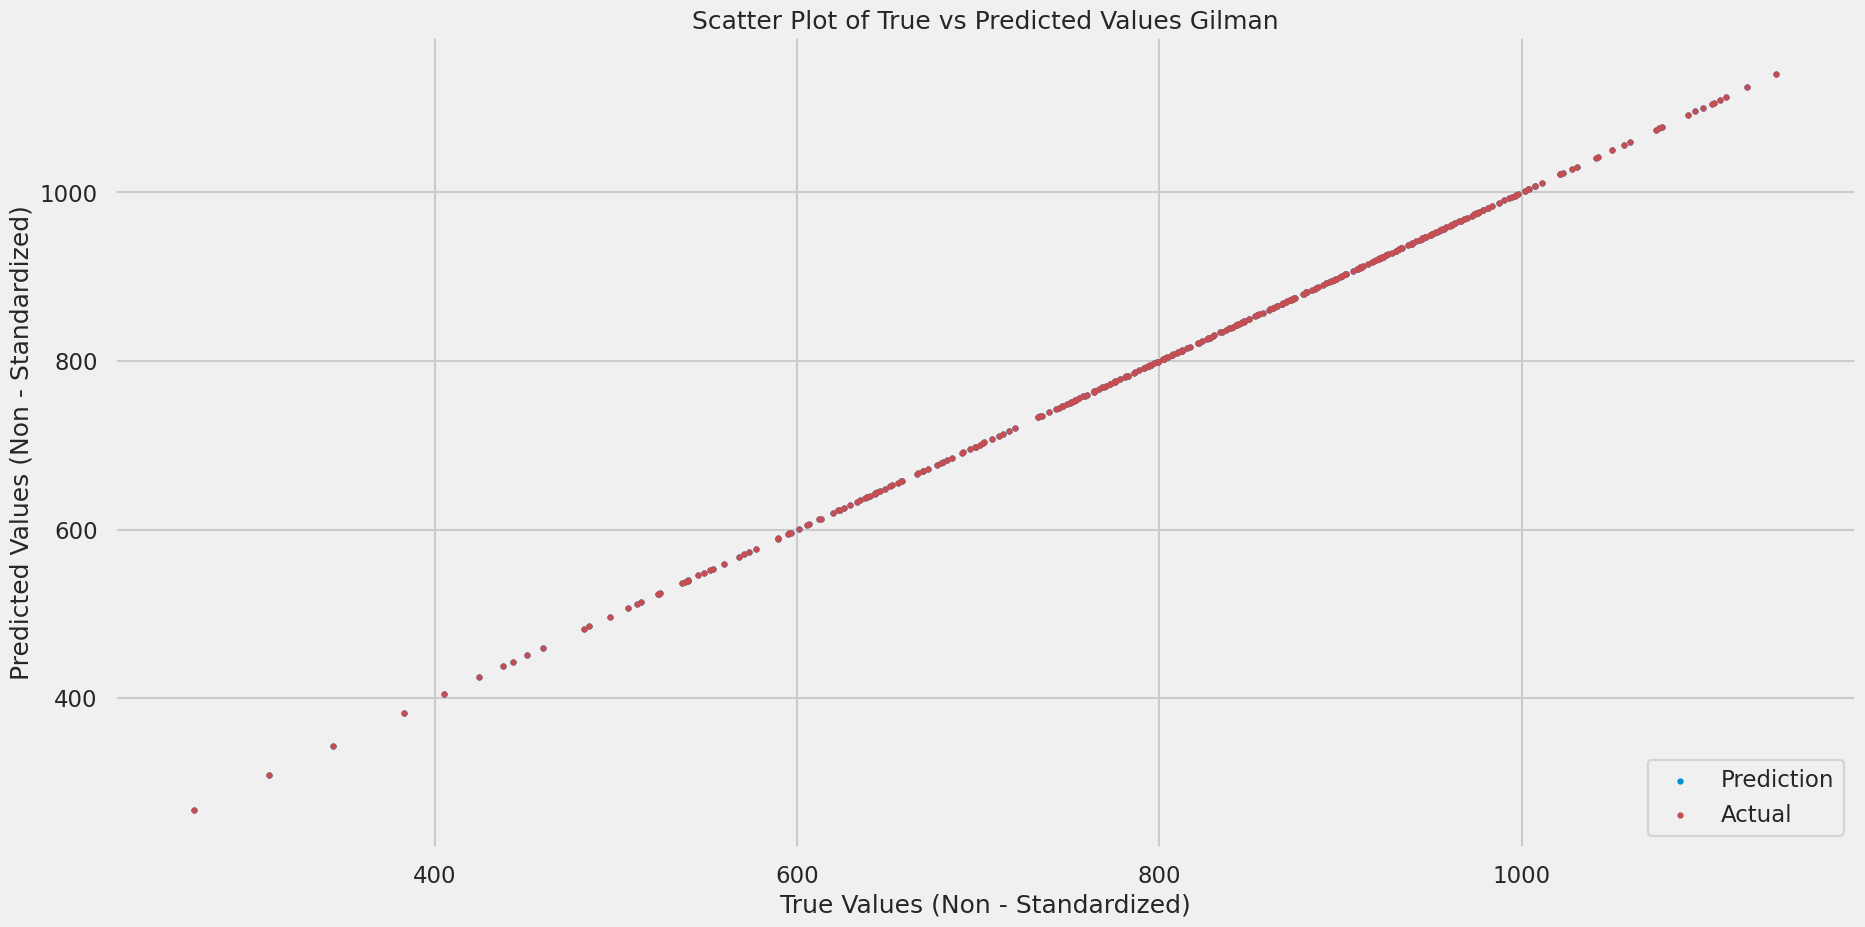

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=9)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=9, color="r")

plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Gilman')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reshape the target variables
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1461, 7) (1461, 1) (366, 7) (366, 1)
(1461, 7) (1461,) (366, 7) (366,)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)

[ 2.40000000e+01  4.03214141e-15  4.31922611e-15  6.00615720e-19
  4.64601679e-15 -2.50973699e-15  3.24694090e-15]


In [ ]:
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[ 2.38789211e+01  8.10305594e-02  5.35675561e-02 -7.30171990e-08
 -4.70217014e-02  1.77496020e-04  6.49909875e-04]


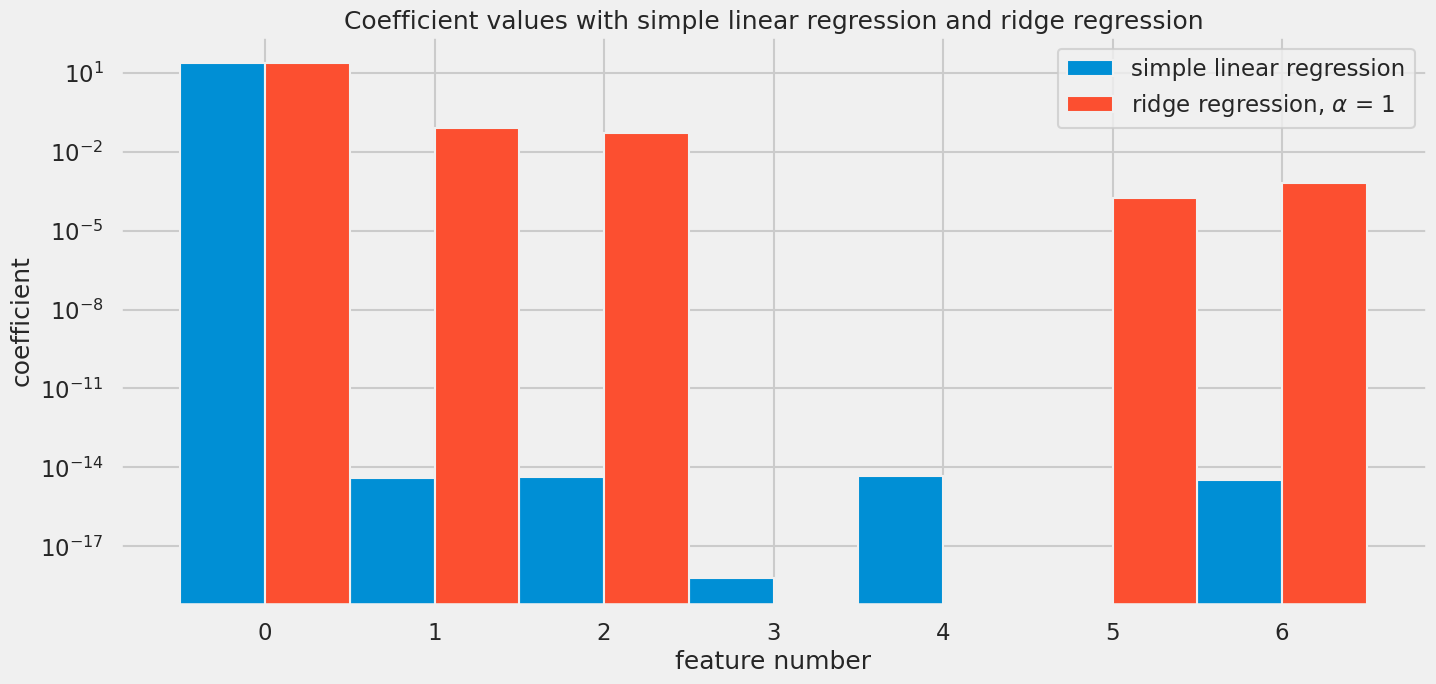

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.5

plt.figure(figsize=(15, 7))

plt.bar(ind - (width / 2), width=width, height=lm_coefficients, label="simple linear regression")
plt.bar(ind + (width / 2), width=width, height=ridge_coefficients, label=r"ridge regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression and ridge regression")
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.show()

[1.8944809750838028e-07, 1.8913356119339262e-05, 7.551400198437653e-05, 0.0001695936819806914, 0.0003009453053761143, 0.0004693629392498675]


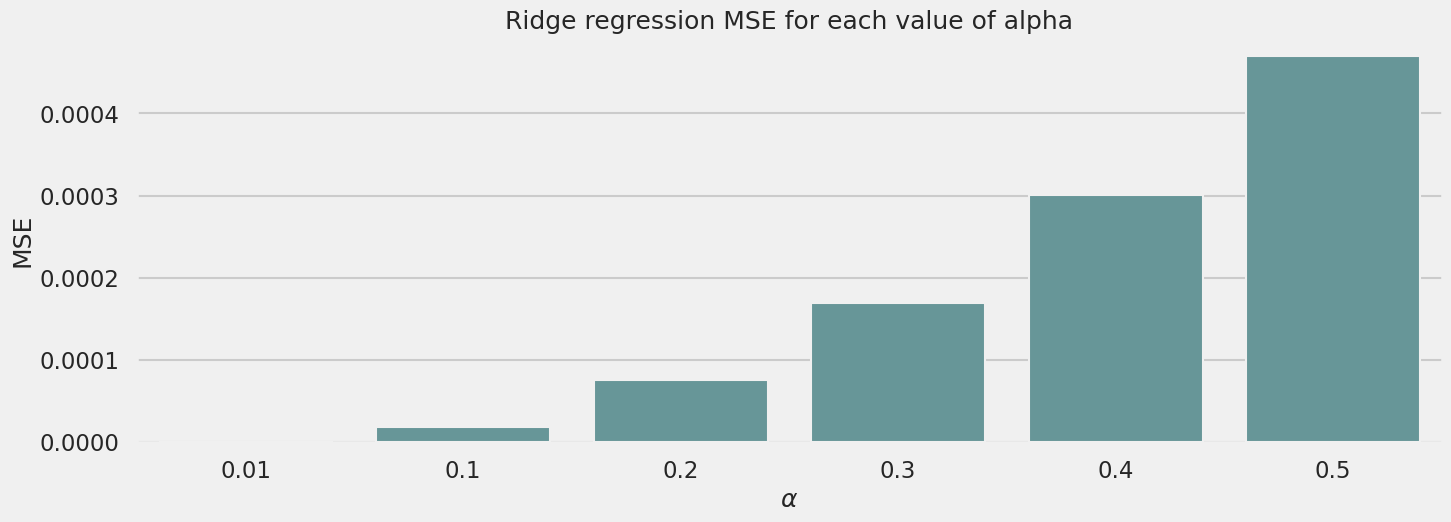

In [ ]:
alphas = [1e-2, 1e-1, .2, .3, .4, .5,]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

plt.figure(figsize=(15, 5))
sns.barplot(x=alphas, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()


In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 1.8944809750838028e-07 ; alpha: 0.01


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 2.39049481e+01  0.00000000e+00  4.73809912e-02 -4.13325784e-07
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


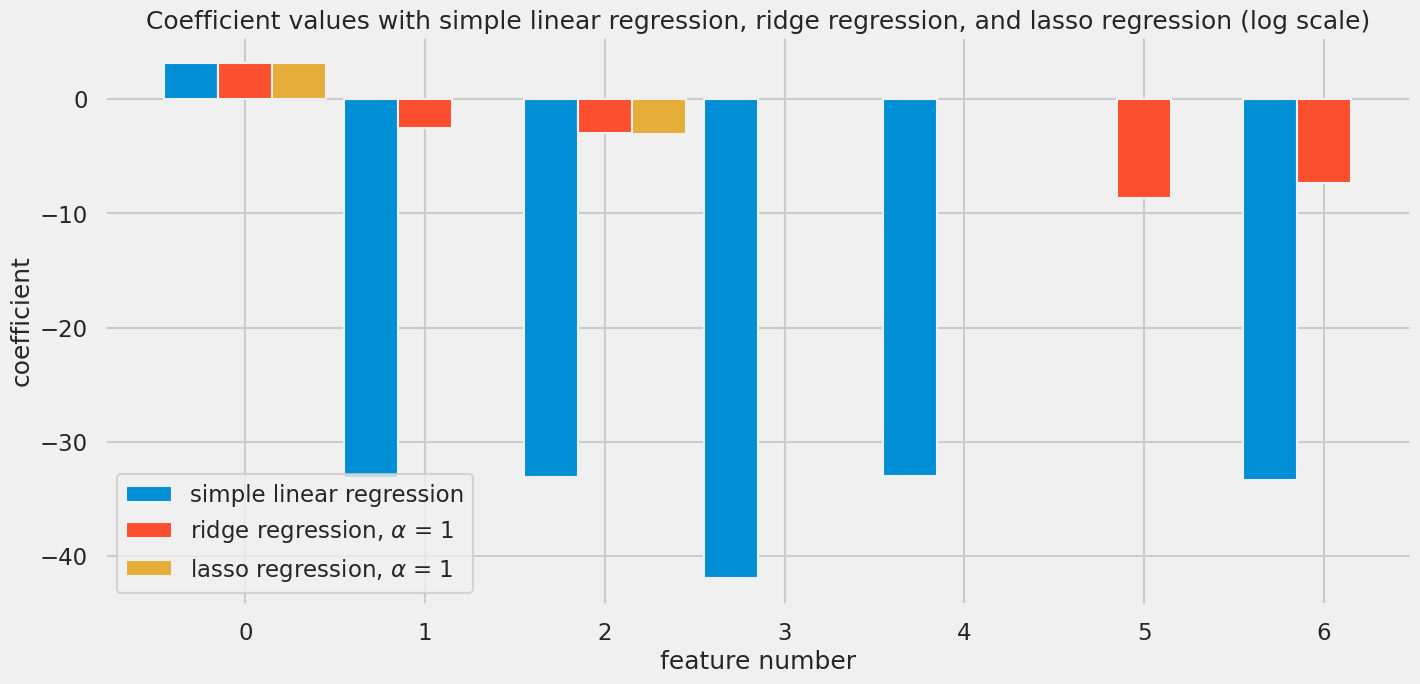

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.3

plt.figure(figsize = (15,7))

plt.bar(ind-width, width = width, height = np.log(lm_coefficients), label = "simple linear regression")
plt.bar(ind, width = width, height = np.log(ridge_coefficients), label = r"ridge regression, $\alpha$ = 1")
plt.bar(ind+width, width = width, height = np.log(lasso_coefficients), label = r"lasso regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.5714285714285714
columns included: Index(['kW total (kW)', 'I ave (Amps)', 'kWh mean (kWh)'], dtype='object')


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
alphas = [1e-2, 1e-1, .2, .3, .4, .5,]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[1.0779073149451415e-06,
 0.00010779073149388196,
 0.0004311629259757551,
 0.0009701165834454448,
 0.0024064739922564525,
 0.005010856339074229]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 1.1860881499370227e-25
ridge regression minimum MSE: 1.8944809750838028e-07
lasso regression minimum MSE: 1.0779073149451415e-06


In [ ]:
def model_cv_mse(SKL_model, X, y, alphas, k = 5, random_state = 8):
    """
    This function calculates the MSE resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of
    X and y for different values of alpha.
    Inputs:
        SKL_model (sklearn model): the type of sklearn model with which to fit the data - options include Ridge, or Lasso
        X: the set of features used to fit the model
        y: the set of response variable observations
        alphas: a list of penalty parameters
        k: number of folds in k-fold cross-validation
        random_state: a random seed to use in KFold
    Returns:
        mses: a list containing the mean squared cross-validation error corresponding to each value of alpha
    """
    mses = np.full((k,len(alphas)),np.nan)

    kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

    fold = 0
    for train_i, val_i in kf.split(X):
        X_f_train = X[train_i]
        X_f_val = X[val_i]
        y_f_train = y.iloc[train_i]
        y_f_val = y.iloc[val_i]

        for i in range(len(alphas)):
            model = SKL_model(alpha = alphas[i])

            model.fit(X_f_train, y_f_train)

            y_pred = model.predict(X_f_val)

            mses[fold,i] = mean_squared_error(y_pred,y_f_val)

        fold += 1

    average_mses = np.mean(mses, axis = 0)

    return average_mses

In [ ]:
alphas_ridge = np.linspace(0.01,100, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Ridge: 1.8944809750838028e-07


In [ ]:
alphas_lasso = np.linspace(0.01, .4, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 1.0779073149451415e-06


####Redoing the Linear, Ridge and LASSO Models with refind feature set

In [ ]:
#Convert numbpy array to a DataFrame
daily_df_g_r = pd.DataFrame(daily_df_g)

# Use .loc for column selection
X = daily_df_g_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_g_r.loc[:, ['Consumption (kWh)']]

In [ ]:
X = daily_df_g_r.loc[:, 'I ave (Amps)':'Daily Min Temperature']
y = daily_df_g_r.loc[:, ['Consumption (kWh)']]
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

scaler = StandardScaler()
scaler.fit(X)
X_stnd = scaler.transform(X)
X_train_stnd = scaler.transform(X_train)
X_test_stnd = scaler.transform(X_test)

scaler.fit(y)
y_stnd = scaler.transform(y)
y_train_stnd = scaler.transform(y_train)
y_test_stnd = scaler.transform(y_test)


MLR_model = linear_model.LinearRegression()
MLR_fit = MLR_model.fit(X_train_stnd, y_train_stnd)
y_pred_test = MLR_fit.predict(X_test_stnd)
y_pred_train = MLR_fit.predict(X_train_stnd)
print("test RMSE:", mean_squared_error(y_test_stnd, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test_stnd, y_pred_test))
print("R^2 train:", r2_score(y_train_stnd, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 0.10029058133064181
train RMSE: 837.0405490525442
R^2 test: 0.9893528574934799
R^2 train: 0.9904492801374168


array([[ 2.15173386, -0.11717462, -1.27427267,  0.00991583,  0.05474165]])

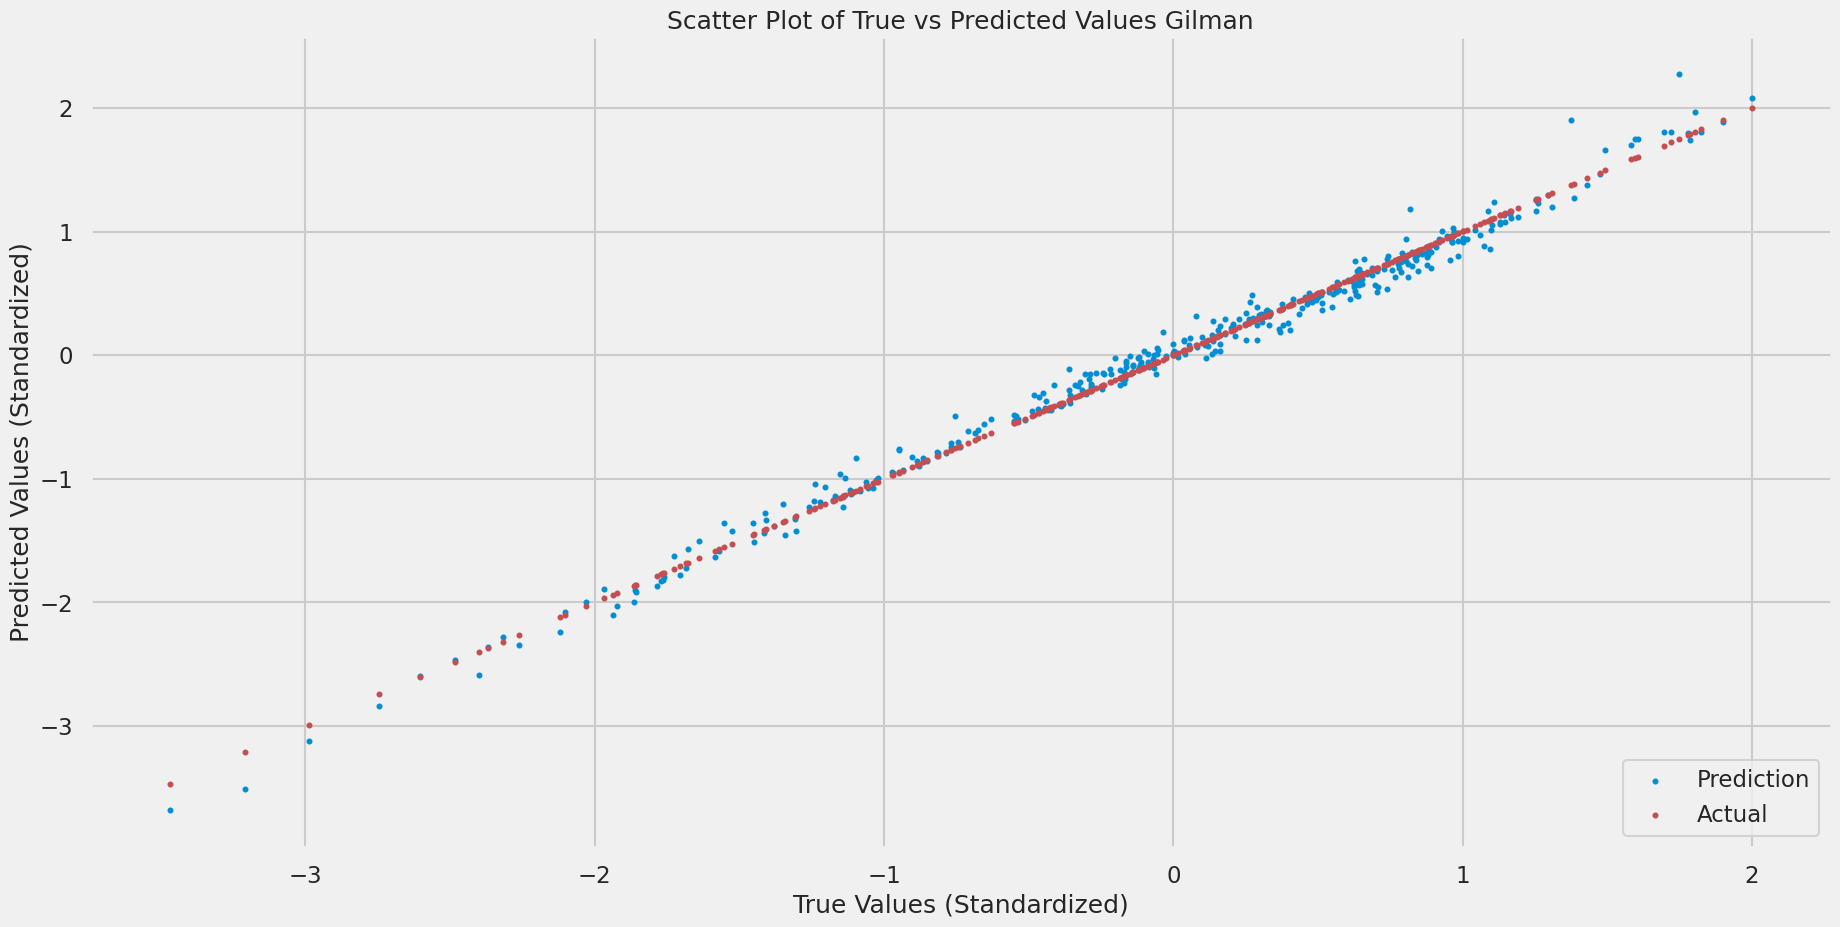

In [ ]:
#scatter train predictions on train truth - standardized
plt.scatter(y_test_stnd, y_pred_test, s=8)
#scatter train truth on train truth to make lijne y=x - standardized
plt.scatter(y_test_stnd, y_test_stnd, s=8, color = "r")

plt.xlabel('True Values (Standardized)')
plt.ylabel('Predicted Values (Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Gilman')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
#LR Model

MLR_model = LinearRegression()
MLR_fit = MLR_model.fit(X_train, y_train)
y_pred_test = MLR_fit.predict(X_test)
y_pred_train = MLR_fit.predict(X_train)
print("test RMSE:", mean_squared_error(y_test, y_pred_test, squared = False))
print("train RMSE:", mean_squared_error(y_train, y_pred_train, squared = False))
print("R^2 test:", r2_score(y_test, y_pred_test))
print("R^2 train:", r2_score(y_train, y_pred_train))
MLR_coefs = MLR_fit.coef_
MLR_coefs

test RMSE: 16.022682588055062
train RMSE: 15.720707142383201
R^2 test: 0.9893528574934799
R^2 train: 0.9904492801374168


array([[ 3.15747521e+01, -4.41192006e-05, -2.76281698e+01,
         6.42526950e-02,  4.29707855e-01]])

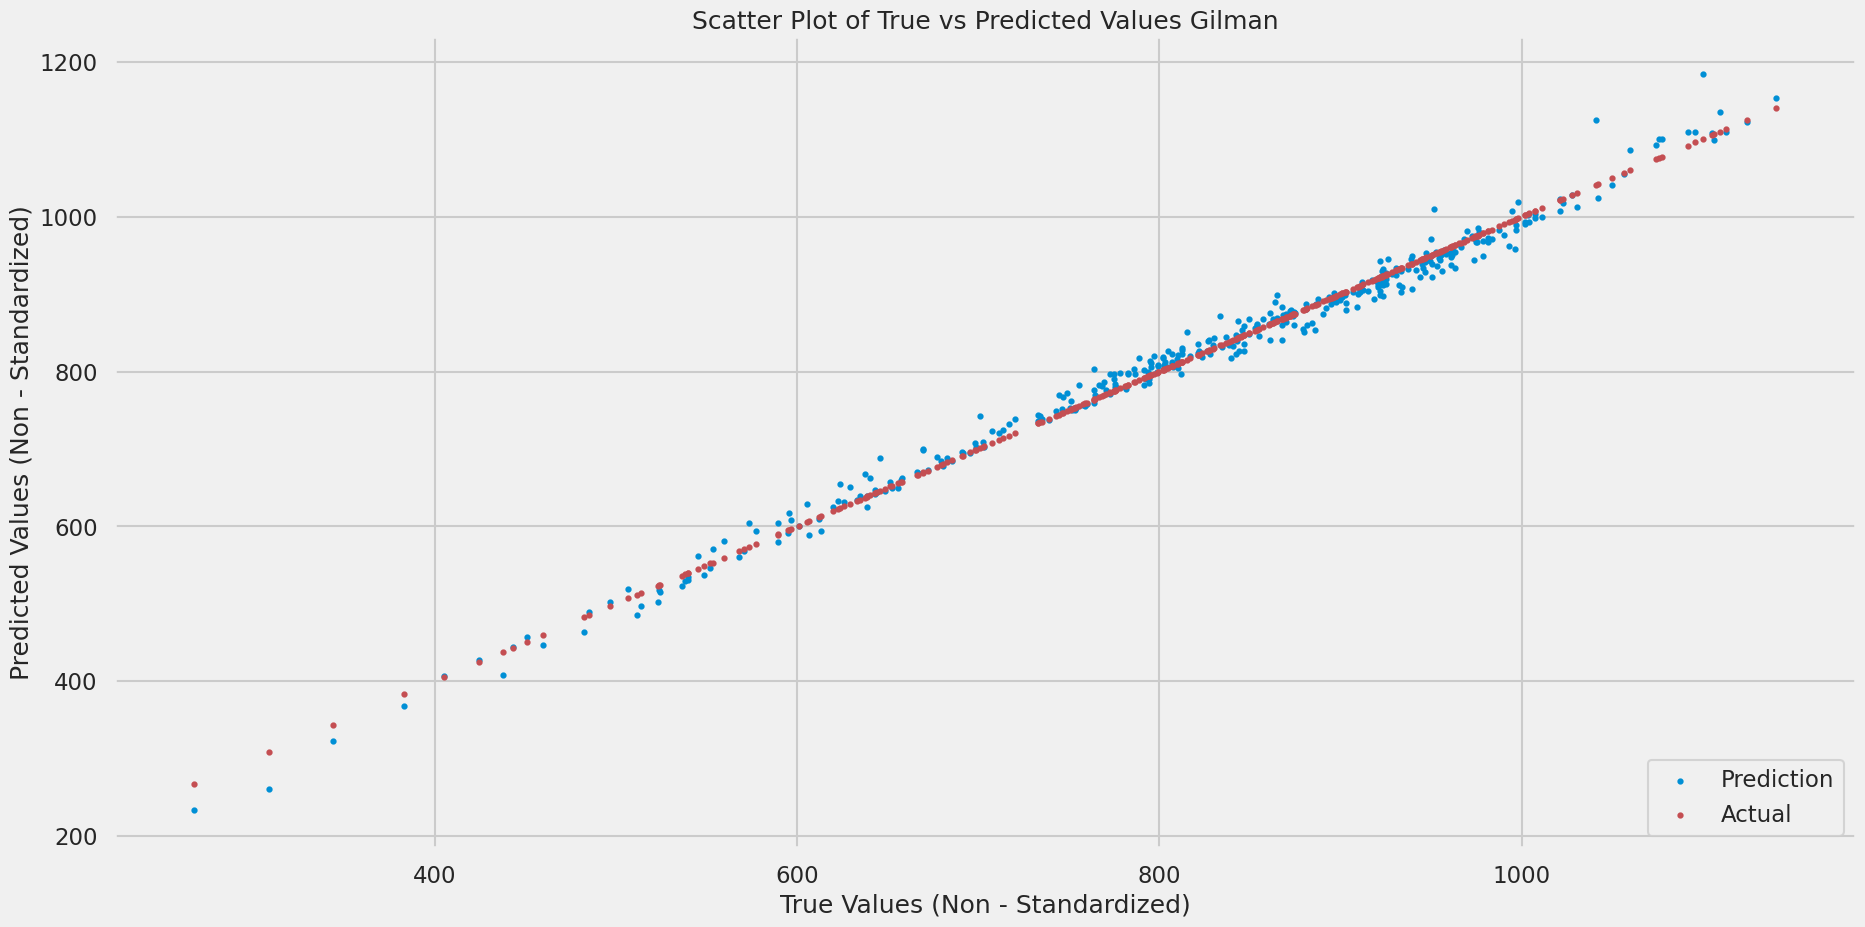

In [ ]:
# Scatter test predictions on test truth - non standardized
plt.scatter(y_test, y_pred_test, s=9)
# Scatter test truth on test truth to make line y=x - non standardized
plt.scatter(y_test, y_test, s=9, color="r")

plt.xlabel('True Values (Non - Standardized)')
plt.ylabel('Predicted Values (Non - Standardized)')
plt.title('Scatter Plot of True vs Predicted Values Gilman')
plt.legend(['Prediction', 'Actual'], loc=4);

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Reshape the target variables
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1461, 5) (1461, 1) (366, 5) (366, 1)
(1461, 5) (1461,) (366, 5) (366,)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_coefficients = lm.coef_

print(lm_coefficients)


[ 3.15747521e+01 -4.41192006e-05 -2.76281698e+01  6.42526950e-02
  4.29707855e-01]


In [ ]:
ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[ 3.15641567e+01 -4.41527604e-05 -2.76117935e+01  6.52365742e-02
  4.28049381e-01]


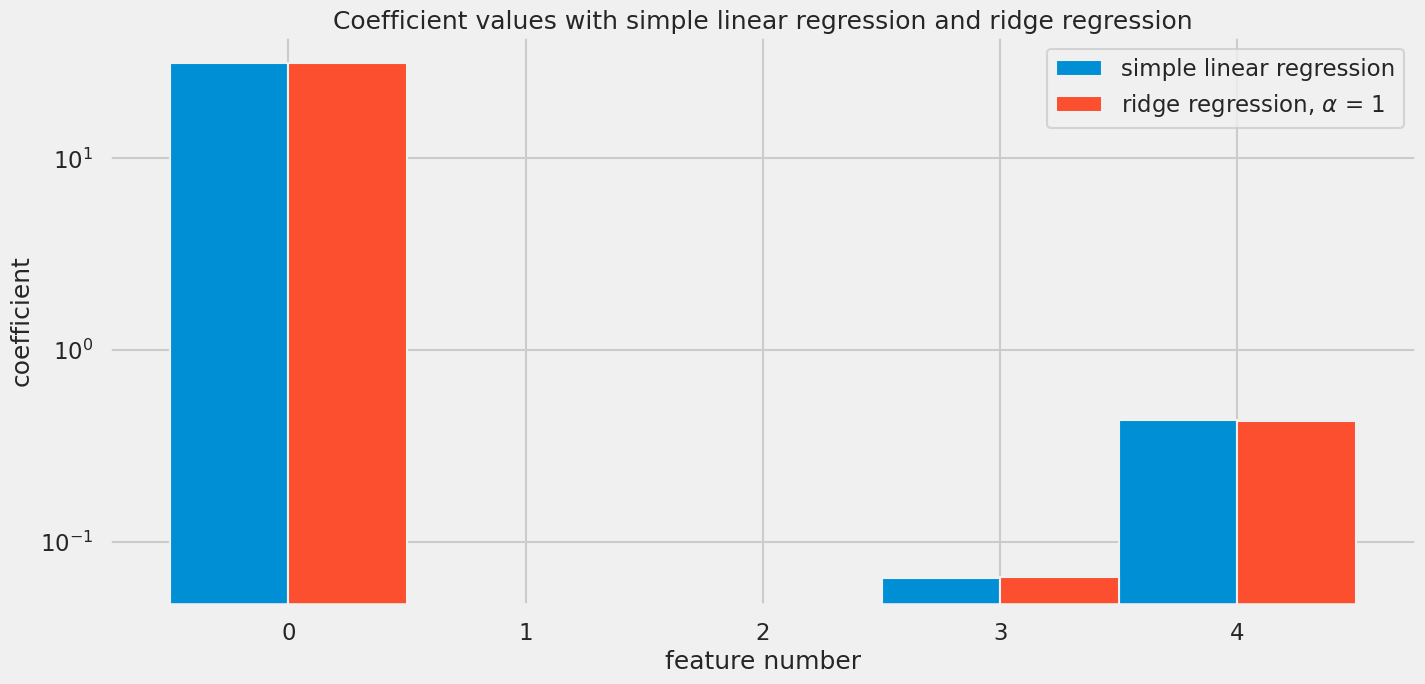

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.5

plt.figure(figsize=(15, 7))

plt.bar(ind - (width / 2), width=width, height=lm_coefficients, label="simple linear regression")
plt.bar(ind + (width / 2), width=width, height=ridge_coefficients, label=r"ridge regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression and ridge regression")
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.show()

[256.72602474878676, 256.7230366872055, 256.6936562705722, 258.5149053518497, 480.2876026900958, 1790.0208940367788, 4152.549128062928]


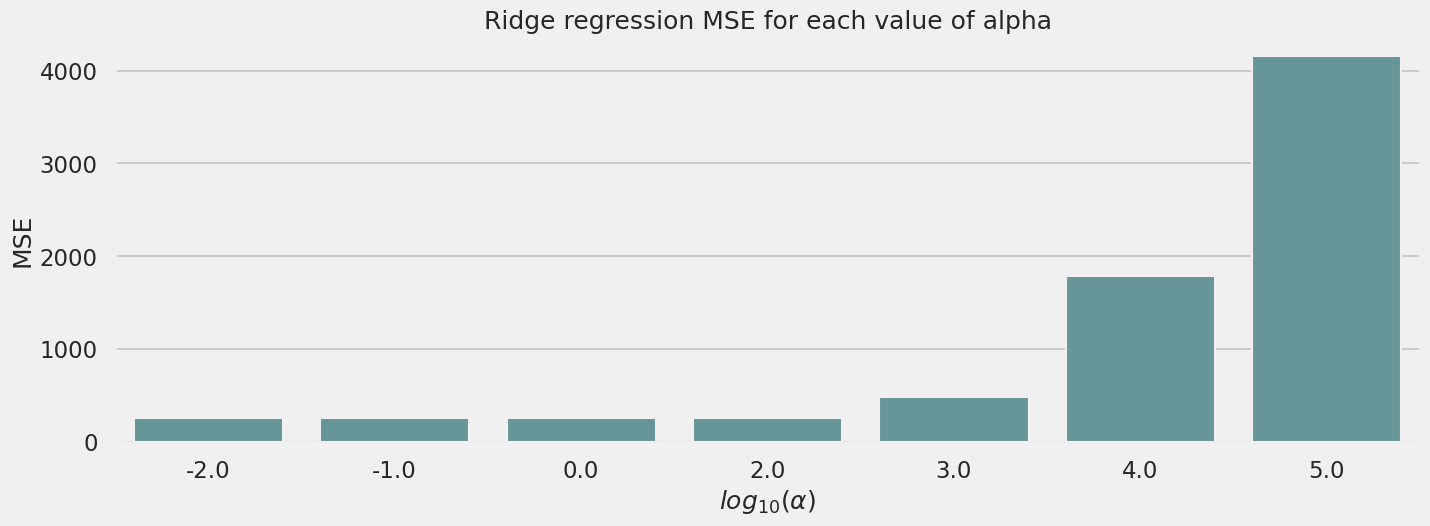

In [ ]:
alphas = [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
mses = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_pred, y_test))

print(mses)

a_log = np.log10(alphas)
plt.figure(figsize=(15, 5))
sns.barplot(x=a_log, y=mses, color='cadetblue')  # Use x= and y= as keyword arguments
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel('MSE')
plt.title('Ridge regression MSE for each value of alpha')
plt.show()

In [ ]:
print("lowest MSE:", np.min(mses), "; alpha:", alphas[np.argmin(mses)]) #"; lambda:", 1/alphas[np.argmin(mses)])

lowest MSE: 256.6936562705722 ; alpha: 1


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[ 3.10315751e+01 -4.56549864e-05 -2.67875036e+01  1.18243705e-01
  3.35142232e-01]


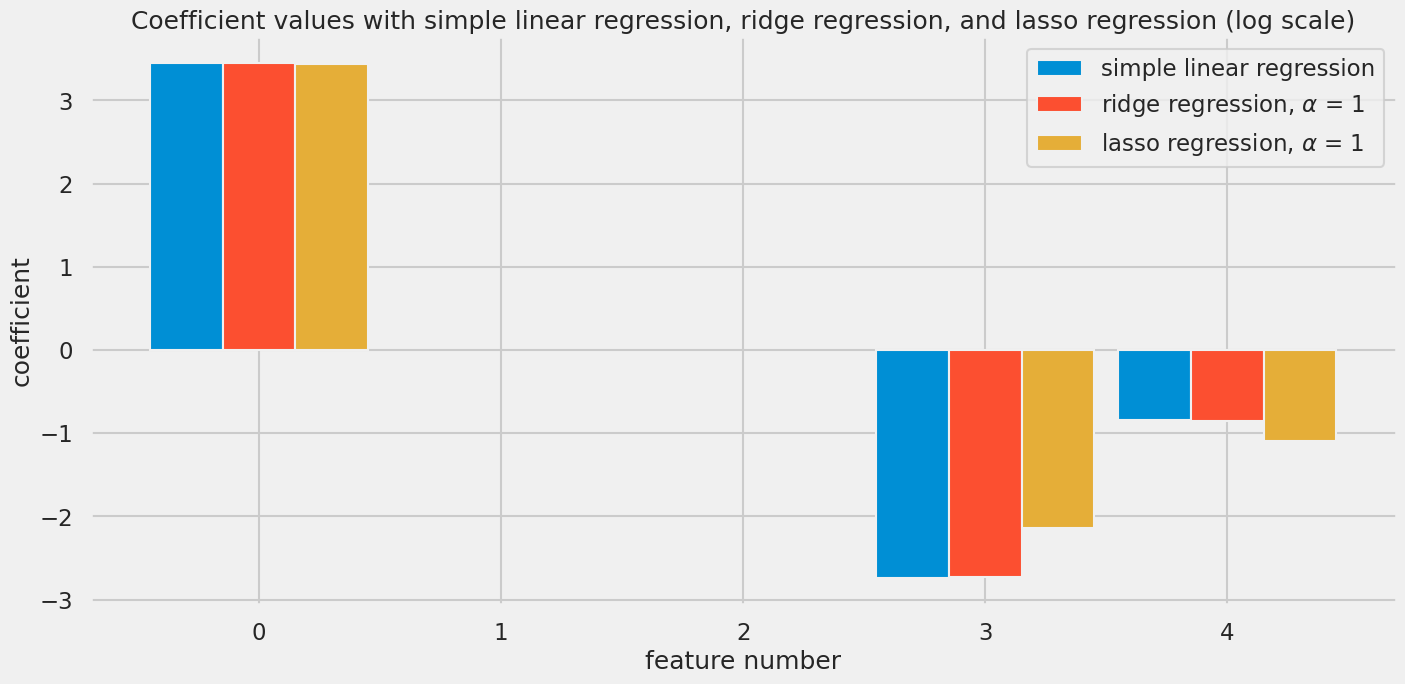

In [ ]:
ind = np.arange(len(lm_coefficients))
width = 0.3

plt.figure(figsize = (15,7))

plt.bar(ind-width, width = width, height = np.log(lm_coefficients), label = "simple linear regression")
plt.bar(ind, width = width, height = np.log(ridge_coefficients), label = r"ridge regression, $\alpha$ = 1")
plt.bar(ind+width, width = width, height = np.log(lasso_coefficients), label = r"lasso regression, $\alpha$ = 1")
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("Coefficient values with simple linear regression, ridge regression, and lasso regression (log scale)")
plt.legend()
plt.show()

In [ ]:
prop_ignored = 1 - (np.count_nonzero(lasso_coefficients) / len(lasso_coefficients))
print("proportion of features ignored:", prop_ignored)

cols_included = X.columns[lasso_coefficients != 0]
print("columns included:", cols_included)

proportion of features ignored: 0.0
columns included: Index(['I ave (Amps)', 'kWh mean (kWh)', 'kVAR total (kVAR)',
       'Daily Max Temperature', 'Daily Min Temperature'],
      dtype='object')


In [ ]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))

    return mses

In [ ]:
alphas = [1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
lasso_mses = calculate_mses(alphas, Lasso)
lasso_mses

[256.7095756312558,
 256.57162751536123,
 256.4877202046005,
 1843.9214637158964,
 9587.667851143684,
 23388.256610094555,
 23389.76085323945]

In [ ]:
print("linear model MSE:", mean_squared_error(lm.predict(X_test), y_test))
print("ridge regression minimum MSE:", np.min(mses))
print("lasso regression minimum MSE:", np.min(lasso_mses))

linear model MSE: 256.7263573175629
ridge regression minimum MSE: 256.6936562705722
lasso regression minimum MSE: 256.4877202046005


In [ ]:
def model_cv_mse(SKL_model, X, y, alphas, k = 5, random_state = 8):
    """
    This function calculates the MSE resulting from k-fold CV using Lasso or Ridge regression performed on a training subset of
    X and y for different values of alpha.
    Inputs:
        SKL_model (sklearn model): the type of sklearn model with which to fit the data - options include Ridge, or Lasso
        X: the set of features used to fit the model
        y: the set of response variable observations
        alphas: a list of penalty parameters
        k: number of folds in k-fold cross-validation
        random_state: a random seed to use in KFold
    Returns:
        mses: a list containing the mean squared cross-validation error corresponding to each value of alpha
    """
    mses = np.full((k,len(alphas)),np.nan)

    kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

    fold = 0
    for train_i, val_i in kf.split(X):
        X_f_train = X[train_i]
        X_f_val = X[val_i]
        y_f_train = y.iloc[train_i]
        y_f_val = y.iloc[val_i]

        for i in range(len(alphas)):
            model = SKL_model(alpha = alphas[i])

            model.fit(X_f_train, y_f_train)

            y_pred = model.predict(X_f_val)

            mses[fold,i] = mean_squared_error(y_pred,y_f_val)

        fold += 1

    average_mses = np.mean(mses, axis = 0)

    return average_mses

In [ ]:
alphas_ridge = np.linspace(0.01,100, 100)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
ridgecv = RidgeCV(cv = kf, alphas=alphas_ridge)
ridgecv.fit(X_train, y_train)

ridge_alpha_opt = ridgecv.alpha_
print("optimal alpha:", ridge_alpha_opt)

y_pred_ridgecv = ridgecv.predict(X_test)

ridge_cv_mse = mean_squared_error(y_pred_ridgecv, y_test)

print("Test MSE with cross-validated Ridge:", ridge_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Ridge: 256.72602474878676


In [ ]:
test_mse = 256.72602474878715
rmse_r = np.sqrt(test_mse)

print("Test RMSE:", rmse_r)

Test RMSE: 16.02267220999004


In [ ]:
alphas_lasso = np.linspace(0.01, .4, 50)

kf = KFold(n_splits = 10, shuffle = True, random_state = 8)
lassocv = LassoCV(cv = kf, alphas=alphas_lasso)
lassocv.fit(X_train, y_train)

lasso_alpha_opt = lassocv.alpha_
print("optimal alpha:", lasso_alpha_opt)

y_pred_lassocv = lassocv.predict(X_test)

lasso_cv_mse = mean_squared_error(y_pred_lassocv, y_test)
print("Test MSE with cross-validated Lasso:", lasso_cv_mse)

optimal alpha: 0.01
Test MSE with cross-validated Lasso: 256.7095756312558


In [ ]:
test_mse = 256.70957563125444
rmse_l = np.sqrt(test_mse)

print("Test RMSE:", rmse_l)

Test RMSE: 16.022158894208186


### Results and Interpretation of Liner Regression, Ridge

```
# This is formatted as code
```

 and LASSO models

Results from Sproul:
Sproul With Initial Feature Set
Linear Model:
test RMSE: 4.671587330626553e-16
train RMSE: 1960.7499937047583
R^2 test: 1.0
R^2 train: 1.0

Ridge:
lowest MSE: 4.273100388642671e-05 ; alpha: 0.1

Cross validated ridge: (Kfold = 5, Random state = 8)
optimal alpha: 0.01
Test MSE with cross-validated Ridge: 4.2852955883010174e-07

Cross validated LASSO: (Kfold = 5, Random state = 8)
optimal alpha: 0.01
Test MSE with cross-validated Lasso: 8.612278327316733e-08

Sproul with Refined Feature Set
Linear Model:
test RMSE: 0.0340048470754097
train RMSE: 1960.7501616742245
R^2 test: 0.9988376062126936
R^2 train: 0.9988691795637232

Ridge:
lowest MSE: 4.273100388642671e-05 ; alpha: 0.1

Cross validated ridge: (Kfold = 5, Random state = 8)
optimal alpha: 24.25
Test RMSE: 9.907953223313186

Cross validated LASSO: (Kfold = 5, Random state = 8)
optimal alpha: 0.01
Test MSE with cross-validated Lasso: 9.90797844703261

Sproul showed near zero test errors across all three of linear regression, Ridge and LASSO (inclusive of cross validated ridge and LASSO). This indicated that our feture set predicted the outcome on trainign data quite well. However, we were concerned about the overfit risk. When coonsidering our features, a few (like total kw and kW Demand) would make sense as being ner identical in nature to the kWh. We dropped those and re run the tests finding slightly worse test scores across all three models. The r^2 values were also lower with a more refined dataset. We found this trend to be consistant across all three buildings.

Shown are the RMSE via scatter plot of Sproul (The other buildings had similr graphs)
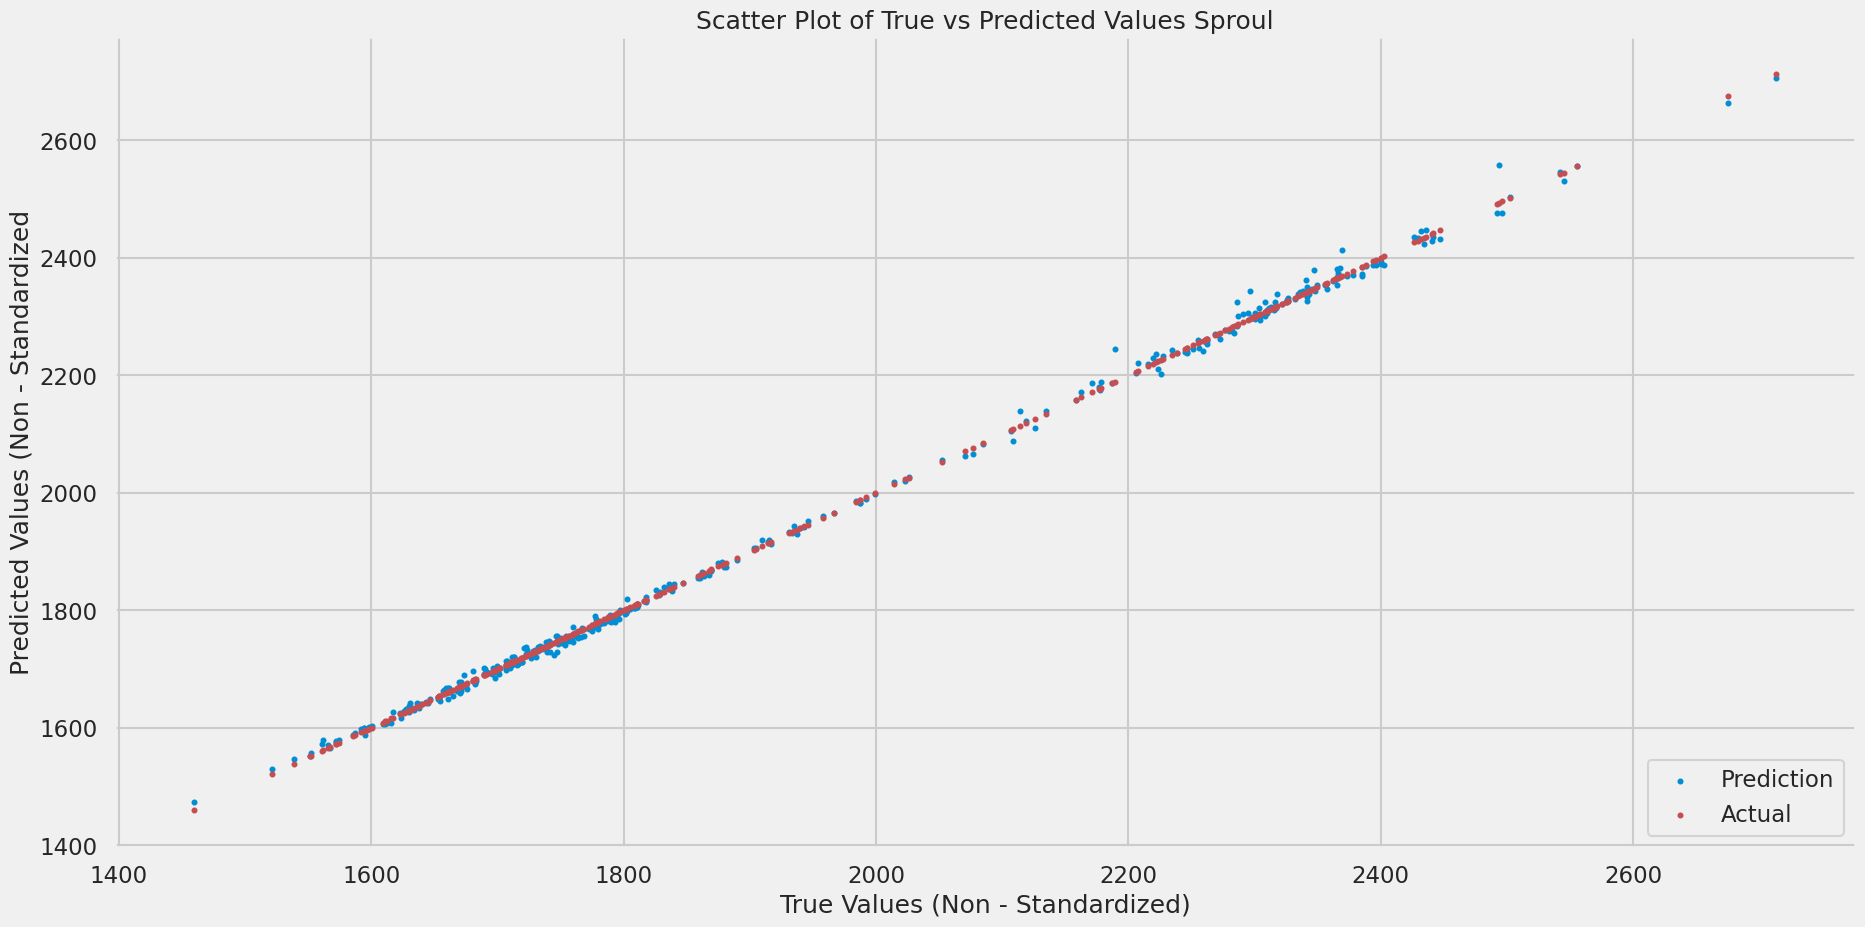

And the coefficient adjustments made by LASSO and Ridge agaisnt LM for the refined feature set. The models, as shown, do not reduce the influence of the remaining fetures much more than LM. This makes sense given the small optimal alpha value, and the similiarity in end values between LM, ridge and LASSO.
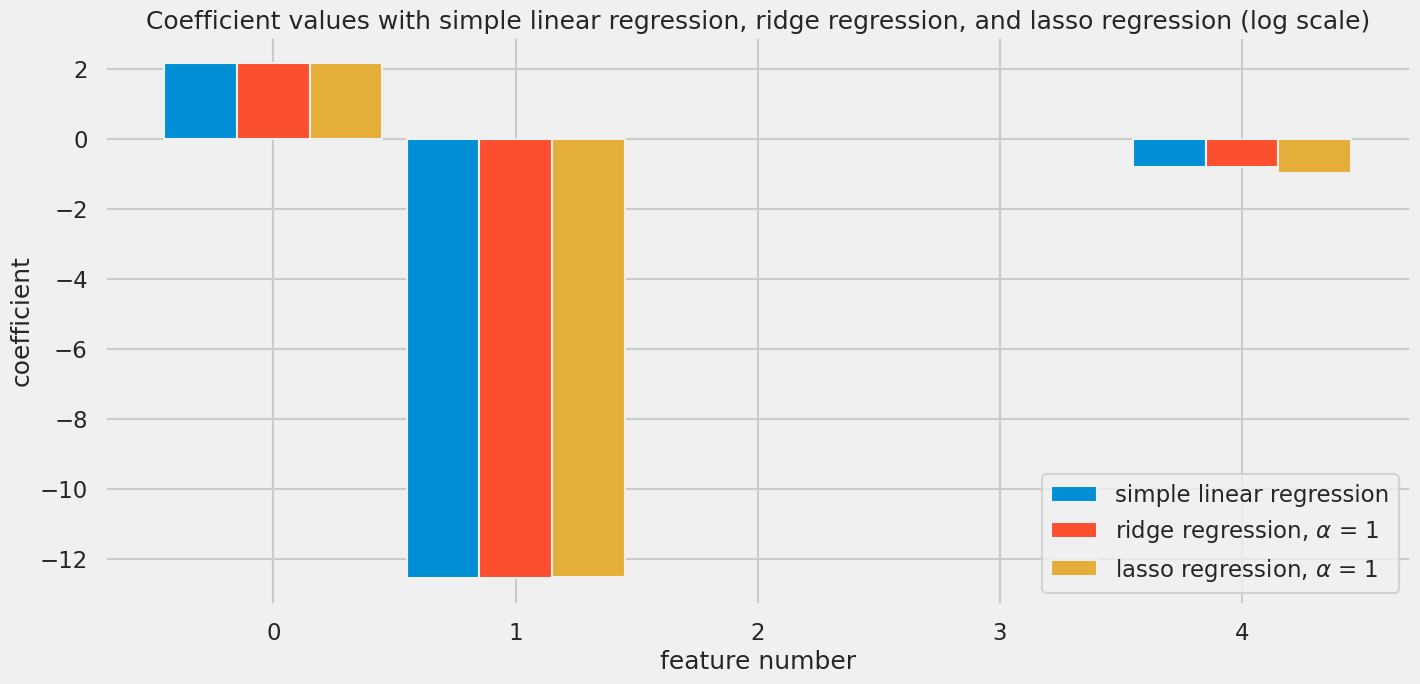

Resource Allocation Being Addressed: The takeaway here is that the current measuremtn tools need not be updated to keep track of the total consumption of each building. The Buildings also are well weatherized, meaning they do not need upgrades as a means of adaptation againsrt extreme weather, particularly heat, as it has shown that the end consumption does not change according to the weather outside.

Room for Improvement: These models would benefit from more exapnasive feature sets including but not limited to considering factors such as the type of appliances in the buildings, if the windows are efficient windows, capacity at any time, the general use of the buildings ie is the consumption driven from lighting, machines, appliances etc. As means of prediciting consumption beyond the measuremnts which offer the consumtpion total, but do little to tell the story of where the consumption is being driven from.

## Regression Tree Models

In [ ]:
# Resample the data to daily intervals and calculate the mean for each day
daily_df_g_rt = gil_df.resample('D').mean()
# Reset the index to have 'time (US/Pacific)' as a column again
daily_df_g_rt.reset_index(inplace=True)
daily_df_g_rt.rename(columns={'time (US/Pacific)': 'Date', 'kWh del (kWh)': 'kWh mean (kWh)'}, inplace= True)
daily_df_g_rt['Consumption (kWh)'] = daily_df_g['kW total (kW)']*24

#Setting time for Sutardja
daily_df_sd_rt = sdj_df.resample('D').mean()
daily_df_sd_rt.reset_index(inplace=True)
daily_df_sd_rt.rename(columns={'time (US/Pacific)': 'Date', 'kWh del (kWh)': 'kWh mean (kWh)'}, inplace= True)
daily_df_sd_rt['Consumption (kWh)'] = daily_df_sd['kW total (kW)']*24

#Setting time for Sproul
daily_df_s_rt = spr_df.resample('D').mean()
daily_df_s_rt.reset_index(inplace=True)
daily_df_s_rt.rename(columns={'time (US/Pacific)': 'Date','kW Total (kW)':'kW total (kW)', 'I AVG Primary (Amps)':'I ave (Amps)','kW Demand (kW)':'kW demand (kW)', 'kWh Del (kWh)': 'kWh mean (kWh)', 'KVAR Total (kVAR)':'kVAR total (kVAR)' }, inplace= True)
daily_df_s_rt['Consumption (kWh)'] = daily_df_s['kW total (kW)']*24


###Regression Tree Models for Gilman

In [ ]:
#Set a DF specific for Regression tree analysis
daily_df_g_rt = daily_df_g.dropna(axis=1)
daily_df_g_rt =daily_df_g.drop(['kW total (kW)','kW demand (kW)'], axis=1)
daily_df_g_rt

Date  Consumption (kWh)  I ave (Amps)  kWh mean (kWh)  \
0    2017-07-27        1041.000000     80.592500    1.507785e+06   
1    2017-07-28         976.168421     76.884211    1.508483e+06   
2    2017-07-29         951.250000     76.207292    1.509461e+06   
3    2017-07-30         951.750000     76.066667    1.510406e+06   
4    2017-07-31         953.250000     76.029167    1.511370e+06   
...         ...                ...           ...             ...   
1822 2022-07-23         964.500000     88.645833    3.023045e+06   
1823 2022-07-24         951.000000     88.648958    3.024009e+06   
1824 2022-07-25         944.000000     88.270833    3.024970e+06   
1825 2022-07-26         962.500000     88.483333    3.025939e+06   
1826 2022-07-27         939.368421     87.901754    3.026709e+06   

      kVAR total (kVAR)  Daily Max Temperature  Daily Min Temperature  Month  
0             49.225000                   27.5                   13.9      7  
1             47.905263                   23.7                   14.4      7  
2             48.229167                   23.6                   13.9      7  
3             48.177083                   25.1                   13.7      7  
4             47.729167                   25.1                   14.4      7  
...                 ...                    ...                    ...    ...  
1822          63.833333                   73.7                   55.1      7  
1823          64.250000                   73.3                   56.1      7  
1824          64.093750                   72.7                   56.5      7  
1825          63.718750                   74.2                   59.6      7  
1826          63.719298                   74.2                   58.7      7  

[1827 rows x 8 columns]

In [ ]:
#Define the feartures and target variables
features_g = daily_df_g_rt.loc[:, 'I ave (Amps)': 'Daily Min Temperature']
target_g = daily_df_g_rt['Consumption (kWh)']

In [ ]:
# make the test/train split
X, X_test, y, y_test = train_test_split(features_g, target_g, test_size = 0.2, random_state=2021)

# make the train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=2021)

In [ ]:
#Perform regression tree analysiss for one tree
first_tree = DecisionTreeRegressor(random_state = 2021)
first_tree.fit(X_train, y_train)

print("Number of features: {}".format(first_tree.tree_.n_features))
print("Number of nodes (internal and terminal): {}".format(first_tree.tree_.node_count), "\n")

train_score = first_tree.score(X_train, y_train)
val_score = first_tree.score(X_val, y_val)

print('Train Score: ', train_score)
print('Validation Score: ', val_score)

Number of features: 5
Number of nodes (internal and terminal): 2149 

Train Score:  1.0
Validation Score:  0.984067713994544


In [ ]:
#Perform analysis for one bagged tree
bag_tree = BaggingRegressor (random_state = 2021, n_estimators = 150, max_features = 5)
bag_tree.fit(X_train, y_train)

bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

print('Train Score: ', bag_train_score)
print('Validation Score: ', bag_val_score)

Train Score:  0.9981369707589806
Validation Score:  0.9903084324805426


In [ ]:
#Perform analysis for random forest
rf_tree = RandomForestRegressor(random_state = 2021, n_estimators = 150)
rf_tree.fit(X_train, y_train)

rf_train_score = rf_tree.score(X_train, y_train)
rf_val_score = rf_tree.score(X_val, y_val)

print('Train Score: ', rf_train_score)
print('Validation Score: ', rf_val_score)

Train Score:  0.9981437938094603
Validation Score:  0.9901474837797253


In [ ]:
#Define the Hyperparameter Search Space
param_dist = {'max_leaf_nodes': randint(3, 100),
              'min_samples_leaf': randint(1, 10),
              'min_samples_split': randint(2, 20)}
#Instantiate RandomizedSearchCV
rf_tree_rnd_search = RandomizedSearchCV(rf_tree, param_distributions=param_dist,
                                cv=5, n_iter=5, random_state = 2021)
rf_tree_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=150,
                                                   random_state=2021),
                   n_iter=5,
                   param_distributions={'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac3922260>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac3923f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac3920850>},
                   random_state=2021)

In [ ]:
#Best Cross-Validated Score
print(rf_tree_rnd_search.best_score_)
#Best Hyperparameters:
print(rf_tree_rnd_search.best_params_)

0.9763237553352129
{'max_leaf_nodes': 88, 'min_samples_leaf': 1, 'min_samples_split': 15}


In [ ]:
#Perform GradientBoost Analysis
gb_tree = GradientBoostingRegressor (random_state=2021, n_estimators = 150)
gb_tree.fit(X_train, y_train)

gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9968168071826836
Validation Score:  0.9913032241309022


In [ ]:
#Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 60, 70, 80],  # Range of values for the number of estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Range of values for the learning rate
}

 # specify a dictionary with two parameters and the range of calues over which you'd like to choose values

#RandomizedSearchCV
rnd_gb_search = RandomizedSearchCV(gb_tree,param_distributions=param_dist,
                                cv=5, n_iter=10)
#Fitting the Model
rnd_gb_search.fit(X_train, y_train)

print(rnd_gb_search.best_params_)

{'n_estimators': 80, 'learning_rate': 0.3}


In [ ]:
#Evaluate and print performance of gradient boost
gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9968168071826836
Validation Score:  0.9913032241309022


In [ ]:
#compare models
models = [first_tree, bag_tree, rf_tree, rf_tree_rnd_search, gb_tree]
for i in models:
  print('Test Score: ', i.score(X_test, y_test))


Test Score:  0.9682095357781849
Test Score:  0.9803856239966713
Test Score:  0.9793061540607363
Test Score:  0.9759142967614
Test Score:  0.9852168868132067


### Regression Tree Models for Sutardja

In [ ]:
daily_df_sd_rt = daily_df_sd.dropna(axis=1)
daily_df_sd_rt =daily_df_sd.drop(['kW total (kW)','kW demand (kW)'], axis=1)


In [ ]:
features_sd = daily_df_sd_rt.loc[:, 'I ave (Amps)': 'Daily Min Temperature']
target_sd = daily_df_sd_rt['Consumption (kWh)']

In [ ]:
# make the test/train split
X, X_test, y, y_test = train_test_split(features_sd, target_sd, test_size = 0.2, random_state=2021)

# make the train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=2021)

In [ ]:
first_tree = DecisionTreeRegressor(random_state = 2021)
first_tree.fit(X_train, y_train)

print("Number of features: {}".format(first_tree.tree_.n_features))
print("Number of nodes (internal and terminal): {}".format(first_tree.tree_.node_count), "\n")

train_score = first_tree.score(X_train, y_train)
val_score = first_tree.score(X_val, y_val)

print('Train Score: ', train_score)
print('Validation Score: ', val_score)

Number of features: 5
Number of nodes (internal and terminal): 2173 

Train Score:  1.0
Validation Score:  0.9946240344780272


In [ ]:
bag_tree = BaggingRegressor (random_state = 2021, n_estimators = 150, max_features = 5)
bag_tree.fit(X_train, y_train)

bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

print('Train Score: ', bag_train_score)
print('Validation Score: ', bag_val_score)

Train Score:  0.999512558587682
Validation Score:  0.9974337579163784


In [ ]:
rf_tree = RandomForestRegressor(random_state = 2021, n_estimators = 150)
rf_tree.fit(X_train, y_train)

rf_train_score = rf_tree.score(X_train, y_train)
rf_val_score = rf_tree.score(X_val, y_val)

print('Train Score: ', rf_train_score)
print('Validation Score: ', rf_val_score)

Train Score:  0.9995342896258852
Validation Score:  0.9974852966315921


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_leaf_nodes': randint(3, 100),
              'min_samples_leaf': randint(1, 10),
              'min_samples_split': randint(2, 20)}

rf_tree_rnd_search = RandomizedSearchCV(rf_tree, param_distributions=param_dist,
                                cv=5, n_iter=5, random_state = 2021)
rf_tree_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=150,
                                                   random_state=2021),
                   n_iter=5,
                   param_distributions={'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac4f79660>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac1ecca90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac39211b0>},
                   random_state=2021)

In [ ]:
print(rf_tree_rnd_search.best_score_) # This is cross validation error from the training data set.
print(rf_tree_rnd_search.best_params_)

0.9924497215209334
{'max_leaf_nodes': 88, 'min_samples_leaf': 1, 'min_samples_split': 15}


In [ ]:
gb_tree = GradientBoostingRegressor (random_state=2021, n_estimators = 150)
gb_tree.fit(X_train, y_train)

gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9992357633486284
Validation Score:  0.9984938886607756


In [ ]:
param_dist = {
    'n_estimators': [50, 60, 70, 80],  # Range of values for the number of estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Range of values for the learning rate
}

 # specify a dictionary with two parameters and the range of calues over which you'd like to choose values

rnd_gb_search = RandomizedSearchCV(gb_tree,param_distributions=param_dist,
                                cv=5, n_iter=10)

rnd_gb_search.fit(X_train, y_train)

print(rnd_gb_search.best_params_)

{'n_estimators': 70, 'learning_rate': 0.2}


In [ ]:
gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9992357633486284
Validation Score:  0.9984938886607756


In [ ]:
models = [first_tree, bag_tree, rf_tree, rf_tree_rnd_search, gb_tree]
for i in models:
    print('Test Score: ', i.score(X_test, y_test))

Test Score:  0.9955381070091753
Test Score:  0.9974445486268504
Test Score:  0.9974405710434535
Test Score:  0.9955531494646982
Test Score:  0.9977845101415006


### Regression Tree Models for Sproul

In [ ]:
daily_df_s_rt = daily_df_s.dropna(axis=1)
daily_df_s_rt =daily_df_s.drop(['kW total (kW)','kW demand (kW)'], axis=1)
daily_df_s_rt

Date  Consumption (kWh)  I ave (Amps)  kWh mean (kWh)  \
5    2017-08-01        2493.829200    297.341667   653707.083333   
6    2017-08-02        2118.941878    250.166327   655451.938776   
7    2017-08-03        2191.510750    258.342708   657593.677083   
8    2017-08-04        2189.569485    260.146392   659826.773196   
9    2017-08-05        1663.197306    193.131633   661782.734694   
...         ...                ...           ...             ...   
1822 2022-07-23        1739.879750    198.638542   169870.562500   
1823 2022-07-24        1718.664750    196.181250   171592.791667   
1824 2022-07-25        1921.114750    220.189583   173393.281250   
1825 2022-07-26        2003.600000    229.472917   175360.833333   
1826 2022-07-27        1998.321500    228.325000   177357.552083   

      kVAR total (kVAR)  Daily Max Temperature  Daily Min Temperature  \
5             16.775917                   28.1                   13.6   
6             15.551765                   31.7                   16.0   
7             15.299948                   27.2                   18.8   
8             14.116381                   24.3                   18.5   
9              7.547296                   24.4                   16.8   
...                 ...                    ...                    ...   
1822           9.301687                   73.7                   55.1   
1823           9.130708                   73.3                   56.1   
1824          11.134115                   72.7                   56.5   
1825           9.788771                   74.2                   59.6   
1826           9.416010                   74.2                   58.7   

     time (US/Pacific)  Month  
5           2017-08-01      8  
6           2017-08-02      8  
7           2017-08-03      8  
8           2017-08-04      8  
9           2017-08-05      8  
...                ...    ...  
1822        2022-07-23      7  
1823        2022-07-24      7  
1824        2022-07-25      7  
1825        2022-07-26      7  
1826        2022-07-27      7  

[1822 rows x 9 columns]

In [ ]:
features_s = daily_df_s_rt.loc[:, 'I ave (Amps)': 'Daily Min Temperature']
target_s = daily_df_s_rt['Consumption (kWh)']

In [ ]:
# make the test/train split
X, X_test, y, y_test = train_test_split(features_s, target_s, test_size = 0.2, random_state=2021)

# make the train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=2021)

In [ ]:
first_tree = DecisionTreeRegressor(random_state = 2021)
first_tree.fit(X_train, y_train)

print("Number of features: {}".format(first_tree.tree_.n_features))
print("Number of nodes (internal and terminal): {}".format(first_tree.tree_.node_count), "\n")

train_score = first_tree.score(X_train, y_train)
val_score = first_tree.score(X_val, y_val)

print('Train Score: ', train_score)
print('Validation Score: ', val_score)

Number of features: 5
Number of nodes (internal and terminal): 2329 

Train Score:  1.0
Validation Score:  0.9976487688586029


In [ ]:
bag_tree = BaggingRegressor (random_state = 2021, n_estimators = 150, max_features = 5)
bag_tree.fit(X_train, y_train)

bag_train_score = bag_tree.score(X_train, y_train)
bag_val_score = bag_tree.score(X_val, y_val)

print('Train Score: ', bag_train_score)
print('Validation Score: ', bag_val_score)

Train Score:  0.9998038635635987
Validation Score:  0.9988764643948176


In [ ]:
rf_tree = RandomForestRegressor(random_state = 2021, n_estimators = 150)
rf_tree.fit(X_train, y_train)

rf_train_score = rf_tree.score(X_train, y_train)
rf_val_score = rf_tree.score(X_val, y_val)

print('Train Score: ', rf_train_score)
print('Validation Score: ', rf_val_score)

Train Score:  0.9998037283940334
Validation Score:  0.9988775176961271


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_leaf_nodes': randint(3, 100),
              'min_samples_leaf': randint(1, 10),
              'min_samples_split': randint(2, 20)}

rf_tree_rnd_search = RandomizedSearchCV(rf_tree, param_distributions=param_dist,
                                cv=5, n_iter=5, random_state = 2021)
rf_tree_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=150,
                                                   random_state=2021),
                   n_iter=5,
                   param_distributions={'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac4f3c1f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac1ecd030>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3ac1ece170>},
                   random_state=2021)

In [ ]:
print(rf_tree_rnd_search.best_score_) # This is cross validation error from the training data set.
print(rf_tree_rnd_search.best_params_)

0.9974838251230544
{'max_leaf_nodes': 88, 'min_samples_leaf': 1, 'min_samples_split': 15}


In [ ]:
gb_tree = GradientBoostingRegressor (random_state=2021, n_estimators = 150)
gb_tree.fit(X_train, y_train)

gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9995916598115548
Validation Score:  0.9989423840789706


In [ ]:
param_dist = {
    'n_estimators': [50, 60, 70, 80],  # Range of values for the number of estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Range of values for the learning rate
}

 # specify a dictionary with two parameters and the range of calues over which you'd like to choose values

rnd_gb_search = RandomizedSearchCV(gb_tree,param_distributions=param_dist,
                                cv=5, n_iter=10)

rnd_gb_search.fit(X_train, y_train)

print(rnd_gb_search.best_params_)

{'n_estimators': 80, 'learning_rate': 0.1}


In [ ]:
gb_train_score = gb_tree.score(X_train, y_train)
gb_val_score = gb_tree.score(X_val, y_val)

print('Train Score: ', gb_train_score)
print('Validation Score: ', gb_val_score)

Train Score:  0.9995916598115548
Validation Score:  0.9989423840789706


In [ ]:
models = [first_tree, bag_tree, rf_tree, rf_tree_rnd_search, gb_tree]
for i in models:
    print('Test Score: ', i.score(X_test, y_test))

Test Score:  0.9979760449974591
Test Score:  0.9989629512747508
Test Score:  0.9989661405440302
Test Score:  0.9986181611428382
Test Score:  0.9991749608129673


### Results and Interpretation of Regression Tree Models


Results:
First Tree Test Score:  0.9682095357781849
Bagged Tree Test Score:  0.9803856239966713
Random Forest Test Score:  0.9793061540607363
Randomized Search Test Score:  0.9759142967614
Gradient Boost Test Score:  0.9852168868132067

These scores show us that in line with linear regression, Ridge and LASSO models, that we were able to accurately predict each building's consumption using our feature set. The differences between each model were nil and this was consitent across all three building's data analyzed. Further hyper-parameter tuning may have resulting in more marked differences. However, the returns would have been minimal. To furhter imporve these models we would like to use more features and perform stricter feature engineering. By using emthiods like one hot encoding for categorical variables, such as window type, and including information such as amount of energy used per assett (lighting or appliances for example) we could have enhanced these models.

##LSTM Model

After Modelling for OLS, Lasso, and Ridge. We started to predict about the consumption in the future using Long Short Term Memory Model (LSTM).

A Long Short-Term Memory (LSTM) neural network is a type of recurrent neural network (RNN) which is designed to address the vanishing gradient problem in training traditional RNNs. LSTMs are particularly effective for learning and predicting patterns in sequences of data, such as time series and speech recognition. Since our data is using time series condition; thus, We choosed LSTM as our prediction model.

The key features of an LSTM include: 1. Memory Cells: storing the information over extended sequences. 2. Gates: to control the flow of information into and out of the memory cells. This mechanism allows LSTMs to selectively remember or forget information. 3. Vanishing Gradient Mitigation: addressing the vanishing gradient problem by introducing a more sophisticated update mechanism. 4. Sequential Learning: learning to identify and remember patterns in sequential data.
Applications:

In [ ]:
#Download the library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


We downloaded "Keras Package" to download the Neural Network, as well as LSTM package. We also downloaded the optimizers or "adam".

In [ ]:
#Reset all the index
daily_df_g = daily_df_g.reset_index(drop=False)
daily_df_sd = daily_df_sd.reset_index(drop=False)
daily_df_s = daily_df_s.reset_index(drop=False)

###LSTM - Gilman

In [ ]:
daily_df_g

Date  Consumption (kWh)  kW total (kW)  kW demand (kW)  \
0    2017-07-27        1041.000000      43.375000       43.450000   
1    2017-07-28         976.168421      40.673684       40.947368   
2    2017-07-29         951.250000      39.635417       39.218750   
3    2017-07-30         951.750000      39.656250       39.135417   
4    2017-07-31         953.250000      39.718750       40.145833   
...         ...                ...            ...             ...   
1822 2022-07-23         964.500000      40.187500       39.708333   
1823 2022-07-24         951.000000      39.625000       39.583333   
1824 2022-07-25         944.000000      39.333333       39.729167   
1825 2022-07-26         962.500000      40.104167       39.989583   
1826 2022-07-27         939.368421      39.140351       39.491228   

      I ave (Amps)  kWh mean (kWh)  kVAR total (kVAR)  Daily Max Temperature  \
0        80.592500    1.507785e+06          49.225000                   27.5   
1        76.884211    1.508483e+06          47.905263                   23.7   
2        76.207292    1.509461e+06          48.229167                   23.6   
3        76.066667    1.510406e+06          48.177083                   25.1   
4        76.029167    1.511370e+06          47.729167                   25.1   
...            ...             ...                ...                    ...   
1822     88.645833    3.023045e+06          63.833333                   73.7   
1823     88.648958    3.024009e+06          64.250000                   73.3   
1824     88.270833    3.024970e+06          64.093750                   72.7   
1825     88.483333    3.025939e+06          63.718750                   74.2   
1826     87.901754    3.026709e+06          63.719298                   74.2   

      Daily Min Temperature  
0                      13.9  
1                      14.4  
2                      13.9  
3                      13.7  
4                      14.4  
...                     ...  
1822                   55.1  
1823                   56.1  
1824                   56.5  
1825                   59.6  
1826                   58.7  

[1827 rows x 9 columns]

In [ ]:
# Selecting features (columns) to be involved intro training and predictions
daily_df_g_lstm = daily_df_g[['Date','Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']]
cols = list(daily_df_g_lstm)[1:9]

# Extracting the dates, We will use this as our visualization
datelist_train_g = list(daily_df_g_lstm['Date'])
datelist_train_g = [pd.to_datetime(date, '%Y-%m-%d').date() for date in datelist_train_g]

print('Training set shape == {}'.format(daily_df_g_lstm.shape))
print('All timestamps == {}'.format(len(datelist_train_g)))
print('Featured selected: {}'.format(cols))

Training set shape == (1827, 9)
All timestamps == 1827
Featured selected: ['Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature', 'Daily Min Temperature']


We selected 9 features, as well as Consumption (kWh). In time series forecasting with LSTM (Long Short-Term Memory) neural networks, the input data typically includes sequences of historical observations, and the goal is to predict the next value or a sequence of future values. The same variable is used for prediction because the model is learning patterns and dependencies within the time series data to make accurate predictions.

In [ ]:
#Defining a new dataframe by "daily_df_g_lstm" to seperate the data frame "daily_df_g_lstm"
daily_df_g_lstm = daily_df_g_lstm[cols].astype(str)
daily_df_g_lstm

Consumption (kWh)       kW total (kW)       I ave (Amps)  \
0                1041.0              43.375            80.5925   
1     976.1684210526316   40.67368421052632  76.88421052631578   
2                951.25  39.635416666666664  76.20729166666666   
3                951.75            39.65625  76.06666666666666   
4                953.25            39.71875  76.02916666666667   
...                 ...                 ...                ...   
1822              964.5             40.1875  88.64583333333333   
1823              951.0              39.625  88.64895833333333   
1824              944.0  39.333333333333336  88.27083333333333   
1825              962.5  40.104166666666664  88.48333333333333   
1826  939.3684210526314   39.14035087719298   87.9017543859649   

          kW demand (kW)      kWh mean (kWh)   kVAR total (kVAR)  \
0                  43.45         1507784.675              49.225   
1      40.94736842105263  1508482.7368421052   47.90526315789474   
2               39.21875        1509461.0625  48.229166666666664   
3     39.135416666666664  1510405.5208333333  48.177083333333336   
4     40.145833333333336       1511370.28125  47.729166666666664   
...                  ...                 ...                 ...   
1822  39.708333333333336  3023044.8333333335  63.833333333333336   
1823  39.583333333333336       3024008.71875               64.25   
1824  39.729166666666664  3024969.9270833335            64.09375   
1825  39.989583333333336       3025939.34375            63.71875   
1826   39.49122807017544  3026709.0701754387  63.719298245614034   

     Daily Max Temperature Daily Min Temperature  
0                     27.5                  13.9  
1                     23.7                  14.4  
2                     23.6                  13.9  
3                     25.1                  13.7  
4                     25.1                  14.4  
...                    ...                   ...  
1822                  73.7                  55.1  
1823                  73.3                  56.1  
1824                  72.7                  56.5  
1825                  74.2                  59.6  
1826                  74.2                  58.7  

[1827 rows x 8 columns]

We decided to seperate the dataframe to ensure there is no a conflict during running the code, there are 1927 rows with 8 columns where the first column as the dependent values

In [ ]:
# Convert the DataFrame to float
daily_df_g_lstm = daily_df_g_lstm.astype(float)

# Using multiple features (predictors)
training_set = daily_df_g_lstm.values

print('Shape of training set == {}.'.format(training_set.shape))
print(training_set)


Shape of training set == (1827, 8).
[[1041.           43.375        80.5925     ...   49.225
    27.5          13.9       ]
 [ 976.16842105   40.67368421   76.88421053 ...   47.90526316
    23.7          14.4       ]
 [ 951.25         39.63541667   76.20729167 ...   48.22916667
    23.6          13.9       ]
 ...
 [ 944.           39.33333333   88.27083333 ...   64.09375
    72.7          56.5       ]
 [ 962.5          40.10416667   88.48333333 ...   63.71875
    74.2          59.6       ]
 [ 939.36842105   39.14035088   87.90175439 ...   63.71929825
    74.2          58.7       ]]


In [ ]:
# Scaling the Features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[1.37603285],
       [0.97023334],
       [0.81426177],
       ...,
       [0.76888193],
       [0.88467876],
       [0.73989155]])

Scaler is using in this process, the goal of scaling is to ensure that all features contribute equally to the analysis and to prevent certain features from dominating the others. After Scaling, We conducted to create the X and y train, as you could see, there are 963 rows with 500 days as n_past with 7 features included, then y train has one feature with 963 rows

In [ ]:
# Creating a data structure
X_train = []
y_train = []

n_future = 365   # Number of days we want top predict into the future
n_past = 500     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:daily_df_g_lstm.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (963, 500, 7).
y_train shape == (963, 1).


Our process is creating the Keras model, in this section, We try to intialize the model, adding layers (2 layers and 128 units) and output (1 unit), deciding the optimizer (ADAM optimizer using learning rate 0.001). We also add some Keras features such as EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint to help us during predicting and inform about how the model improves.

After the model is set, then We try to "model.fit" where the epochs are 30, validation split 0.2 and the batch size is 256

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding the first layer
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_past, daily_df_g_lstm.shape[1]-1)))

# Adding the second layer
model.add(LSTM(units=128, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
%%time
#ES : a keras function that stops training the neural network when a monitored metric has stopped improving.
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#RLR : t reduces the learning rate when a monitored metric has stopped improving
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#ModelCheckPoint : nction to save the model weights during training. It saves the model weights to a file (weights.h5) only when the validation loss improves
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

#tb :allowing us to monitor metrics, visualize the model graph, and more.
tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 0.8161
Epoch 1: val_loss improved from inf to 1.02577, saving model to weights.h5
4/4 [==============================] - 26s 5s/step - loss: 0.8161 - val_loss: 1.0258 - lr: 0.0010
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.3863
Epoch 2: val_loss improved from 1.02577 to 0.55782, saving model to weights.h5
4/4 [==============================] - 19s 5s/step - loss: 0.3863 - val_loss: 0.5578 - lr: 0.0010
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.3200
Epoch 3: val_loss did not improve from 0.55782
4/4 [==============================] - 31s 7s/step - loss: 0.3200 - val_loss: 1.0636 - lr: 0.0010
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 0.2784
Epoch 4: val_loss did not improve from 0.55782
4/4 [==============================] - 20s 4s/step - loss: 0.2784 - val_loss: 1.0243 - lr: 0.0010
Epoch 5/30
4/4 [==============================] - ETA: 0s - loss: 0.

In [ ]:
#Creating the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500, 128)          69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 201345 (786.50 KB)
Trainable params: 201345 (786.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From this summary, the model has a total of 201,345 parameters, all of which are trainable during the training process. There is non-trainable parameters

In [ ]:
# Generating list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train_g[-1], periods=n_future, freq='1d').tolist()

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
# Performing the predictions
predictions_future = model.predict(X_train[-n_future:])
predictions_train = model.predict(X_train[n_past:])

15/15 [==============================] - 9s 592ms/step


In [ ]:
# Inversing the predictions to original measurements, where we standardize the value

def datetime_to_timestamp(x):
    return pd.to_datetime(x.strftime('%Y%m%d'), format='%Y%m%d', errors='raise')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_train_g[2 * n_past + n_future -1:]))

# Converting <datetime.date> to <Timestamp> for prediction train
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTIONS_FUTURE.head(3)

Consumption (kWh)
2022-07-27         824.974304
2022-07-28         825.004456
2022-07-29         825.018921

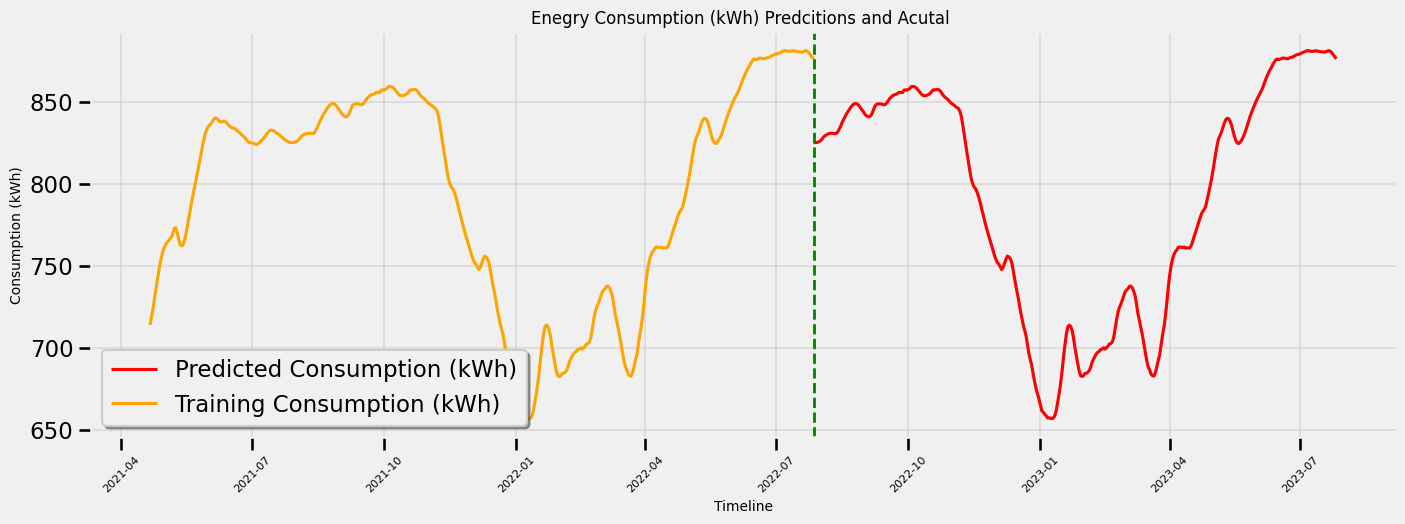

In [ ]:
# Ploting the training and predicted value
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Consumption (kWh)')
plt.plot(PREDICTION_TRAIN.loc[:].index, PREDICTION_TRAIN.loc[:]['Consumption (kWh)'], color='orange', label='Training Consumption (kWh)')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Enegry Consumption (kWh) Predcitions and Acutal ', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Consumption (kWh)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

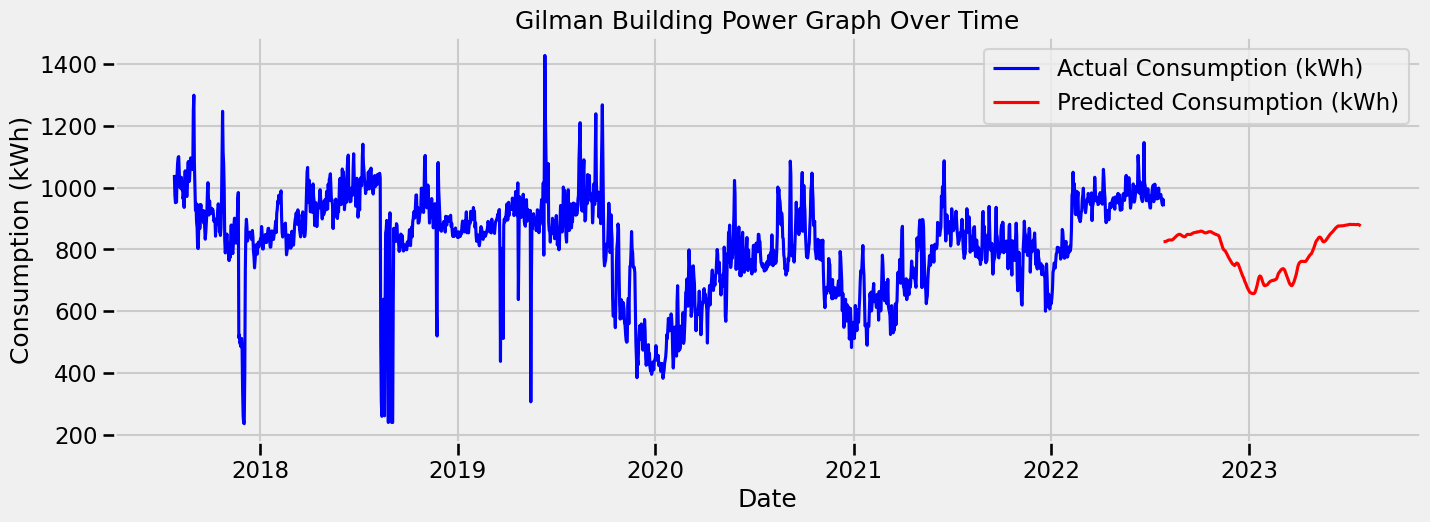

In [ ]:
# Ploting the training and predicted value
plt.plot(daily_df_g['Date'], daily_df_g['Consumption (kWh)'], color='b', label='Actual Consumption (kWh)')


plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Consumption (kWh)')

plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Gilman Building Power Graph Over Time')
plt.legend()
plt.show()

Then, We would do the same simulation for Sutardja Dai Hall and Sproul Hall

###LSTM-Sutardja

In [ ]:
daily_df_sd_lstm = daily_df_sd[['Date','Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']]
cols = list(daily_df_sd_lstm)[1:9]

datelist_train_sd = list(daily_df_sd_lstm['Date'])
datelist_train_sd = [pd.to_datetime(date, '%Y-%m-%d').date() for date in datelist_train_sd]

print('Training set shape == {}'.format(daily_df_sd_lstm.shape))
print('All timestamps == {}'.format(len(datelist_train_sd)))
print('Featured selected: {}'.format(cols))

Training set shape == (1822, 9)
All timestamps == 1822
Featured selected: ['Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature', 'Daily Min Temperature']


In [ ]:
daily_df_sd_lstm = daily_df_sd_lstm[cols].astype(str)
daily_df_sd_lstm

Consumption (kWh)      kW total (kW)       I ave (Amps)  \
5     14549.142857142855  606.2142857142857  796.2982142857143   
6                14067.5  586.1458333333334  767.1666666666666   
7                14400.0              600.0  782.6999999999999   
8               14681.75  611.7395833333334  800.6062499999999   
9                14211.0            592.125  773.5791666666668   
...                  ...                ...                ...   
1822            14441.75  601.7395833333334           785.5375   
1823            14389.75  599.5729166666666  782.9979166666667   
1824             14794.5           616.4375         801.296875   
1825            14770.25  615.4270833333334         800.053125   
1826             14769.0            615.375  800.4104166666666   

         kW demand (kW)      kWh mean (kWh)   kVAR total (kVAR)  \
5     606.1964285714286   12662761.69642857  251.19642857142858   
6     587.1458333333334  12674033.604166666            256.5625   
7             599.53125  12688104.479166666  255.94791666666666   
8     612.2395833333334       12702753.3125  252.11458333333334   
9     590.6770833333334  12717212.291666666   262.8541666666667   
...                 ...                 ...                 ...   
1822  602.0520833333334  38859386.083333336           307.40625   
1823  600.1041666666666  38873818.989583336   307.8645833333333   
1824  616.2708333333334  38888355.072916664   310.6041666666667   
1825  615.7395833333334  38903199.416666664           307.21875   
1826            615.375          38917942.5   308.0208333333333   

     Daily Max Temperature Daily Min Temperature  
5                     28.1                  13.6  
6                     31.7                  16.0  
7                     27.2                  18.8  
8                     24.3                  18.5  
9                     24.4                  16.8  
...                    ...                   ...  
1822                  73.7                  55.1  
1823                  73.3                  56.1  
1824                  72.7                  56.5  
1825                  74.2                  59.6  
1826                  74.2                  58.7  

[1822 rows x 8 columns]

In [ ]:
daily_df_sd_lstm = daily_df_sd_lstm.astype(float)

training_set = daily_df_sd_lstm.values  # Use .values instead of .as_matrix()

print('Shape of training set == {}.'.format(training_set.shape))
print(training_set)


Shape of training set == (1822, 8).
[[1.45491429e+04 6.06214286e+02 7.96298214e+02 ... 2.51196429e+02
  2.81000000e+01 1.36000000e+01]
 [1.40675000e+04 5.86145833e+02 7.67166667e+02 ... 2.56562500e+02
  3.17000000e+01 1.60000000e+01]
 [1.44000000e+04 6.00000000e+02 7.82700000e+02 ... 2.55947917e+02
  2.72000000e+01 1.88000000e+01]
 ...
 [1.47945000e+04 6.16437500e+02 8.01296875e+02 ... 3.10604167e+02
  7.27000000e+01 5.65000000e+01]
 [1.47702500e+04 6.15427083e+02 8.00053125e+02 ... 3.07218750e+02
  7.42000000e+01 5.96000000e+01]
 [1.47690000e+04 6.15375000e+02 8.00410417e+02 ... 3.08020833e+02
  7.42000000e+01 5.87000000e+01]]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[ 0.09888754],
       [-0.26720857],
       [-0.01447575],
       ...,
       [ 0.28538319],
       [ 0.2669508 ],
       [ 0.26600067]])

In [ ]:
X_train = []
y_train = []

n_future = 365
n_past = 600

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:daily_df_sd_lstm.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (858, 600, 7).
y_train shape == (858, 1).


In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_past, daily_df_sd_lstm.shape[1]-1)))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 1.2800
Epoch 1: val_loss improved from inf to 0.12267, saving model to weights.h5
3/3 [==============================] - 27s 8s/step - loss: 1.2800 - val_loss: 0.1227 - lr: 0.0010
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 0.9171
Epoch 2: val_loss did not improve from 0.12267
3/3 [==============================] - 20s 7s/step - loss: 0.9171 - val_loss: 0.3587 - lr: 0.0010
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 0.6612
Epoch 3: val_loss did not improve from 0.12267
3/3 [==============================] - 23s 7s/step - loss: 0.6612 - val_loss: 0.5513 - lr: 0.0010
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 0.4981
Epoch 4: val_loss did not improve from 0.12267
3/3 [==============================] - 20s 7s/step - loss: 0.4981 - val_loss: 0.5090 - lr: 0.0010
Epoch 5/30
3/3 [==============================] - ETA: 0s - loss: 0.3723
Epoch 5: val_loss did not i

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 600, 128)          69632     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 201345 (786.50 KB)
Trainable params: 201345 (786.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
datelist_future = pd.date_range(datelist_train_sd[-1], periods=n_future, freq='1d').tolist()

datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
predictions_future = model.predict(X_train[-n_future:])
predictions_train = model.predict(X_train[n_past:])

9/9 [==============================] - 7s 759ms/step


In [ ]:
def datetime_to_timestamp(x):
    '''
        x: a given datetime value (datetime.date)
    '''
    return pd.to_datetime(x.strftime('%Y%m%d'), format='%Y%m%d', errors='raise')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_train_sd[2 * n_past + n_future -1:]))

PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

Consumption (kWh)
2021-11-12       14463.862305
2021-11-13       14429.779297
2021-11-14       14396.712891

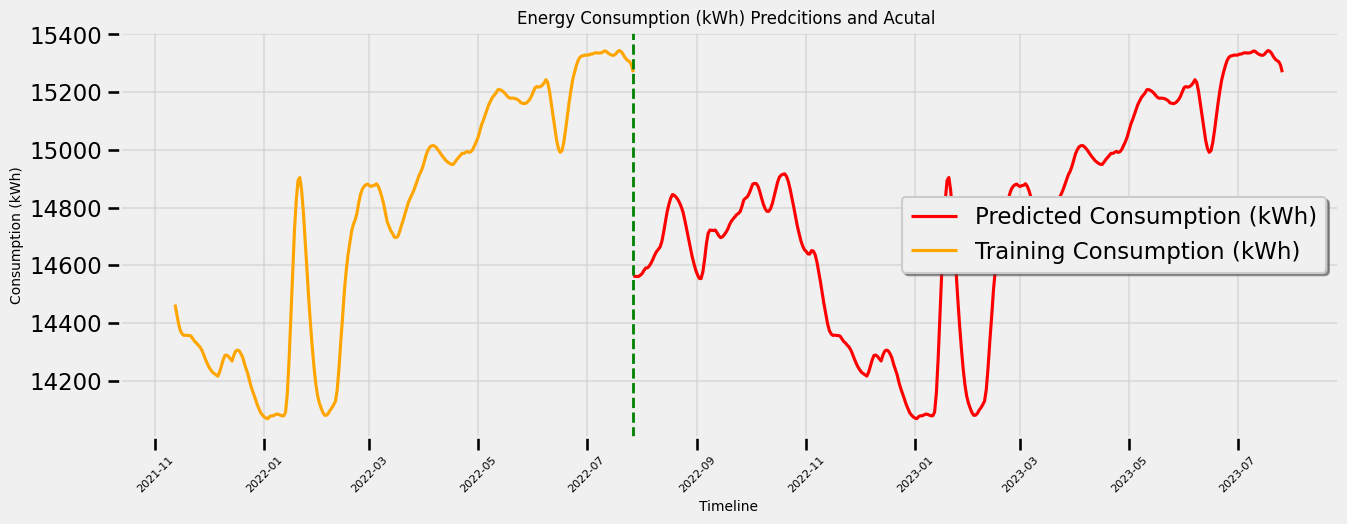

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Consumption (kWh)')
plt.plot(PREDICTION_TRAIN.loc[:].index, PREDICTION_TRAIN.loc[:]['Consumption (kWh)'], color='orange', label='Training Consumption (kWh)')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Energy Consumption (kWh) Predcitions and Acutal ', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Consumption (kWh)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

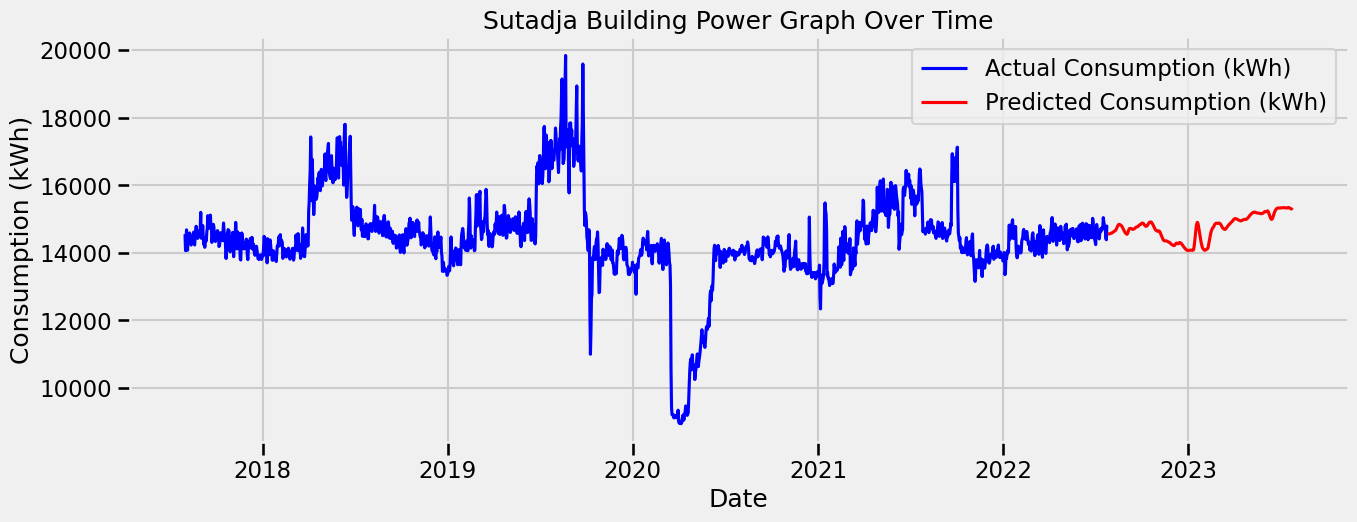

In [ ]:
daily_df_sd = daily_df_sd.sort_values(by='Date')
PREDICTIONS_FUTURE = PREDICTIONS_FUTURE.sort_index()
plt.plot(daily_df_sd['Date'], daily_df_sd['Consumption (kWh)'], color='b', label='Actual Consumption (kWh)')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Consumption (kWh)')
last_actual_point = (daily_df_sd['Date'].iloc[-1], daily_df_sd['Consumption (kWh)'].iloc[-1])
first_predicted_point = (PREDICTIONS_FUTURE.index[0], PREDICTIONS_FUTURE['Consumption (kWh)'].iloc[0])

plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Sutadja Building Power Graph Over Time')
plt.legend()
plt.show()

###LSTM-Sproul

In [ ]:
daily_df_s_lstm = daily_df_s[['Date','Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature','Daily Min Temperature']]
cols = list(daily_df_s_lstm)[1:9]

datelist_train_s = list(daily_df_s_lstm['Date'])
datelist_train_s = [pd.to_datetime(date, '%Y-%m-%d').date() for date in datelist_train_s]

print('Training set shape == {}'.format(daily_df_s_lstm.shape))
print('All timestamps == {}'.format(len(datelist_train_s)))
print('Featured selected: {}'.format(cols))

Training set shape == (1822, 9)
All timestamps == 1822
Featured selected: ['Consumption (kWh)', 'kW total (kW)', 'I ave (Amps)', 'kW demand (kW)', 'kWh mean (kWh)', 'kVAR total (kVAR)', 'Daily Max Temperature', 'Daily Min Temperature']


In [ ]:
daily_df_s_lstm = daily_df_s_lstm[cols].astype(str)
daily_df_s_lstm

Consumption (kWh)       kW total (kW)        I ave (Amps)  \
5              2493.8292  103.90955000000001  297.34166666666664   
6     2118.9418775510203   88.28924489795918  250.16632653061222   
7             2191.51075   91.31294791666666  258.34270833333335   
8     2189.5694845360827   91.23206185567011   260.1463917525773   
9     1663.1973061224492   69.29988775510205  193.13163265306125   
...                  ...                 ...                 ...   
1822          1739.87975   72.49498958333334  198.63854166666667   
1823          1718.66475         71.61103125           196.18125   
1824          1921.11475   80.04644791666666  220.18958333333333   
1825              2003.6   83.48333333333333   229.4729166666667   
1826           1998.3215   83.26339583333333  228.32500000000002   

         kW demand (kW)      kWh mean (kWh)   kVAR total (kVAR)  \
5               104.588   653707.0833333334  16.775916666666667   
6     88.40571428571428   655451.9387755102   15.55176530612245   
7                91.805   657593.6770833334  15.299947916666667   
8      91.7740206185567   659826.7731958763   14.11638144329897   
9     69.00489795918367   661782.7346938775   7.547295918367347   
...                 ...                 ...                 ...   
1822  72.08749999999999         169870.5625           9.3016875   
1823             71.165  171592.79166666666   9.130708333333333   
1824            79.8575        173393.28125  11.134114583333334   
1825            83.1125  175360.83333333334   9.788770833333333   
1826             82.985  177357.55208333334   9.416010416666667   

     Daily Max Temperature Daily Min Temperature  
5                     28.1                  13.6  
6                     31.7                  16.0  
7                     27.2                  18.8  
8                     24.3                  18.5  
9                     24.4                  16.8  
...                    ...                   ...  
1822                  73.7                  55.1  
1823                  73.3                  56.1  
1824                  72.7                  56.5  
1825                  74.2                  59.6  
1826                  74.2                  58.7  

[1822 rows x 8 columns]

In [ ]:
daily_df_s_lstm = daily_df_s_lstm.astype(float)

training_set = daily_df_s_lstm.values

print('Shape of training set == {}.'.format(training_set.shape))
print(training_set)


Shape of training set == (1822, 8).
[[2493.8292      103.90955     297.34166667 ...   16.77591667
    28.1          13.6       ]
 [2118.94187755   88.2892449   250.16632653 ...   15.55176531
    31.7          16.        ]
 [2191.51075      91.31294792  258.34270833 ...   15.29994792
    27.2          18.8       ]
 ...
 [1921.11475      80.04644792  220.18958333 ...   11.13411458
    72.7          56.5       ]
 [2003.6          83.48333333  229.47291667 ...    9.78877083
    74.2          59.6       ]
 [1998.3215       83.26339583  228.325      ...    9.41601042
    74.2          58.7       ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[ 1.9042121 ],
       [ 0.61755478],
       [ 0.86661967],
       ...,
       [-0.06141116],
       [ 0.22168791],
       [ 0.20357147]])

In [ ]:
X_train = []
y_train = []

n_future = 365
n_past = 600

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:daily_df_s_lstm.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (858, 600, 7).
y_train shape == (858, 1).


In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_past, daily_df_s_lstm.shape[1]-1)))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 0.4165
Epoch 1: val_loss improved from inf to 0.37149, saving model to weights.h5
3/3 [==============================] - 23s 7s/step - loss: 0.4165 - val_loss: 0.3715 - lr: 0.0010
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 0.2407
Epoch 2: val_loss did not improve from 0.37149
3/3 [==============================] - 19s 6s/step - loss: 0.2407 - val_loss: 0.5189 - lr: 0.0010
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 0.1907
Epoch 3: val_loss improved from 0.37149 to 0.36054, saving model to weights.h5
3/3 [==============================] - 21s 6s/step - loss: 0.1907 - val_loss: 0.3605 - lr: 0.0010
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 0.1949
Epoch 4: val_loss improved from 0.36054 to 0.35246, saving model to weights.h5
3/3 [==============================] - 19s 7s/step - loss: 0.1949 - val_loss: 0.3525 - lr: 0.0010
Epoch 5/30
3/3 [====================

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 600, 128)          69632     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 201345 (786.50 KB)
Trainable params: 201345 (786.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
datelist_future = pd.date_range(datelist_train_s[-1], periods=n_future, freq='1d').tolist()

datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
predictions_future = model.predict(X_train[-n_future:])
predictions_train = model.predict(X_train[n_past:])

9/9 [==============================] - 4s 451ms/step


In [ ]:
def datetime_to_timestamp(x):
    '''
        x: a given datetime value (datetime.date)
    '''
    return pd.to_datetime(x.strftime('%Y%m%d'), format='%Y%m%d', errors='raise')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Consumption (kWh)']).set_index(pd.Series(datelist_train_s[2 * n_past + n_future -1:]))

PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

Consumption (kWh)
2021-11-12        1756.042236
2021-11-13        1751.560547
2021-11-14        1743.698730

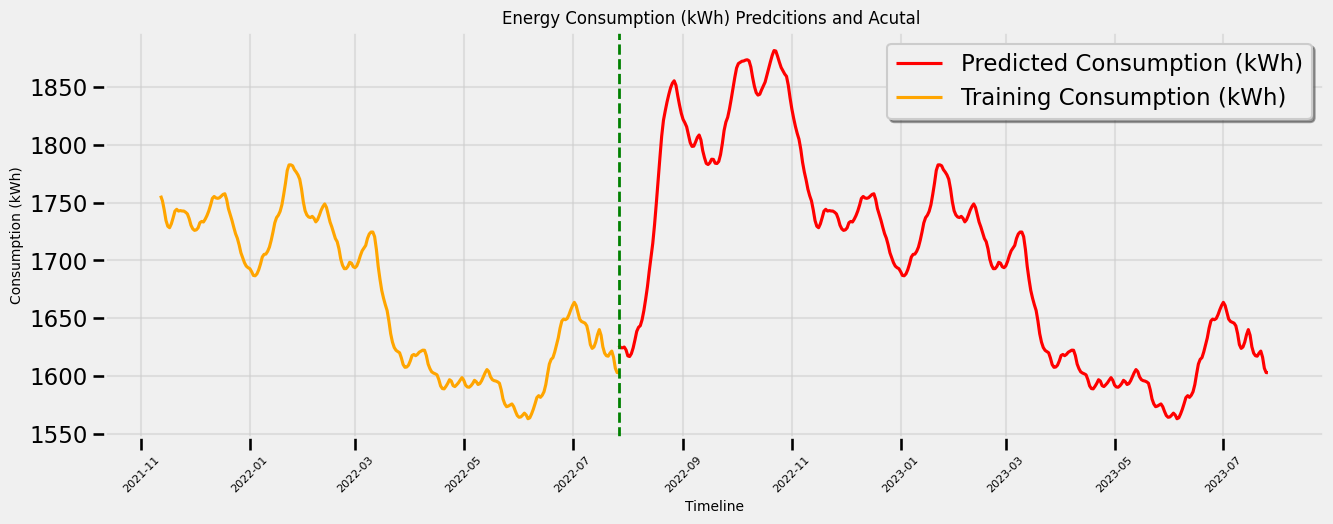

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Consumption (kWh)')
plt.plot(PREDICTION_TRAIN.loc[:].index, PREDICTION_TRAIN.loc[:]['Consumption (kWh)'], color='orange', label='Training Consumption (kWh)')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Energy Consumption (kWh) Predcitions and Acutal ', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Consumption (kWh)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

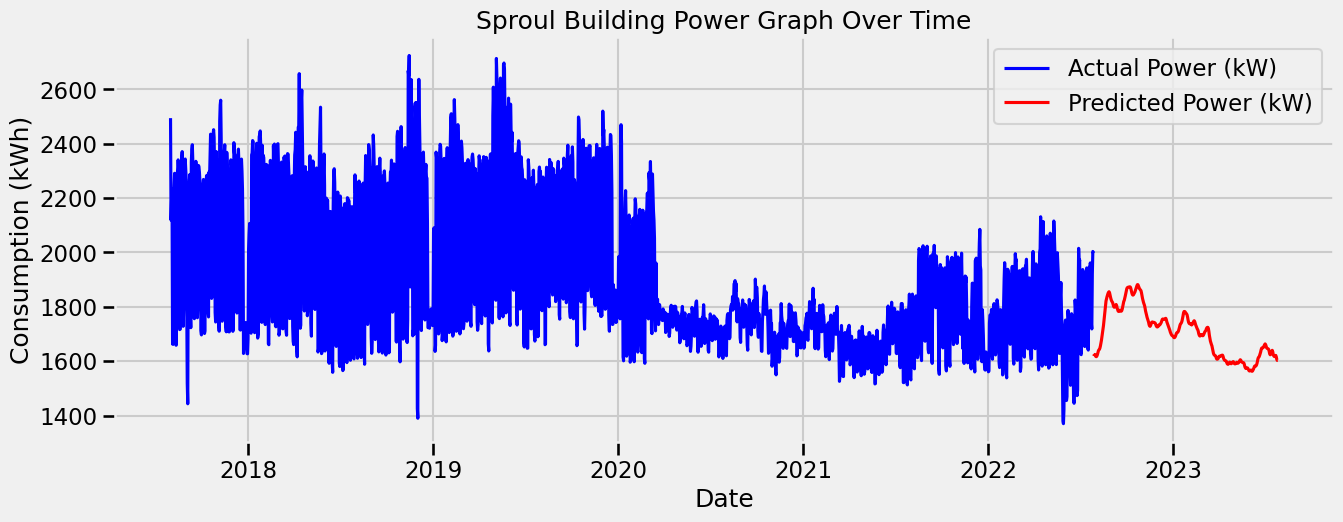

In [ ]:
daily_df_sd = daily_df_sd.sort_values(by='Date')
PREDICTIONS_FUTURE = PREDICTIONS_FUTURE.sort_index()
plt.plot(daily_df_s['Date'], daily_df_s['Consumption (kWh)'], color='b', label='Actual Power (kW)')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Consumption (kWh)'], color='r', label='Predicted Power (kW)')
last_actual_point = (daily_df_sd['Date'].iloc[-1], daily_df_sd['Consumption (kWh)'].iloc[-1])
first_predicted_point = (PREDICTIONS_FUTURE.index[0], PREDICTIONS_FUTURE['Consumption (kWh)'].iloc[0])

plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Sproul Building Power Graph Over Time')
plt.legend()
plt.show()

## Results and Interpreation Linear Regression, Ridge, and Lasso

Results from Sproul: Sproul With Initial Feature Set Linear Model: test RMSE: 4.671587330626553e-16 train RMSE: 1960.7499937047583 R^2 test: 1.0 R^2 train: 1.0

Ridge: lowest MSE: 4.273100388642671e-05 ; alpha: 0.1

Cross validated ridge: (Kfold = 5, Random state = 8) optimal alpha: 0.01 Test MSE with cross-validated Ridge: 4.2852955883010174e-07

Cross validated LASSO: (Kfold = 5, Random state = 8) optimal alpha: 0.01 Test MSE with cross-validated Lasso: 8.612278327316733e-08

Sproul with Refined Feature Set Linear Model: test RMSE: 0.0340048470754097 train RMSE: 1960.7501616742245 R^2 test: 0.9988376062126936 R^2 train: 0.9988691795637232

Ridge: lowest MSE: 4.273100388642671e-05 ; alpha: 0.1

Cross validated ridge: (Kfold = 5, Random state = 8) optimal alpha: 24.25 Test RMSE: 9.907953223313186

Cross validated LASSO: (Kfold = 5, Random state = 8) optimal alpha: 0.01 Test MSE with cross-validated Lasso: 9.90797844703261

Sproul showed near zero test errors across all three of linear regression, Ridge and LASSO (inclusive of cross validated ridge and LASSO). This indicated that our feture set predicted the outcome on trainign data quite well. However, we were concerned about the overfit risk. When coonsidering our features, a few (like total kw and kW Demand) would make sense as being ner identical in nature to the kWh. We dropped those and re run the tests finding slightly worse test scores across all three models. The r^2 values were also lower with a more refined dataset. We found this trend to be consistant across all three buildings.

Shown are the RMSE via scatter plot of Sproul (The other buildings had similr graphs) image.png
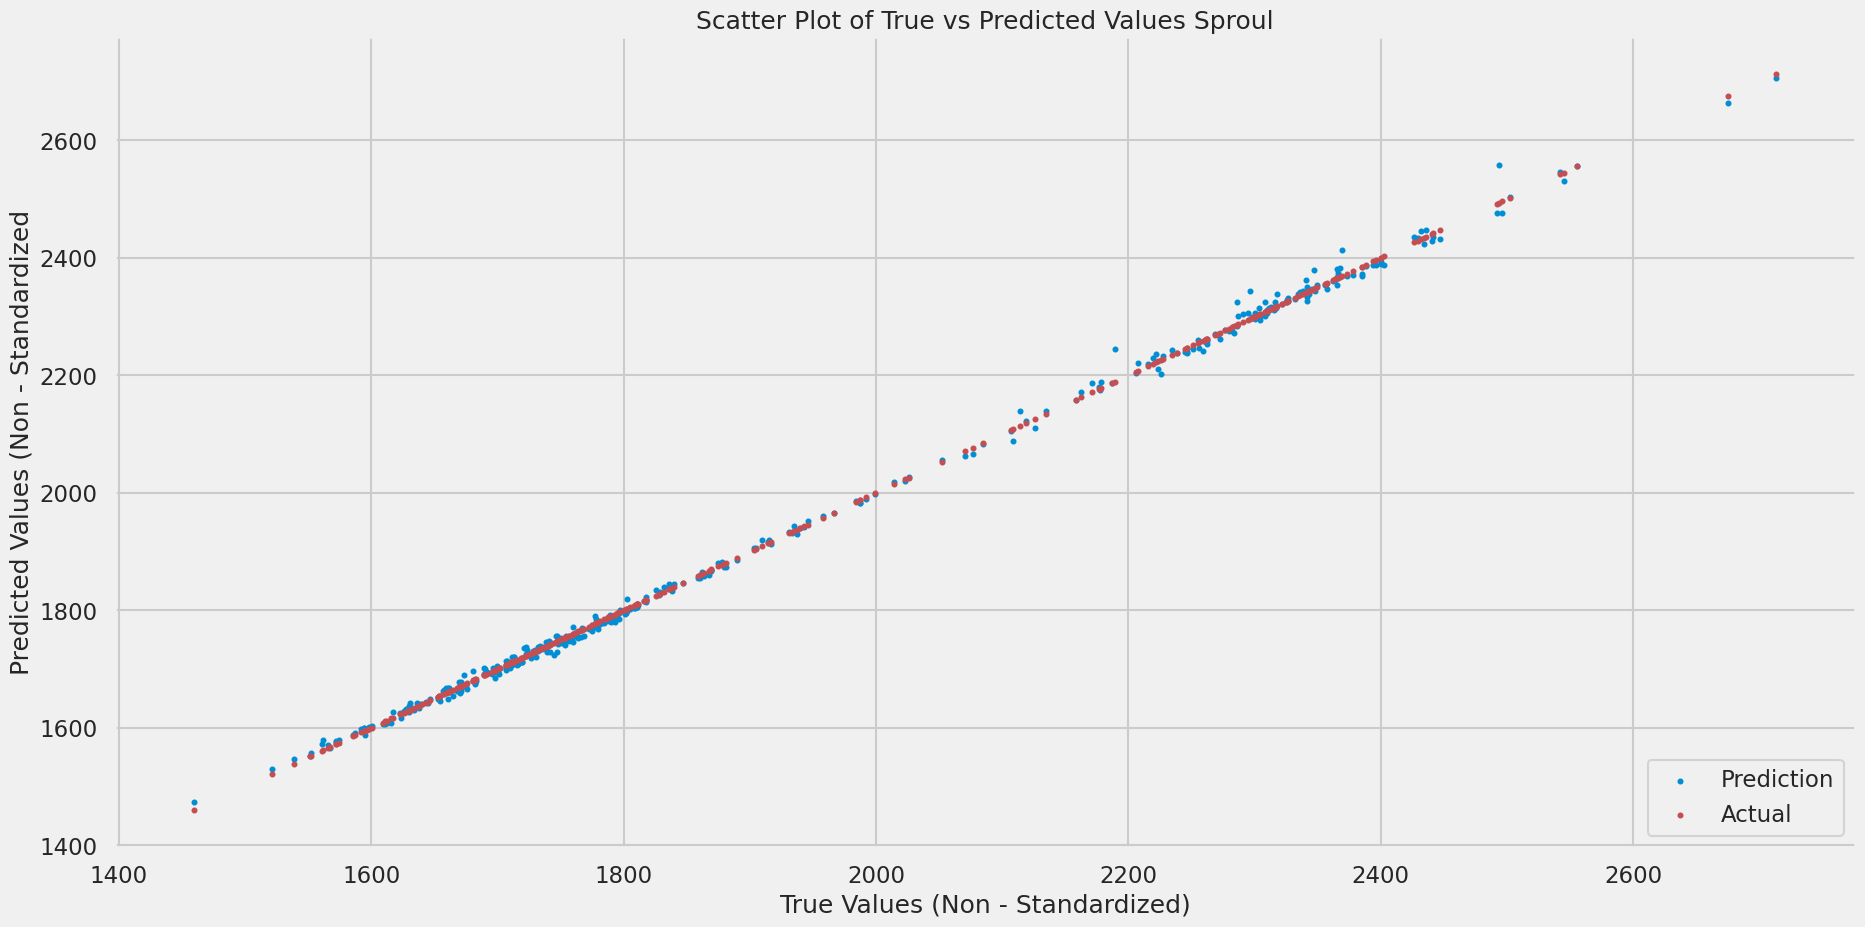

And the coefficient adjustments made by LASSO and Ridge agaisnt LM for the refined feature set. The models, as shown, do not reduce the influence of the remaining fetures much more than LM. This makes sense given the small optimal alpha value, and the similiarity in end values between LM, ridge and LASSO. 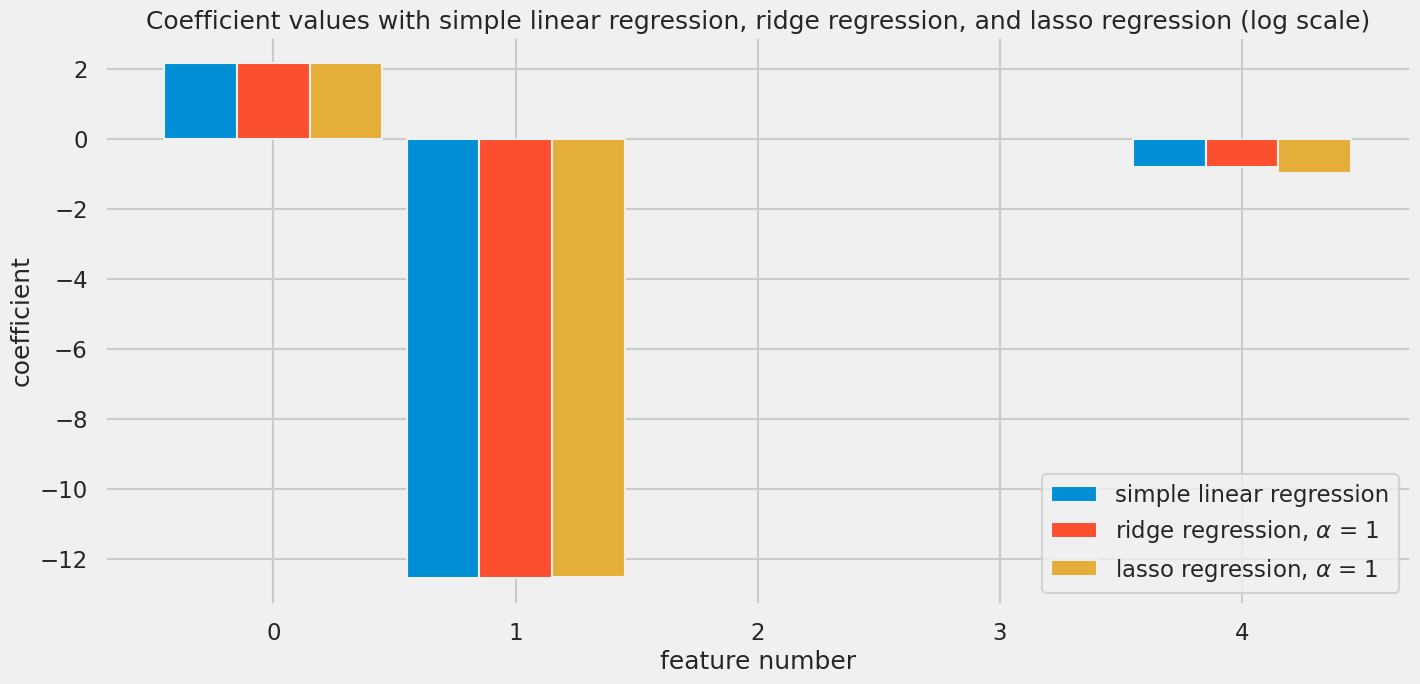image.png

Resource Allocation Being Addressed: The takeaway here is that the current measuremtn tools need not be updated to keep track of the total consumption of each building. The Buildings also are well weatherized, meaning they do not need upgrades as a means of adaptation againsrt extreme weather, particularly heat, as it has shown that the end consumption does not change according to the weather outside.

Room for Improvement: These models would benefit from more exapnasive feature sets including but not limited to considering factors such as the type of appliances in the buildings, if the windows are efficient windows, capacity at any time, the general use of the buildings ie is the consumption driven from lighting, machines, appliances etc. As means of prediciting consumption beyond the measuremnts which offer the consumtpion total, but do little to tell the story of where the consumption is being driven from.

Regression tree models Results:
First Tree Test Score:  0.9682095357781849
Bagged Tree Test Score:  0.9803856239966713
Random Forest Test Score:  0.9793061540607363
Randomized Search Test Score:  0.9759142967614
Gradient Boost Test Score:  0.9852168868132067

These scores show us that in line with linear regression, Ridge and LASSO models, that we were able to accurately predict each building's consumption using our feature set. The differences between each model were nil and this was consitent across all three building's data analyzed. Further hyper-parameter tuning may have resulting in more marked differences. However, the returns would have been minimal. To furhter imporve these models we would like to use more features and perform stricter feature engineering. By using emthiods like one hot encoding for categorical variables, such as window type, and including information such as amount of energy used per assett (lighting or appliances for example) we could have enhanced these models.



## Results and Interpretation of LSTM

1. Initially we wanted to predict the energy consumption of UC Berkeley buildings in the future for infrastructure planning to determine upgrades or expansions. From this case, we decided to try the initial prediction for 365 days after the last measurment day using LSTM. The results are:

- Gilman : From the simulation, it indicates that the data tend to be lower in the future. However, our team decided that there is a lack of condition in this building, the data in 2021 to 2022 had an increase pattern, assuming due to the new normal condition after Covid-19; thus the model does not work to predict the future significantly.
- Sutardja : The prediction shows that there is an increase trend in the graph, showing that the energy consumption tend to be higher and higher by time. Similar to Gilman, We trained the data since 2021 (due to Covid 19)
- Sporul : The energy consumption at Sproul shows a slight decrease through the year, it also shows that the data before pandemic and after pandemic is very distinct.

From the LSTM Model, Our team concluded that Sutardha is a considerable point to be the target of electrical feeder improvement since the prediction tends to be higher and higher by year. The others (Gilman and Sproul) should keep the feeders, as long as there is no increase of the energy usage by adding new electronic devices or occupancy numbers. LSTM itself acknowledge to be a good predictor for time series data.

- Beside finding the prediciton, the team also obtained several points which are related to the previous material during the class.
  1. The features impact the data that We train. In other word, when We increase more feature, it decreases the bias and vice versa as mentioned in the picture below. (above : using 4 features, below : adding 3 features, 7 features in total) 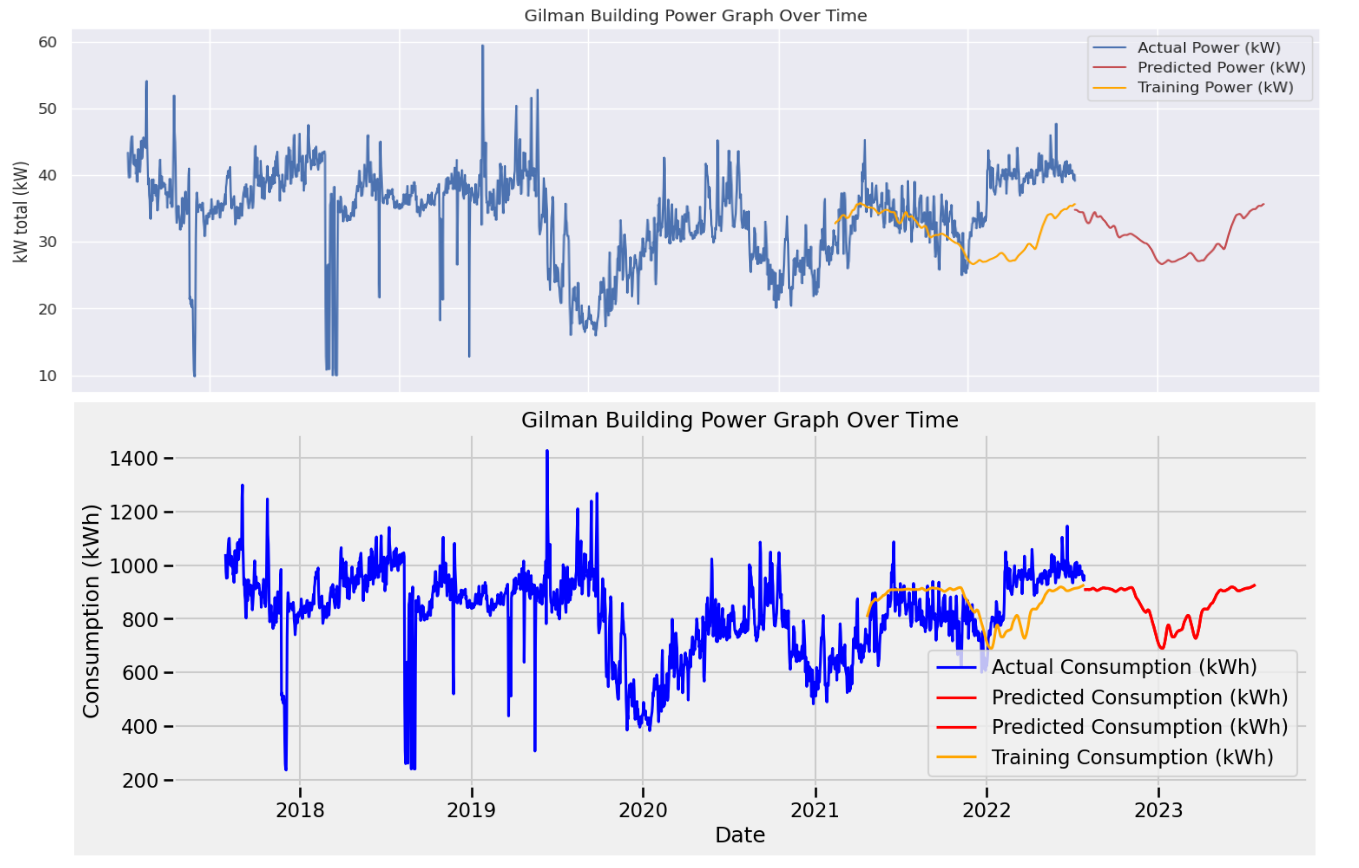
  2. In LSTM model, time series prediction has a pivotal key in making a prediction, Covid 19 condition is a new bias for people to predict the energy for future; thus, understanding the situation could be a considerable aspect of the model (above : train the data from the pandemic, below : train the data after the pandemic)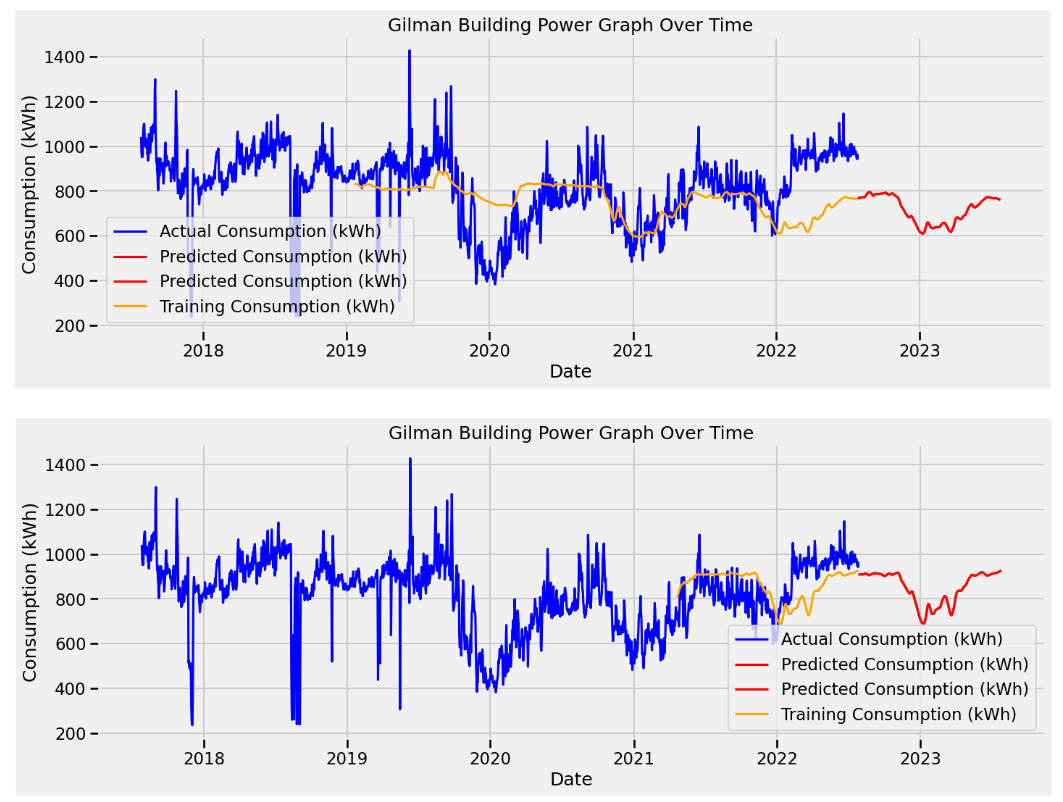

From general perspective, it is undeniable fact that our models have many lacks, there are several concerns: 1. We train our models fairly by lacking of features, the features are not enough to make the predictions, other features are needed to improve our model. 2. LSTM has a problem of computational process, it takes time and requires much RAM; thus, We should tune the hyperparameters well to get the desired predictions.




## Recommendations and Improvements

Overall, the team also gave several information regarding the further action if this project would be continued. There are :
1.	Add more feature to predict the energy consumption, it consists of Type of Building, Number of Windows, Type of Wall conductivity etc.
2.	Increase the learning rate, batch size, number of layers for LSTM model
3.	Checking the pattern and amount of occupancy of each building, also adding the occupancy rate/number as the considerable feature